# TELCO CUSTOMER CHURN

by : Fine Oktafiani, Chua Wira Dirgantara

- Github Link : (https://github.com/PurwadhikaDev/DeltaGroup_DTI_02_FinalProject/tree/main)
- Tableau Link : (https://public.tableau.com/app/profile/fine.oktafiani/viz/TELCOPREDICTSTORY/Story1?publish=yes)

#DATASET INFO

This 'Telco Customer Churn' dataset was downloaded from Kaggle. This dataset was imported by BlastChar around 7 years ago and has 8.82 Usability Score which mean we can use for learning purpose.

- Data Source : (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)


#BUSINESS & PROBLEM UNDERSTANDING

A telecommunications company has customer data, including customer demographics, the types of services they subscribe, and customer account information. Based on this data, the Telco company is interested to identify customers who are likely to cancel their subscriptions (churn). The company aims to design effective strategies to retain existing customers, minimize churn rates, and increase customer retention.

According to the Harvard Business Review, acquiring a new customer can cost 10–25 times more than retaining an existing one. This means our focus should be on retaining customers, not just acquiring new ones. If our churn model fails to identify customers who are about to leave (false negatives), we lose the opportunity to retain them, forcing us to spend more on acquiring replacements. To address this issue, we must prioritize reducing false negatives in churn detection, ensuring that we correctly identify at-risk customers and take proactive measures. By improving churn prediction accuracy, we can lower customer acquisition costs, increase customer lifetime value, and maintain a healthier customer base.

source:  
- https://www.businessdasher.com/customer-acquisition-vs-retention-cost/
https://hbr.org/2014/10/the-value-of-keeping-the-right-customers
- https://hbr.org/2014/10/the-value-of-keeping-the-right-customers


**Stakeholder**:

With the available churn data, the `marketing team` aims to accurately identify churn patterns to optimize retention costs and develop targeted strategies for different customer segments to enhance customer retention.. additionally, this data will be further used by sales, customer service, and product team for product development and improving customer experience.

## Problem Statement

Business Analytics:

1. How do customers churn profile in the telecommunications company based on available customer data?
2. What are the factors contribute to churn based on the given data?

Machine Learning:

1. How can we determine the most suitable machine learning model to accurately predict customer churn?
2. How can we optimize our churn prediction model to minimize customer loss and reduce new customer acquisition costs?
3. How can we determine when an ML model is trustworthy, and what's the limitation?
4. When and how should the ML model be used to ensure effective decision-making?

## Analytical Approach

Our approach focuses on analyzing customer data to identify patterns that differentiate churned customers from retained ones. By developing a classification model, we aim to predict churn probability, allowing the company to optimize retention efforts and reduce marketing costs by targeting the right customers efficiently.

## Evaluation Metrics

In this analysis, our main focus is to increase customer retention and minimize churn. Therefore, selecting the right evaluation metrics is crucial in measuring the performance of the churn prediction model.

We have chosen **F2-score as the primary metric because it emphasizes Recall over Precision**. F2-score gives greater weight to False Negatives (FN)—cases where customers who are likely to churn go undetected by the model. This is important because failing to identify at-risk customers means missing the opportunity to take proactive interventions to prevent churn.

F2-score is an evaluation metric that is a variant of F1-score, but it assigns a higher weight to Recall than to Precision. In other words, the model prioritizes identifying as many customers at risk of churning as possible, even if it results in some incorrect churn predictions (False Positives).

This is critical because False Negatives (FN)—where customers who are actually going to churn are not detected—can have a significant business impact. If churned customers go unnoticed, the company loses the chance to implement retention strategies that could have reduced churn.

**Other Evaluation Metrics**

Apart from F2-score, several other metrics are also used to understand the model’s performance:

- Accuracy: Measures how often the model makes correct predictions across all data points. However, in imbalanced datasets, where the number of non-churn customers is much higher, accuracy can be misleading, as a model can achieve high accuracy by simply predicting the majority class (non-churn).
- Precision: Measures how many of the customers predicted to churn actually churn. Precision is important when retention interventions are costly, ensuring that only truly at-risk customers are targeted.
- Recall: Measures how many actual churned customers were successfully identified by the model. This metric is crucial in churn prediction because a higher Recall means more customers can be saved through retention strategies.
- F1-score: The harmonic mean of Precision and Recall, providing a balance between the two. However, in this study, F1-score is less optimal because the focus is on Recall rather than balancing Recall and Precision.
By using F2-score as the primary metric, I ensure that the model focuses more on identifying as many at-risk customers as possible, allowing for better retention strategies and significantly reducing customer churn.
- ROC-AUC score: distinguishing between customers who will churn and those who will stay
- Average Precision (AP) score: easures the area under the Precision-Recall curve, summarizing model ranking performance. Higher AP (closer to 1) indicates better classification, especially for imbalanced data.

# DATA UNDERSTANDING

**Target :**
*   0: Customer won't churn
*   1: Churn will churn

**Features :**

**Customer services booked**

- PhoneService — Whether the customer has a phone service (Yes, No)
- MultipleLines — Whether the customer has multiple lines (Yes, No, No phone service)
- InternetService — Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity — Whether the customer has online security (Yes, No, No internet service)
- OnlineBackup — Whether the customer has online backup (Yes, No, No internet service)
- DeviceProtection — Whether the customer has device protection (Yes, No, No internet service)
- TechSupport — Whether the customer has tech support (Yes, No, No internet service)
- StreamingTV — Whether the customer has streaming TV (Yes, No, No internet service)
- StreamingMovies — Whether the customer has streaming movies (Yes, No, No internet service)

**Customer account information**

- Tenure — Number of months the customer has stayed with the company
- Contract — The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling — Whether the customer has paperless billing (Yes, No)
- PaymentMethod — The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges — The amount charged to the customer monthly
- TotalCharges — The total amount charged to the customer

**Customers demographic info**

- customerID — Customer ID
- Gender — Whether the customer is a male or a female
- SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
- Partner — Whether the customer has a partner or not (Yes, No)
- Dependents — Whether the customer has dependents or not (Yes, No). Dependents could be children, parents, grandparents, etc.








## Import Library

In [ ]:
import gdown
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Construct the direct download URL
download_url = f"https://drive.google.com/uc?id=1hydhcsmKkSO25CO4SWMDNvyYKrDtF0gu"

# Define the local filename
output_file = "telcocustomerchurn.csv"

# Download the file
gdown.download(download_url, output_file, quiet=False)


df = pd.read_csv(output_file)
df.head(10)

Downloading...
From: https://drive.google.com/uc?id=1hydhcsmKkSO25CO4SWMDNvyYKrDtF0gu
To: /content/telcocustomerchurn.csv
100%|██████████| 977k/977k [00:00<00:00, 19.8MB/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
#transpose
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Checking Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


All data types are correct

## Checking Statistic Descriptive

In [ ]:
# numerical col
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- SeniorCitizen must be categorical data because they only has minimum value is 0 and maximum value is 1.

- for tenure, the avarage customer stayed in the telco is 32 months with maximum 72 month. 75% customer stayed in 55 months

- Monthly Charges, average monthly charges are USD 64,76. With minimum USD 18,25 and maximum $ 118.75

- Average Total Charges USD 2279,73 with maximum USD 8684.8

## Checking unique Data

In [ ]:
for column_name in df.columns:
  print(df[column_name].value_counts(), '\n')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64 

gender
Male      3555
Female    3488
Name: count, dtype: int64 

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No inte

for the churn data, we will convert object to string so the machine learning can process the data. We will try to convert 'Yes' to '1' and 'No' to '0'

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## Checking Duplicates

In [ ]:
df.duplicated().sum()

0

There's no duplicates values found

## Checking missing values

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There are 11 missing columns in 'Tota'Charge'. we can fill that column by multiplying 'tenure' column and 'MonthlyCharge' column.


In [ ]:
#fill missing column
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'])

In [ ]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Checking Outlier

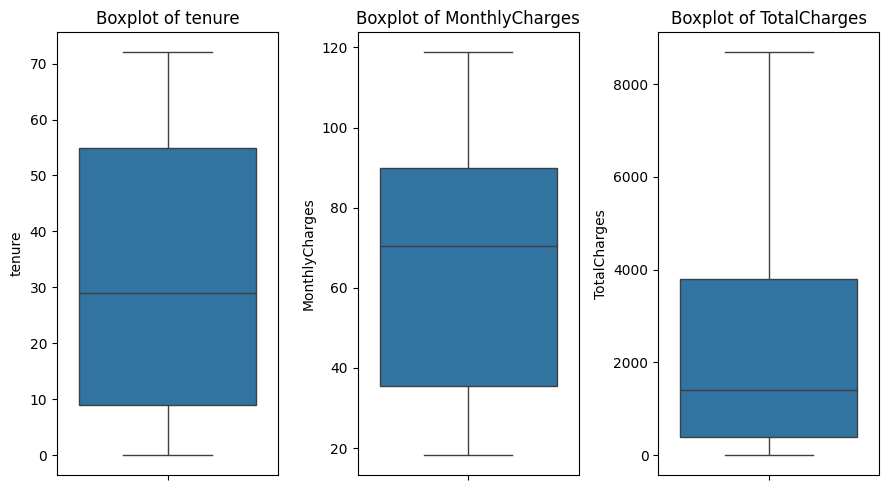

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


if 'df' not in locals():
    raise NameError("Variabel 'df' tidak ditemukan. Pastikan dataframe sudah didefinisikan.")

numerical = df.select_dtypes(include=['number']).columns
outlier_data = []

for column in numerical:
    df[column] = pd.to_numeric(df[column], errors='coerce')

    if df[column].isna().all():
        print(f"Semua nilai di kolom {column} adalah NaN, dilewati.")
        continue

    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    total_data = df[column].count()

    if total_data == 0:
        print(f"Kolom {column} kosong setelah pembersihan, dilewati.")
        continue

    outlier_percentage = round(total_outlier / total_data * 100, 2)
    lower_bound = round(lower_bound, 2)
    upper_bound = round(upper_bound, 2)

    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
print(outlier_df)

           Column  Total Outliers  Percentage (%)  Lower Bound  Upper Bound
0   SeniorCitizen            1142           16.21         0.00         0.00
1          tenure               0            0.00       -60.00       124.00
2  MonthlyCharges               0            0.00       -46.02       171.38
3    TotalCharges               0            0.00     -4683.52      8868.67
4           Churn               0            0.00        -1.50         2.50


There's no outlier found

## Checking Numerical Data Distribution

Checking numerical data distribution is useful for determining feature scaling method

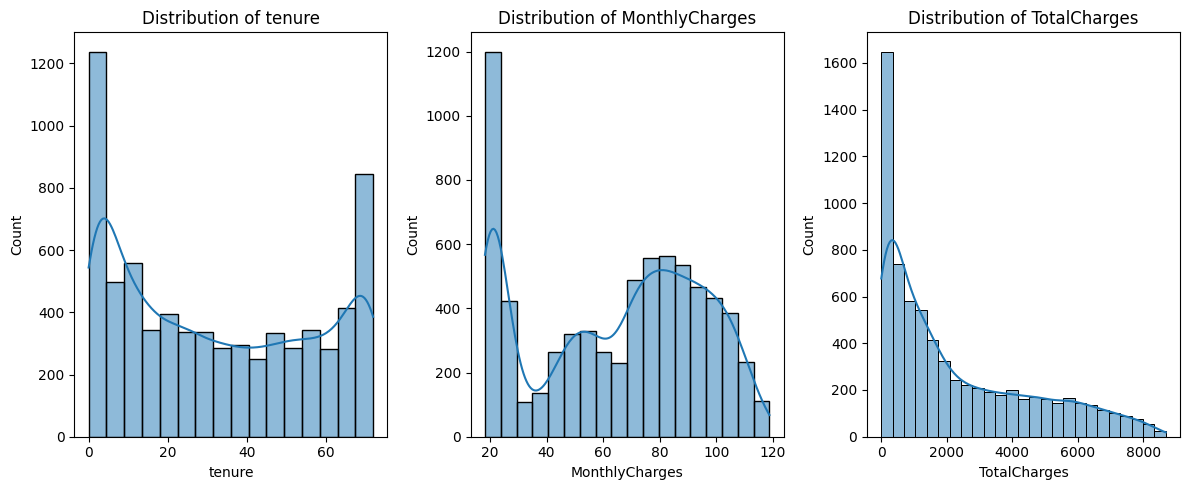

In [ ]:
#checking nuemrical data distribution
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)

    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

all of the numerical data are not normally distributed

## Check Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numerical = df[numerical_columns]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]

# Print result
print(vif_data)

          Feature       VIF
0          tenure  6.332328
1  MonthlyCharges  3.355660
2    TotalCharges  8.075070


Tenure and TotalCharges have VIF more than that indicates high Multicollinearity.

The high VIF values for tenure and TotalCharges suggest that these features are highly correlated with each other. This makes sense because TotalCharges is a direct function of tenure and MonthlyCharges, which explains the multicollinearity.

We have decided not to remove any features because, based on testing, removing 'TotalCharges' would lower our F2 score, which is our main focus.

# EXPLORATORY DATA ANALYSIS

In [ ]:
df_clean = df.copy()
df_clean.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


##  churn distribution

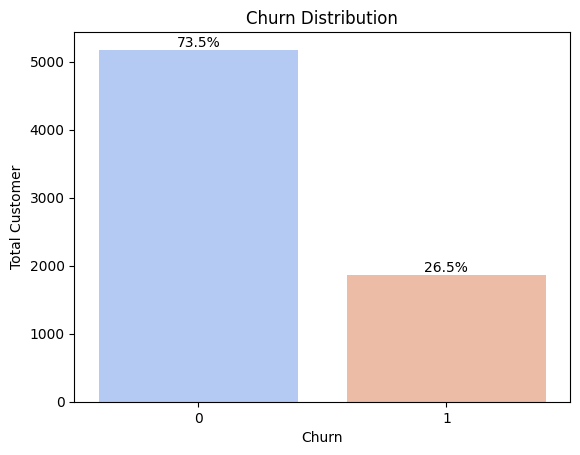

In [ ]:
plot = sns.countplot(x="Churn", data=df_clean, palette="coolwarm")

total = len(df_clean)

for p in plot.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title("Churn Distribution")
plt.ylabel("Total Customer")
plt.show()

## Customer Account Info with numerical variable

- Tenure vs Churn → Do customers who churn have shorter subscription durations?





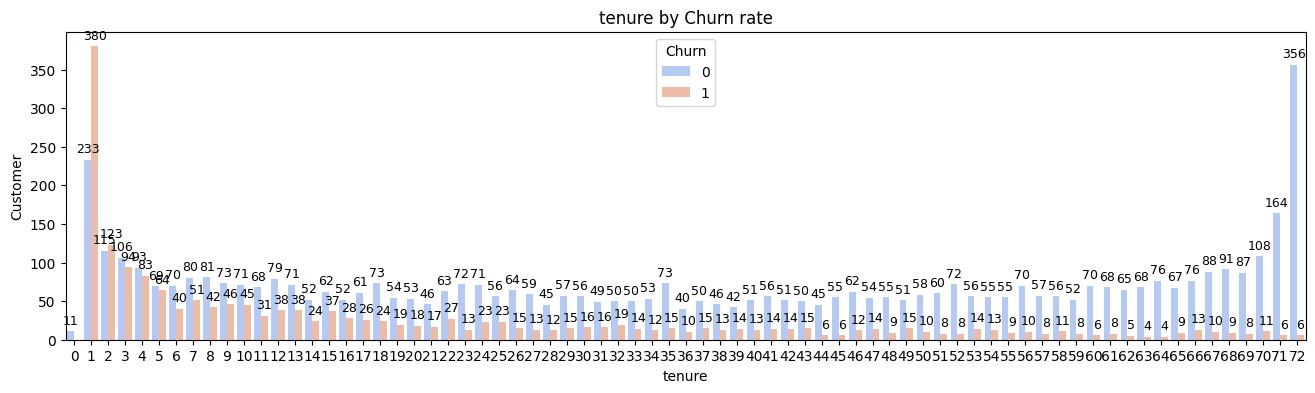

In [ ]:
plt.figure(figsize=(16, 4))
plot = sns.countplot(x="tenure", hue="Churn", data=df_clean, palette="coolwarm")


for p in plot.containers:
    plot.bar_label(p, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.title("tenure by Churn rate")
plt.ylabel("Customer")
plt.show()

The following histograms above we can get conclusions that:

1. Customers with short tenure are more churn.
2. Tenure 1-5 contribute the most to the customer churn with around 40% of churn rate.

## Customer Account Information with Categorical Variables

### Analysis Services Each Customer

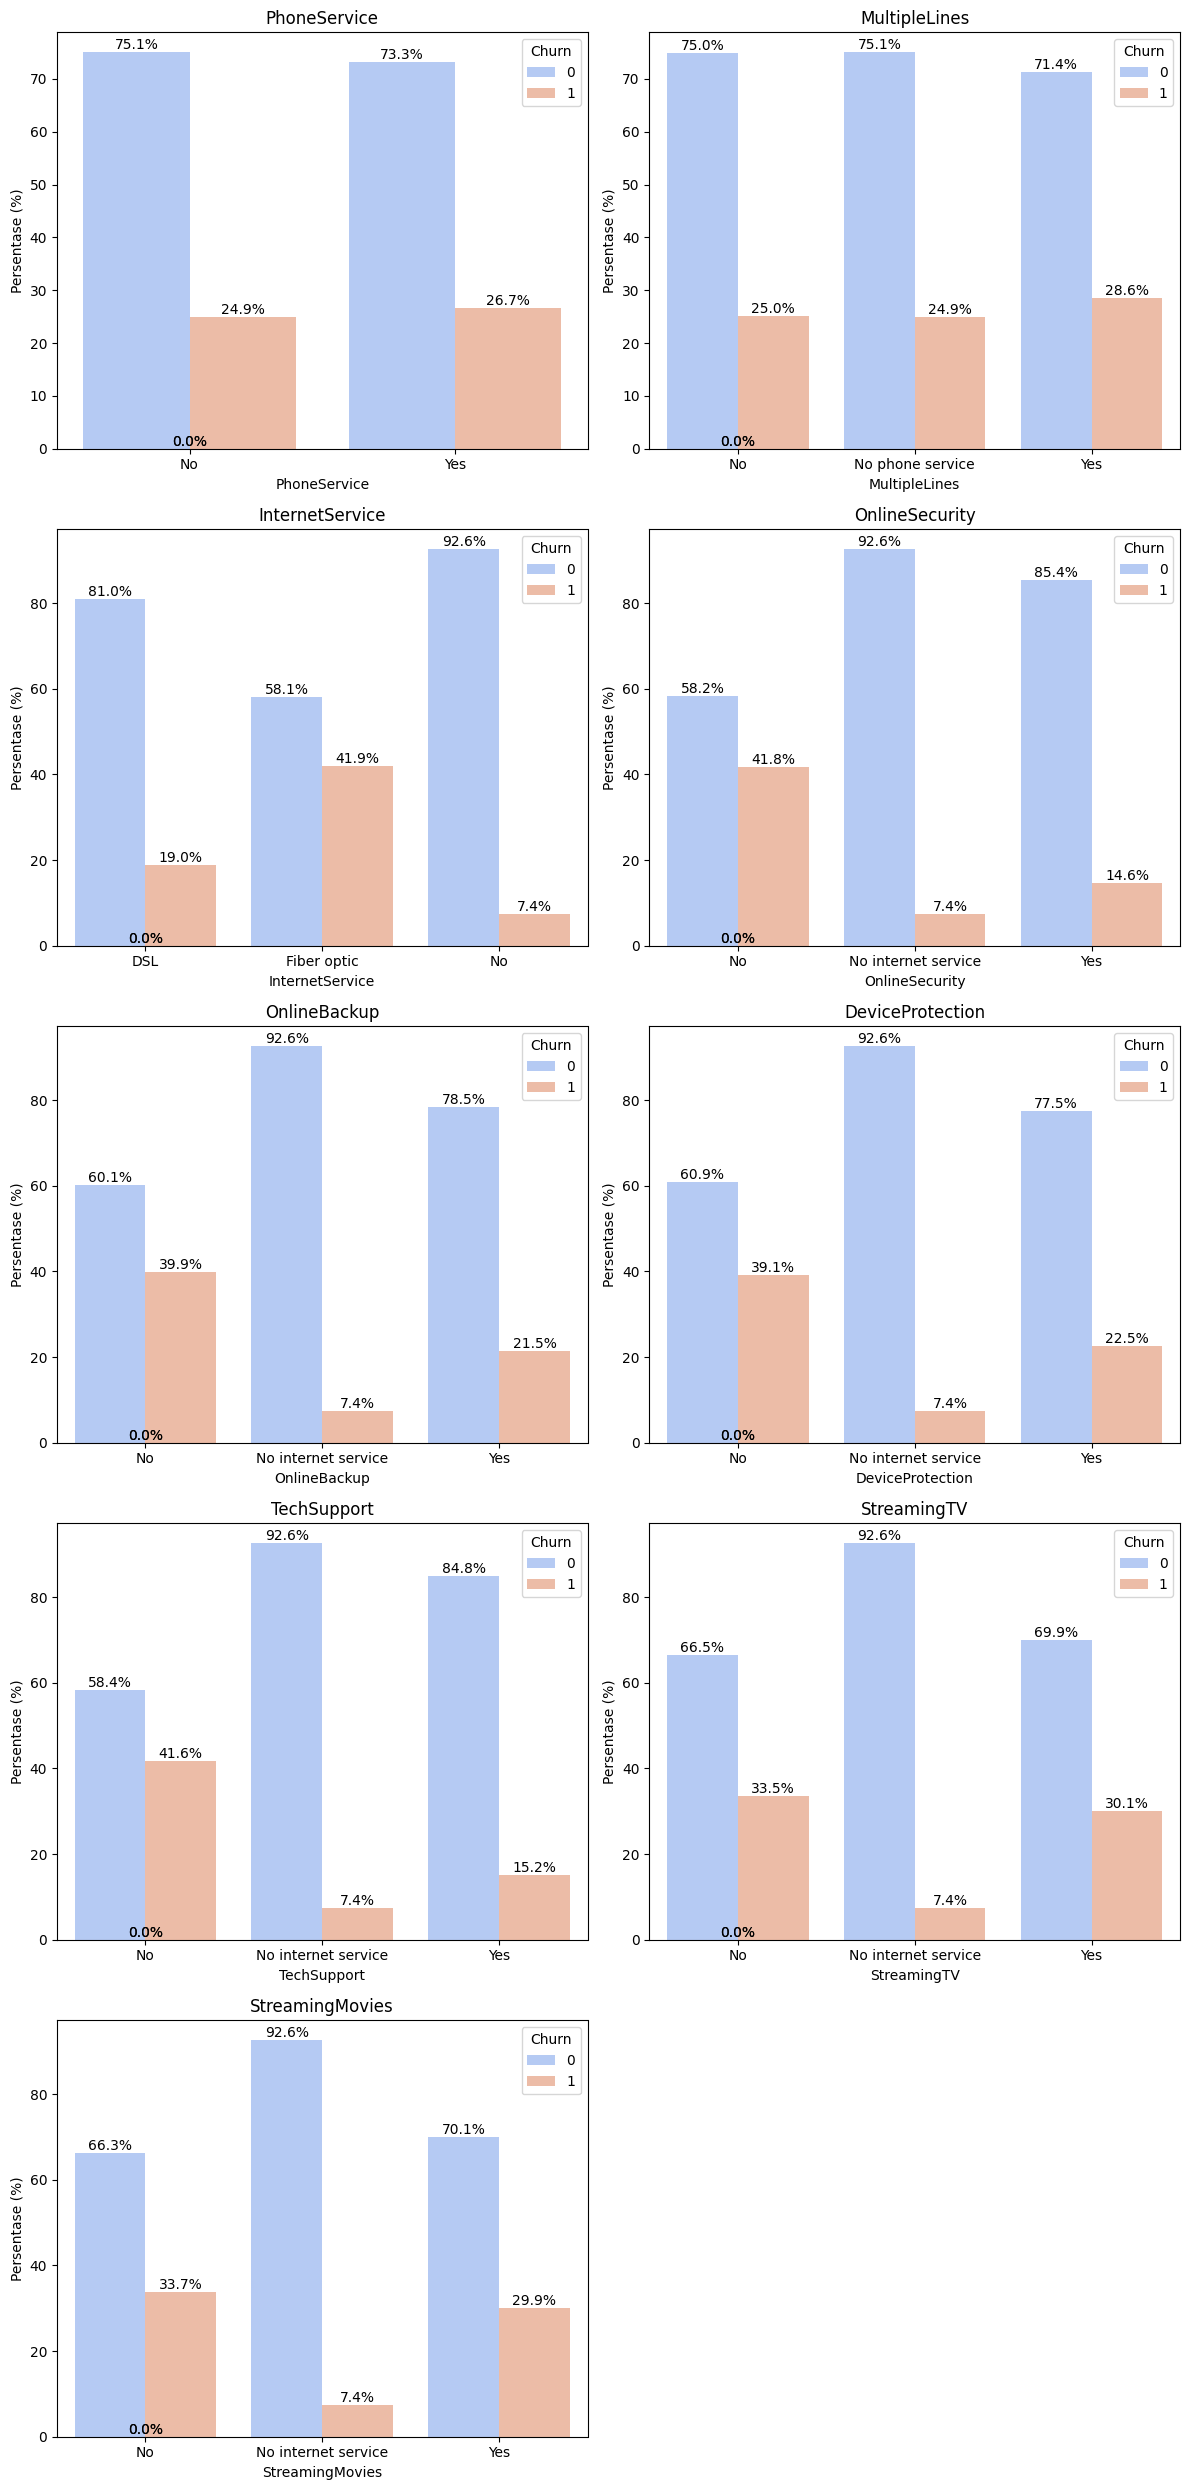

In [ ]:
def plot_categorical_to_target(df, features, target):
    number_of_rows = math.ceil(len(features) / 2)
    fig, axes = plt.subplots(nrows=number_of_rows, ncols=2, figsize=(12, 5 * number_of_rows))
    axes = axes.flatten()

    plot_count = 0

    for feature in features:

        df_grouped = df.groupby([feature, target]).size().reset_index(name="Count")

        if df_grouped.empty:
            continue

        total_per_category = df_grouped.groupby(feature)["Count"].sum().to_dict()
        df_grouped["Percentage"] = df_grouped.apply(lambda row: (row["Count"] / total_per_category[row[feature]]) * 100, axis=1)

        ax = axes[plot_count]

        sns.barplot(data=df_grouped, x=feature, y="Percentage", hue=target,
                    palette="coolwarm", ax=ax, dodge=True, errorbar=None)

        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')

        ax.set_title(feature)
        ax.set_ylabel("Persentase (%)")

        plot_count += 1

    for i in range(plot_count, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

customer_services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                     "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
plot_categorical_to_target(df_clean, customer_services, "Churn")

From graph above, we can say :

- Internet Customer without StreamingMovies have higher churn
- Internet Customer without TechSupport have higher churn
- Internet Customer without StreamingTV have higher churn
- Internet Customer without Device Protection have higher churn
- Internet Customer without Online Backup have higher churn
- Internet Customer without StreamingMovies have higher churn
- Phone service customer with Multiple Lines have higher churn


Conclusions by evaluating service attributes

- The moderately higher churn rate for customers who has the phone service.
- Customers with multiple line service have a higher churn rate comapred to No phone service and No multiple lines.
- Customers with internet service fiber optic have a higher churn rate compared with DSL and No.
- The much higher churn rate for customers without online security.
- Customers who don’t have access to tech support tend to leave more frequently than those who do.
- Customers without online backup and device protection have a higher churn rate.

### Contract, PaperlessBilling, PaymentMethod

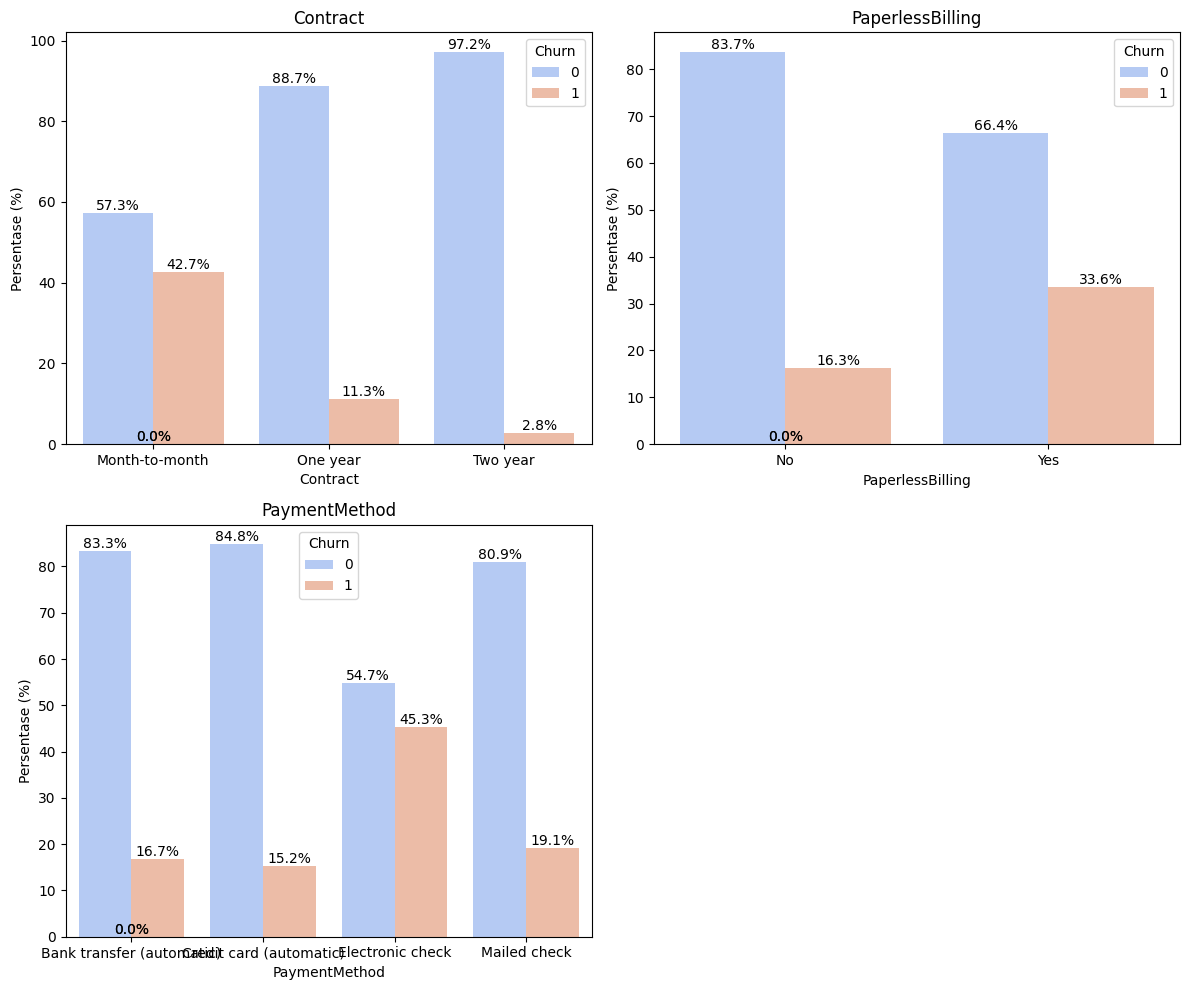

In [ ]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df_clean,customer_account_cat,"Churn")

Barplot above can make conclusions from that:

- Customers are more likely to churn with month-to-month contracts.
- Moderately higher churn rate with electronic check payment method.
- Customers with paperless billing have higher churn rates.

### Customer Demographic information

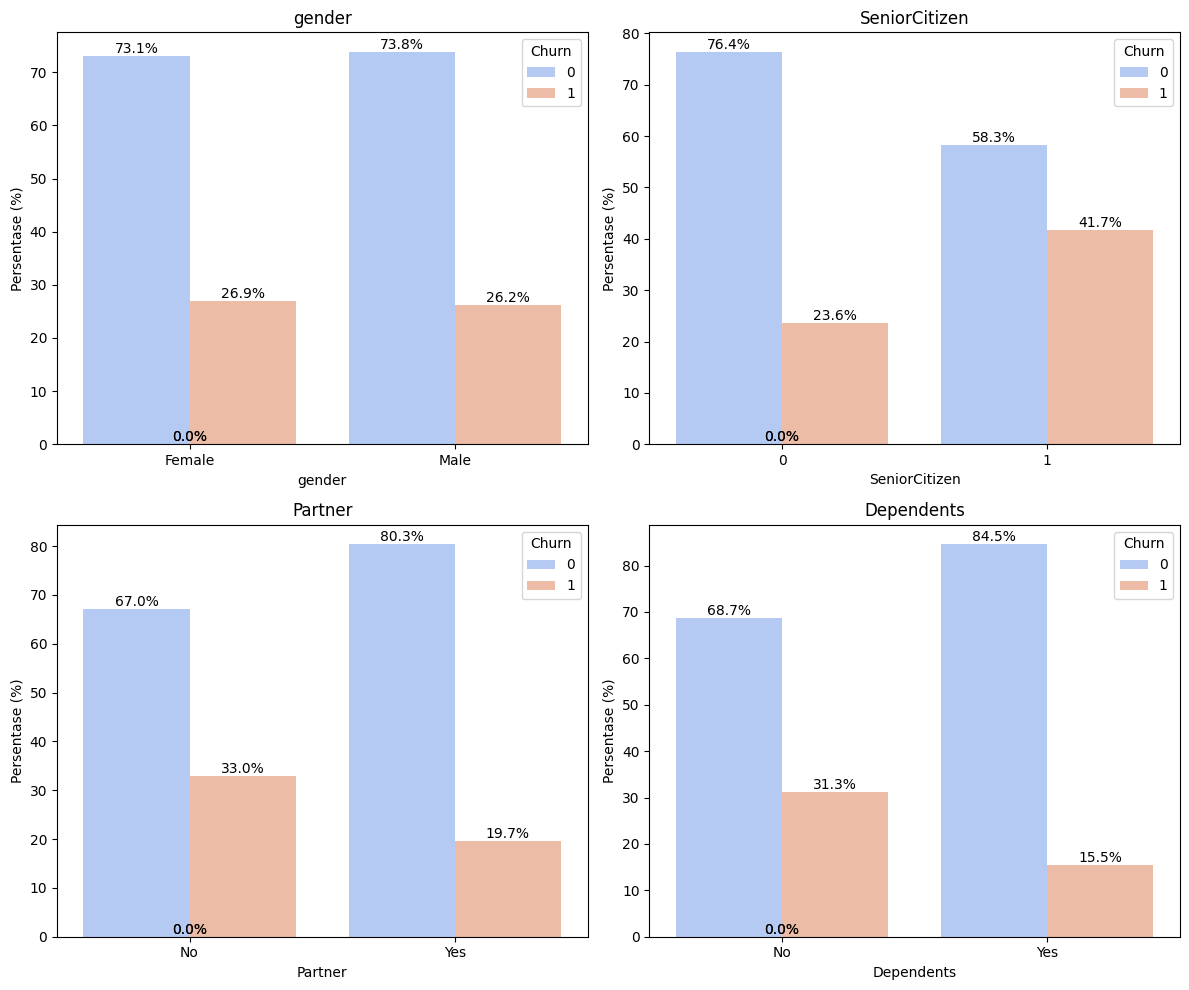

In [ ]:
demographic_columns = ["gender", "SeniorCitizen", "Partner", "Dependents"]
plot_categorical_to_target(df, demographic_columns, "Churn")

for barplot above, we have conclusion :
- Gender: Churn rates show minimal differences across genders, ranging from 26-27%.
- Age: Older customers have a higher churn rate (41.7%) compared to younger customers.
- Marital Status: Customers without a partner are more likely to churn compared to those with a partner.
- Dependents: Customers without family dependents are more likely to churn (31.3%) than those with dependents.

### Heatmap Correlation between Numeric

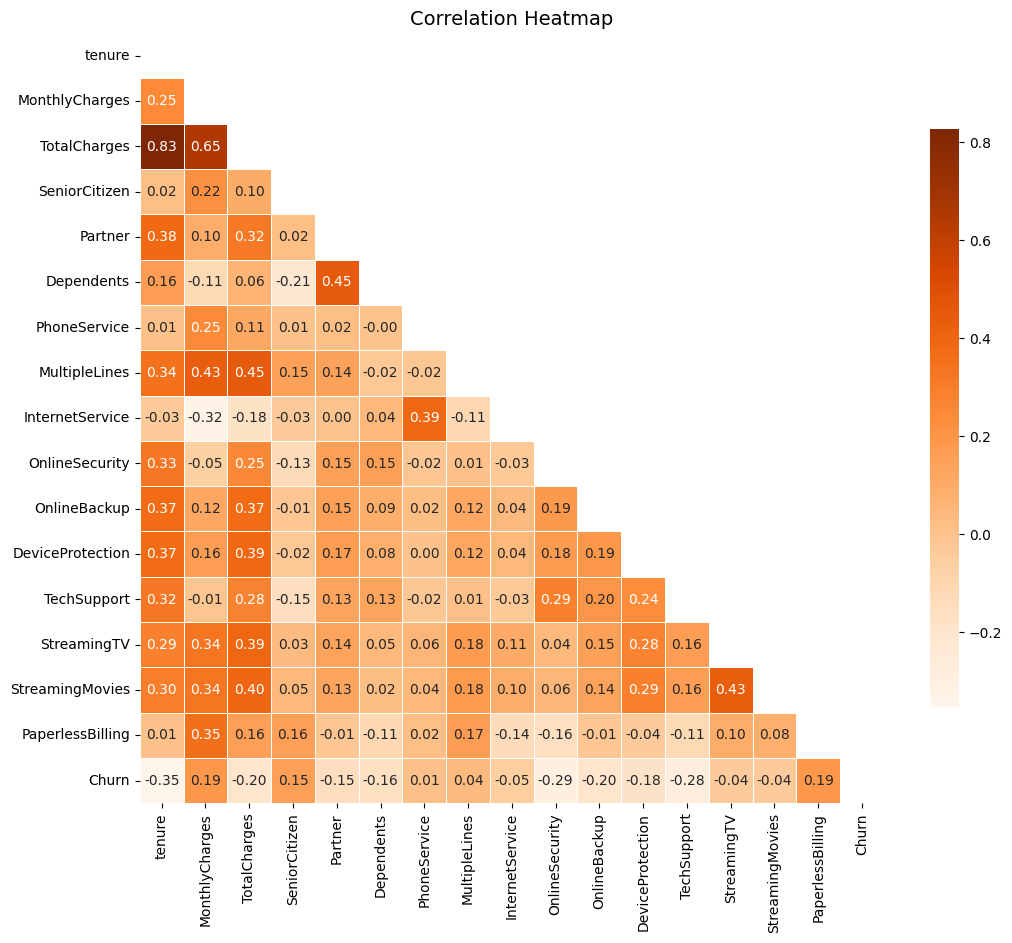

In [ ]:
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_columns = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
                       "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                       "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

df_encoded = df_clean.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

all_columns = numerical_columns + categorical_columns
corr_matrix = df_encoded[all_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix,
            annot=True,
            cmap="Oranges",
            fmt=".2f",
            mask=mask,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75})


plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### Conclusion

From the correlation heatmap, we can identify key factors that may influence customer churn.

1. Tenure and Churn (-0.35): Customers with longer tenure tend to have a lower risk of churn, indicating that new customers are more likely to leave.
2. Monthly Charges and Churn (0.19): There is a positive correlation between higher monthly charges and churn, suggesting that pricing may play a role in customer retention.
3. Streaming Services and Churn: StreamingTV (0.39) and StreamingMovies (0.43) show moderate correlations with churn, possibly indicating that customers who subscribe to these services are less satisfied or find them costly.
4. Security & Tech Support Services Reduce Churn: OnlineSecurity (-0.29), TechSupport (-0.29), and DeviceProtection (-0.18) have negative correlations with churn, suggesting that customers who use these services tend to stay longer.

## Gender

### Gender vs Churn
Do men/women churn more often?

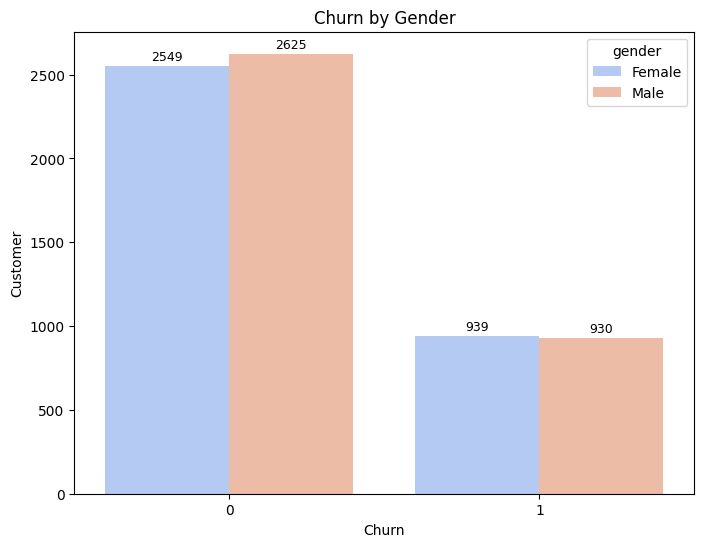

In [ ]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x="Churn", hue="gender", data=df_clean, palette="coolwarm")


for p in plot.containers:
    plot.bar_label(p, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.title("Churn by Gender")
plt.ylabel("Customer")
plt.show()


### Gender Distribution

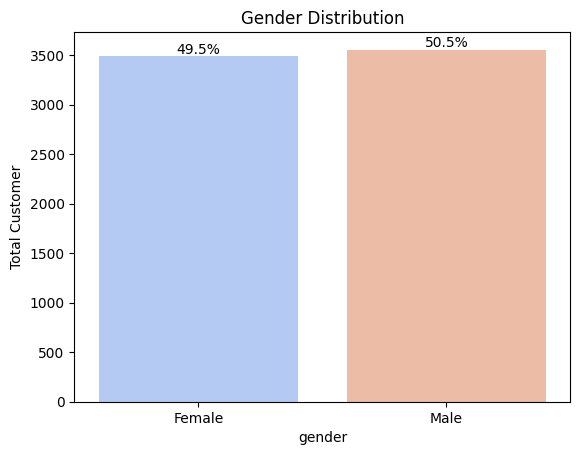

In [ ]:

plot = sns.countplot(x="gender", data=df_clean, palette="coolwarm")


total = len(df_clean) # Total customer


for p in plot.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%' #count percentage above the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title("Gender Distribution")
plt.ylabel("Total Customer")
plt.show()

cons:
- Female and Male has not to different in quantity

### Gender vs Phone Service

<Figure size 800x600 with 0 Axes>

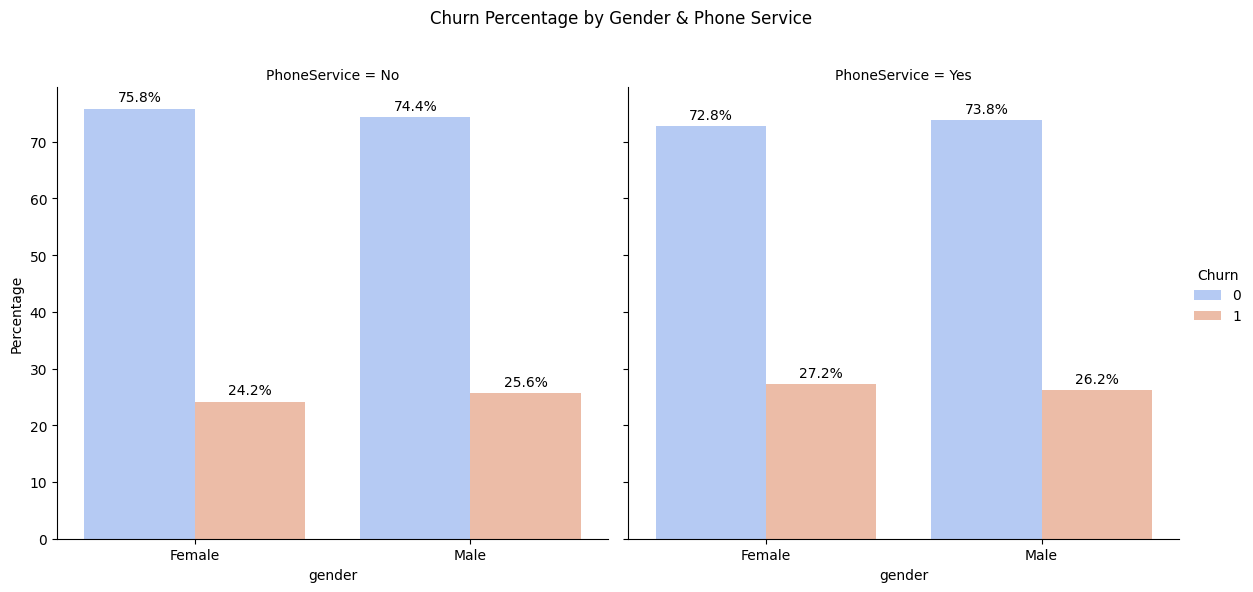

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['PhoneService', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['PhoneService', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="PhoneService",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & Phone Service")

plt.show()

The churn rate is relatively similar between customers with and without Phone Service.

### Gender vs InternetService


<Figure size 800x600 with 0 Axes>

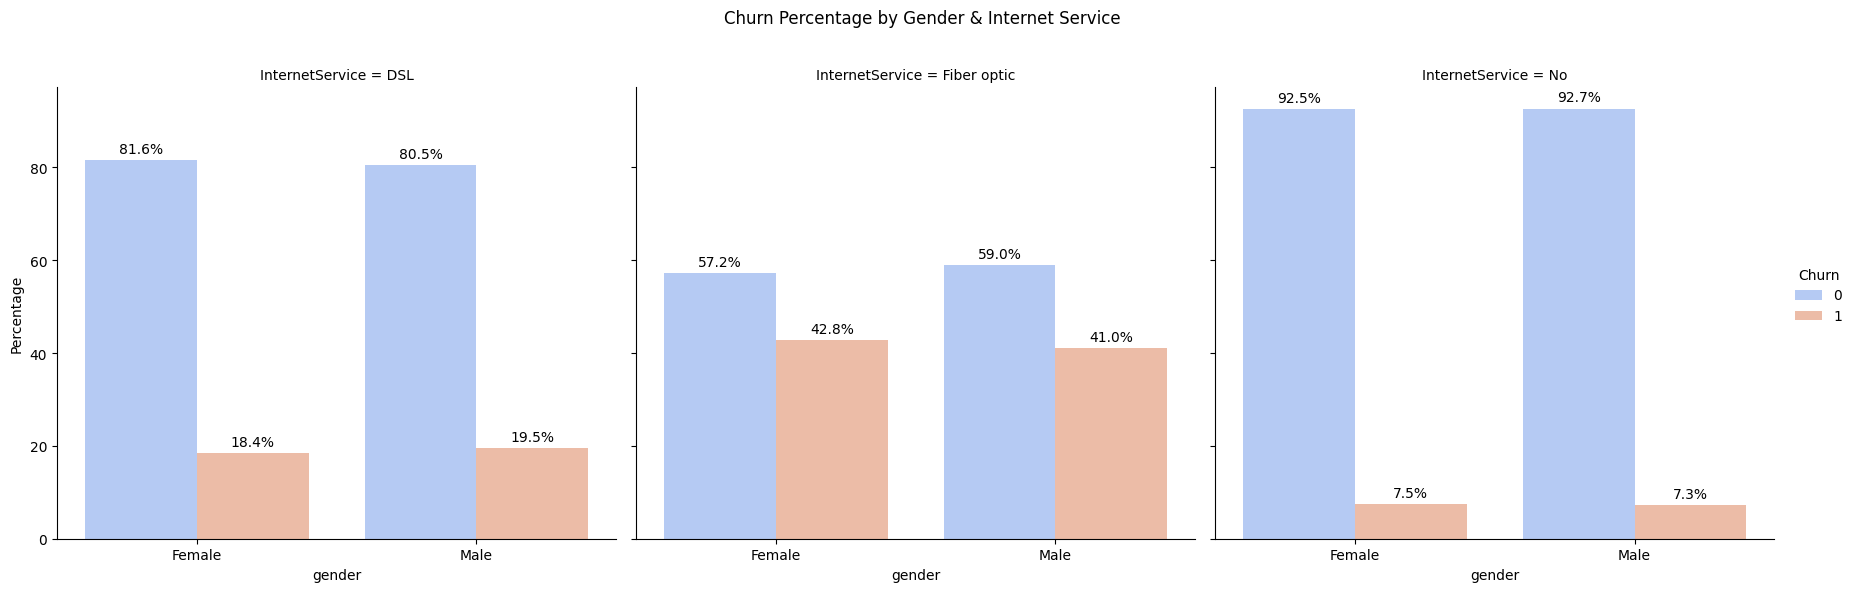

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['InternetService', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['InternetService', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="InternetService",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & Internet Service")

plt.show()

from graph above :
- The majority of customers use Fiber Optic, regardless of gender. and the higher churn rate is customer with fiber optic subscription.
- DSL users are fewer in number compared to Fiber Optic users.
- Additionally, there are some customers who do not use internet services.



### Gender vs OnlineSecurity

<Figure size 800x600 with 0 Axes>

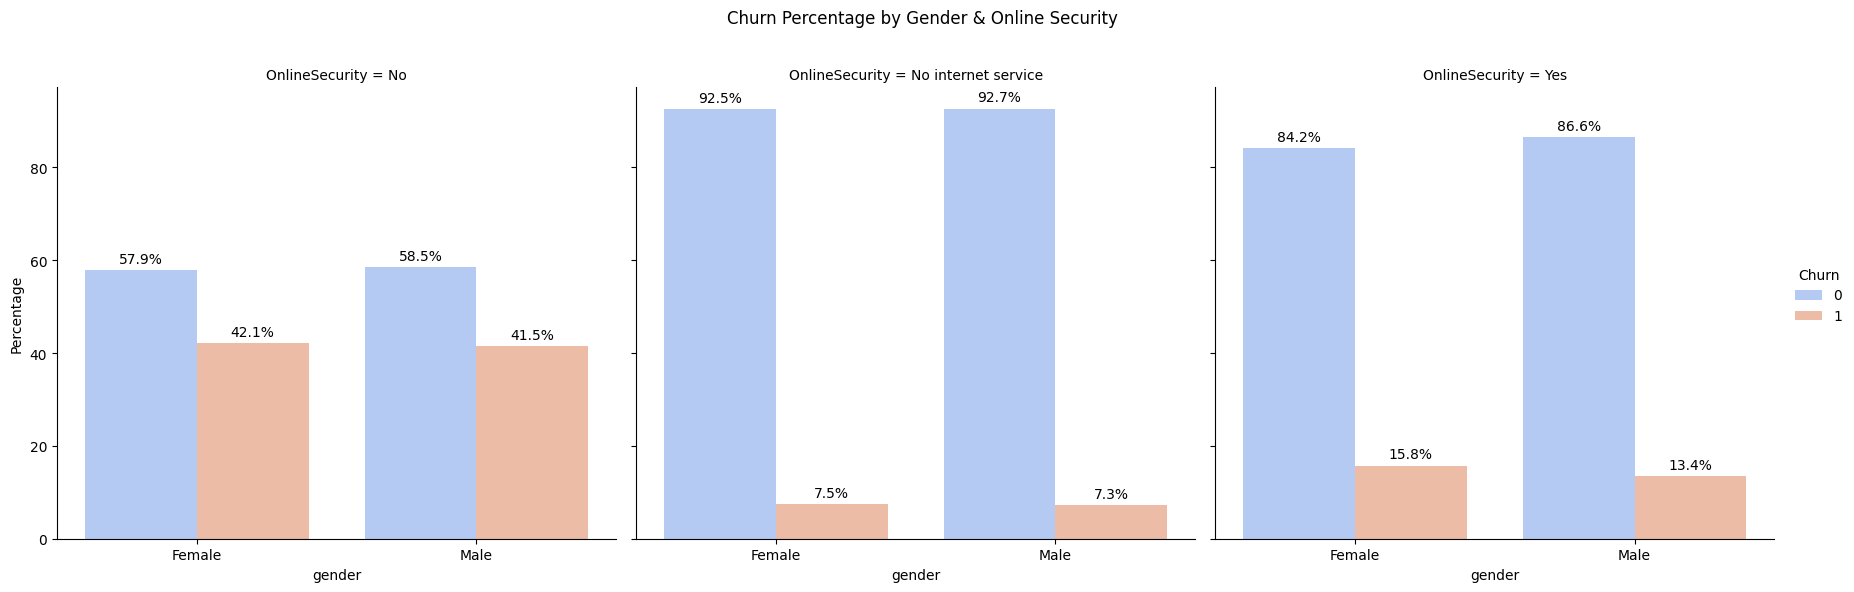

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['OnlineSecurity', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['OnlineSecurity', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="OnlineSecurity",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & Online Security")

plt.show()

Based on the graph above, the conclusions can be drawn:

1. The number of male and female customers who `subscribe to internet services and use online security appears to be balanced`, as is the case with customers who do not use online security.

2. However, the number of internet service customers who do `not use online security` is higher than those who do.

3. There are also customers who do not subscribe to internet services, and therefore cannot use online security.

### Gender vs Techsupport

<Figure size 800x600 with 0 Axes>

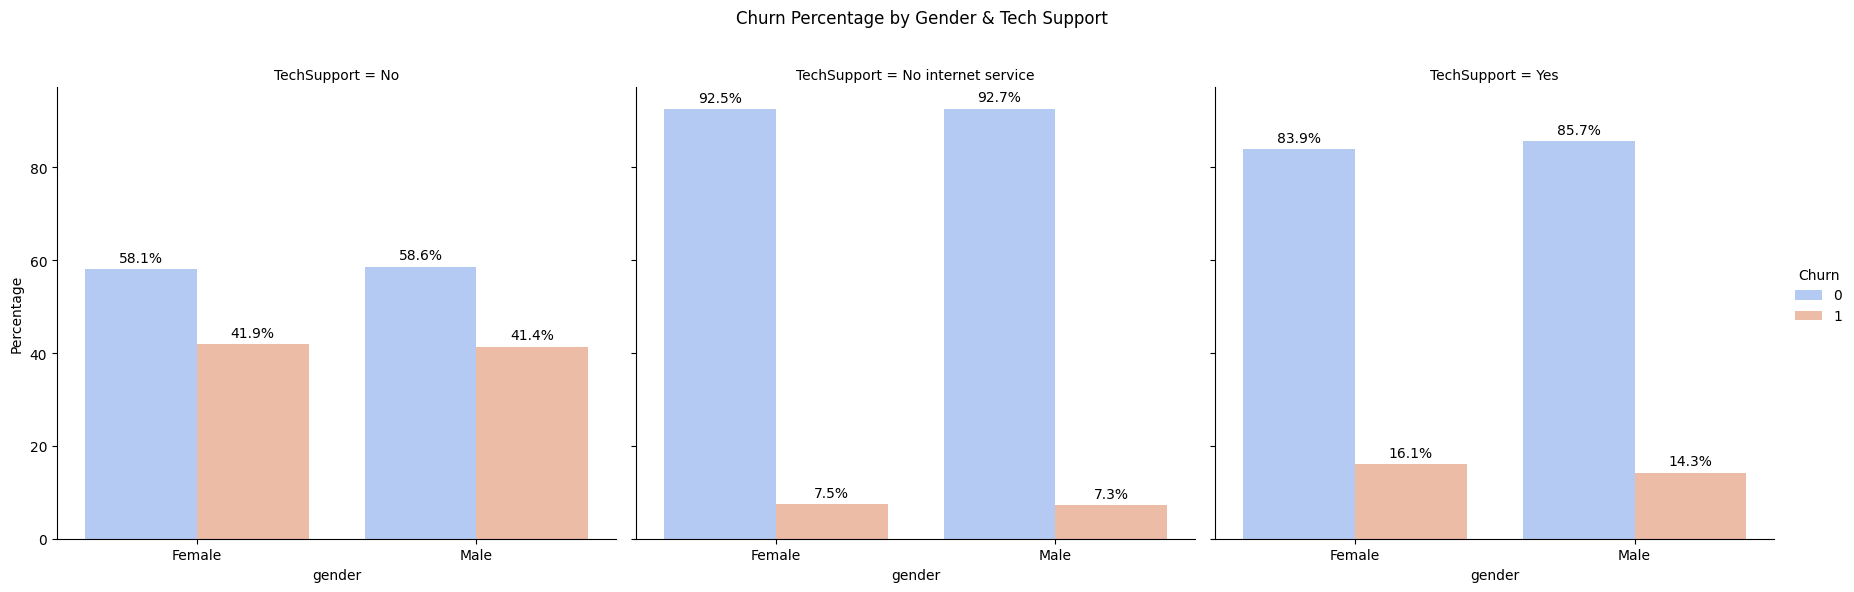

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['TechSupport', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['TechSupport', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="TechSupport",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & Tech Support")

plt.show()

- higher churn rate is customer who do not use tech support

### Gender vs MultipleLines

<Figure size 800x600 with 0 Axes>

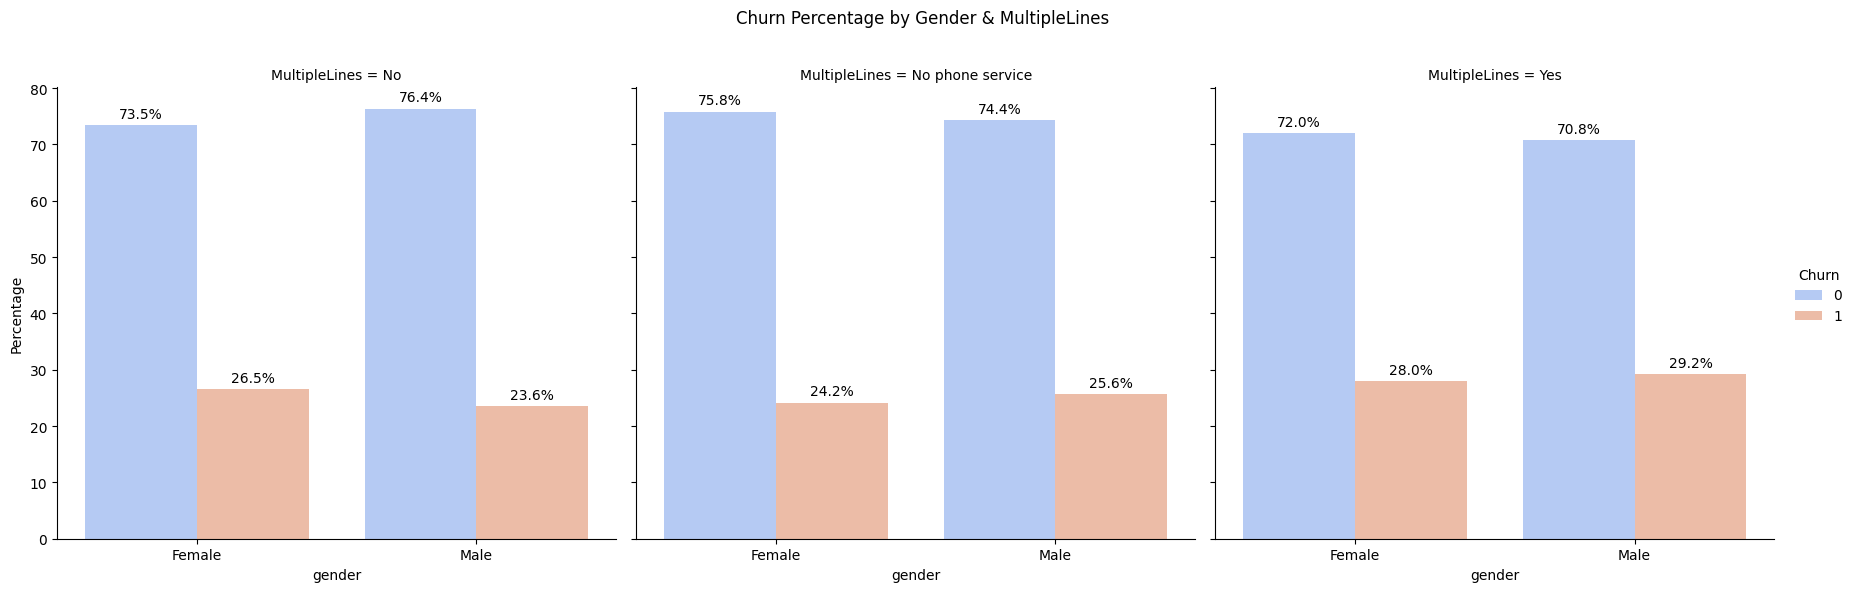

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['MultipleLines', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['MultipleLines', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="MultipleLines",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & MultipleLines")

plt.show()

### Gender vs Online Backup

<Figure size 800x600 with 0 Axes>

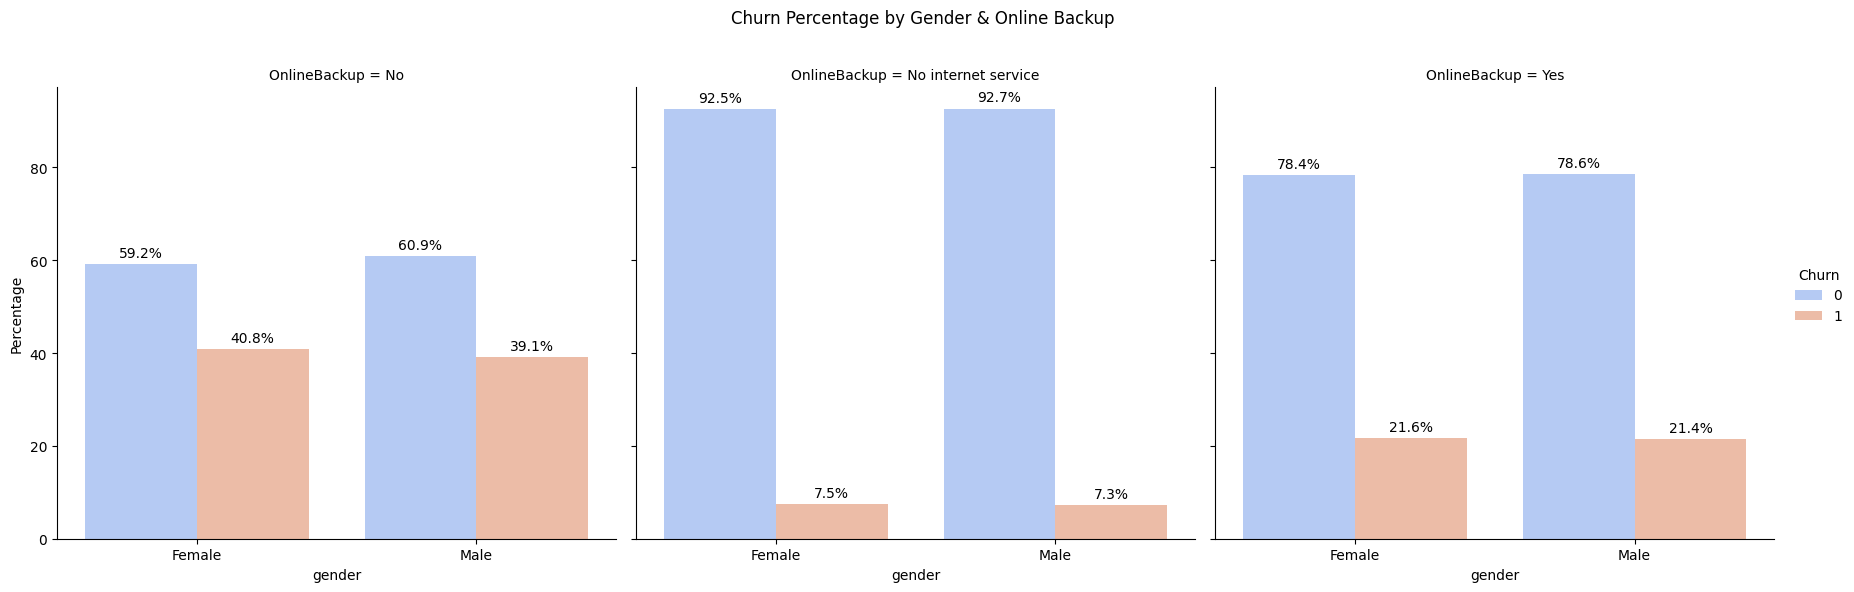

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['OnlineBackup', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['OnlineBackup', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="OnlineBackup",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & Online Backup")

plt.show()

### Gender vs Device Protection

<Figure size 800x600 with 0 Axes>

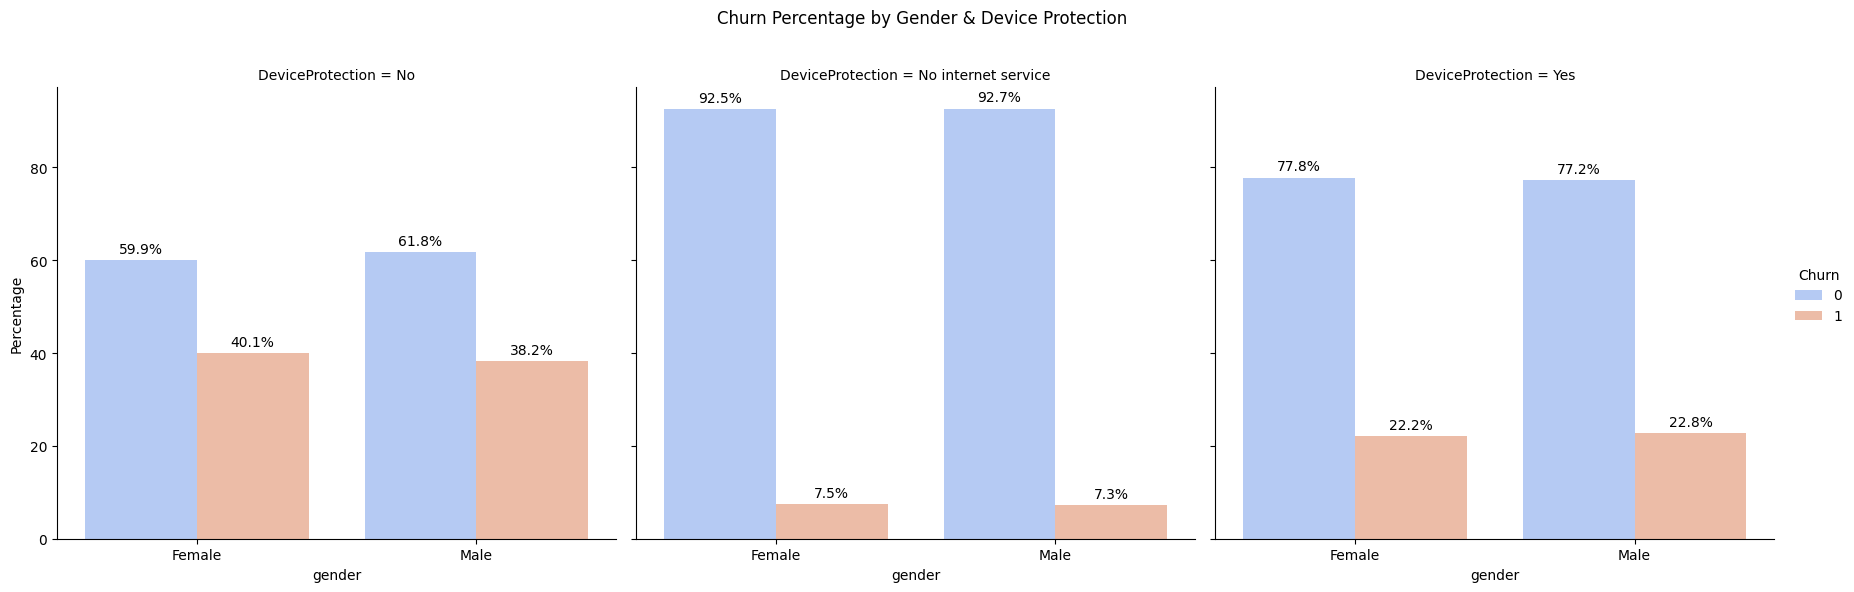

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['DeviceProtection', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['DeviceProtection', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="DeviceProtection",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & Device Protection")

plt.show()

### Gender vs StreamingTV

<Figure size 800x600 with 0 Axes>

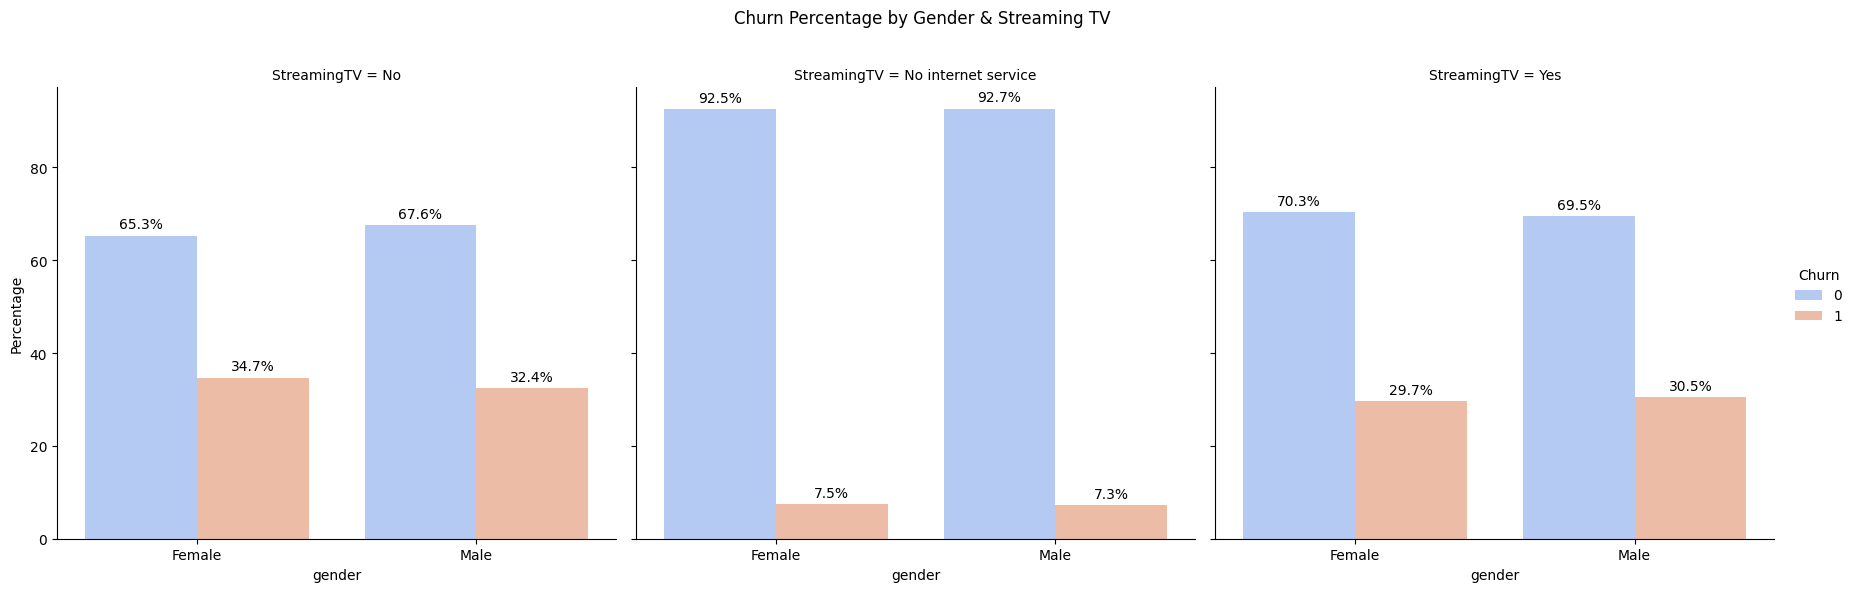

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['StreamingTV', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['StreamingTV', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="StreamingTV",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & Streaming TV")

plt.show()

### Gender vs StreamingMovies

<Figure size 800x600 with 0 Axes>

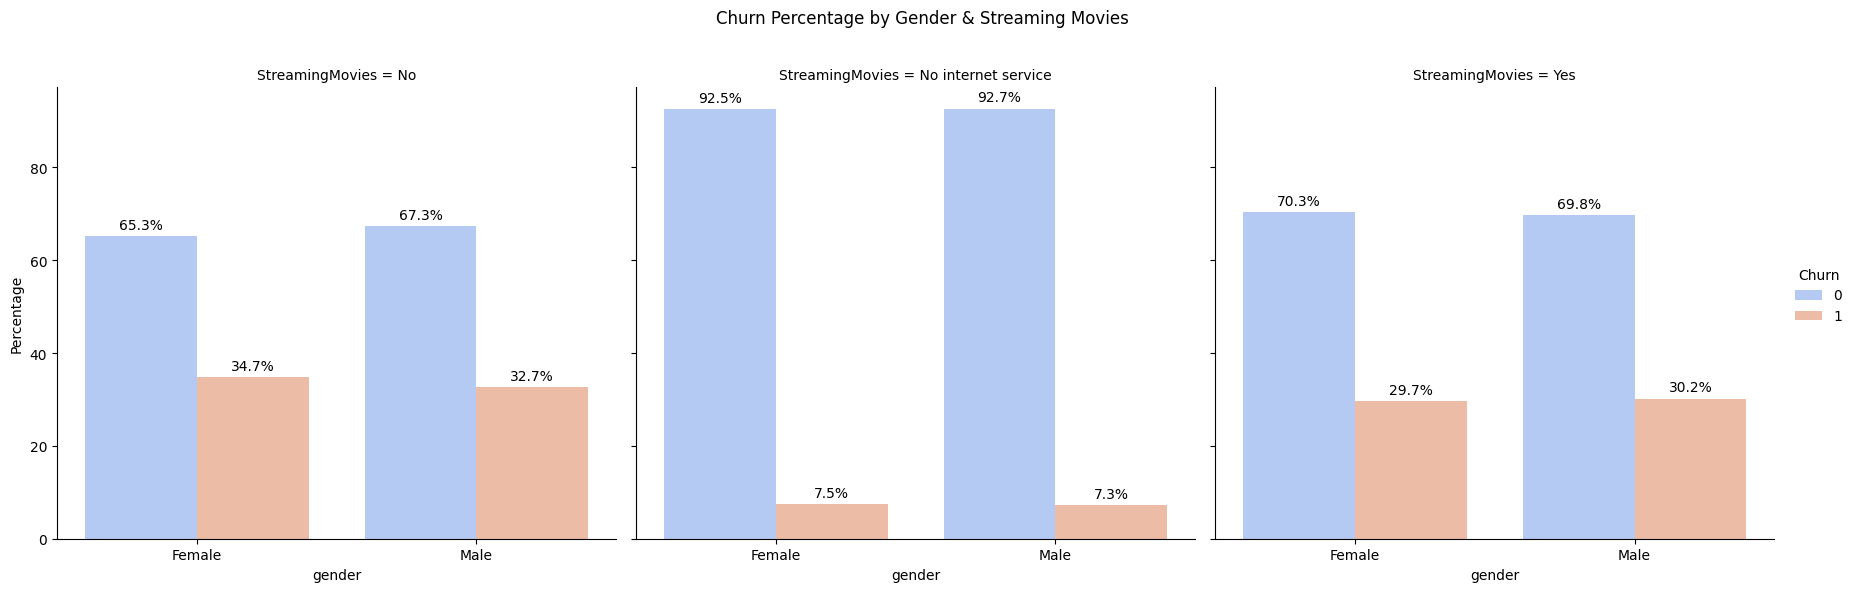

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['StreamingMovies', 'gender', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['StreamingMovies', 'gender'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="gender",
    y="Percentage",
    hue="Churn",
    col="StreamingMovies",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Gender & Streaming Movies")

plt.show()

#### Conclusion for 'Gender' Behavior

- In gender show no signifficant difference in churn rates between male and female customer.
- Customers—both male and female—who are more likely to churn tend to:

- Use Phone service
- Use Fiber Optic as their Internet Service
- Use multiple line
- Does not subscribe to Online Security, Online Backup, Device Protection, Tech Support
- Does not use use Streaming TV , Streaming Movies

## SeniorCitizen

### SeniorCitizen vs Churn

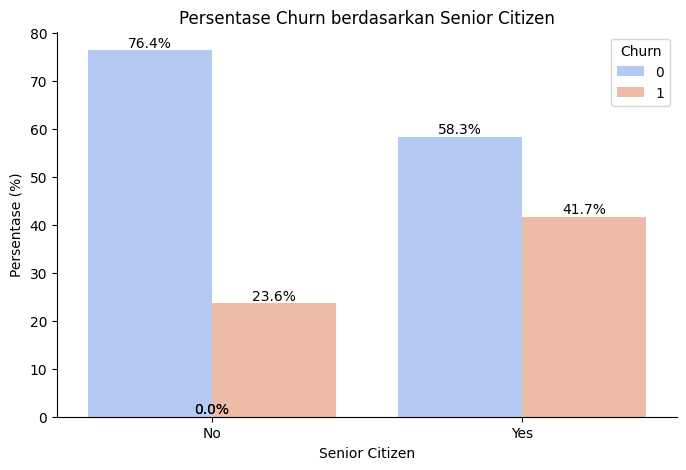

In [ ]:

df_grouped = df_clean.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="Count")

total_per_senior = df_grouped.groupby("SeniorCitizen")["Count"].sum().to_dict()

df_grouped["Percentage"] = df_grouped.apply(lambda row: (row["Count"] / total_per_senior[row["SeniorCitizen"]]) * 100, axis=1)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_grouped, x="SeniorCitizen", y="Percentage", hue="Churn",
                 palette="coolwarm", dodge=True, errorbar=None)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks([0,1], ["No","Yes"])
plt.legend(title="Churn", loc="upper right")
sns.despine(top=True, right=True)

plt.title("Persentase Churn berdasarkan Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Persentase (%)")

# Tampilkan plot
plt.show()

### SeniorCitizen vs PhoneService

<Figure size 800x600 with 0 Axes>

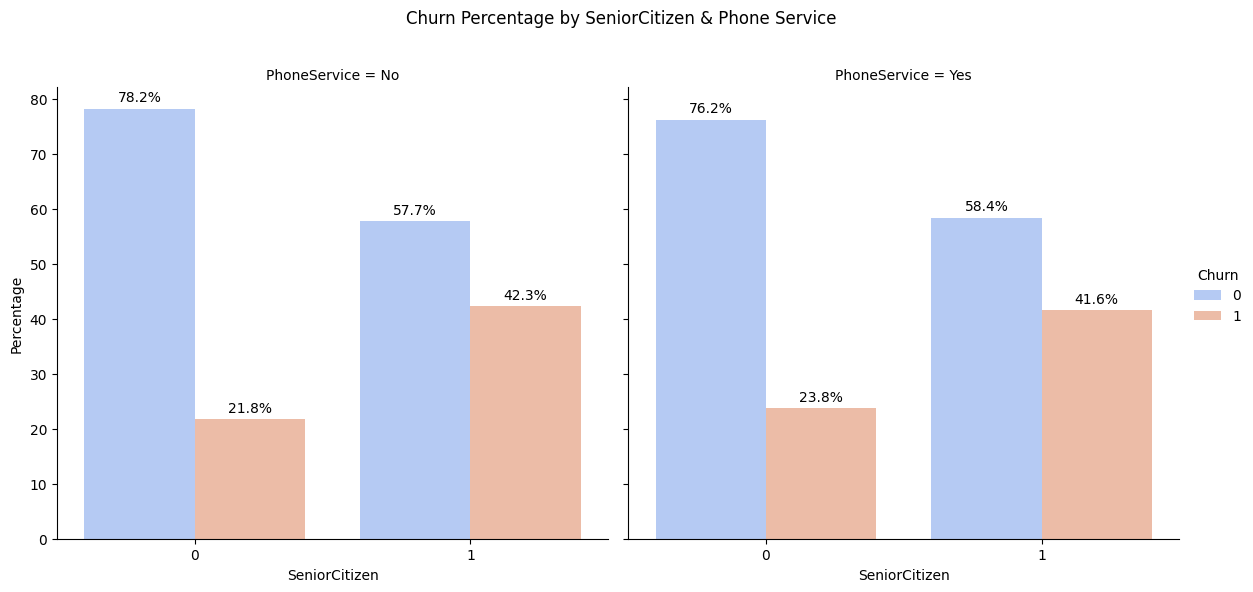

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['PhoneService', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['PhoneService', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="PhoneService",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by SeniorCitizen & Phone Service")

plt.show()

### SeniorCitizen vs InternetService

<Figure size 800x600 with 0 Axes>

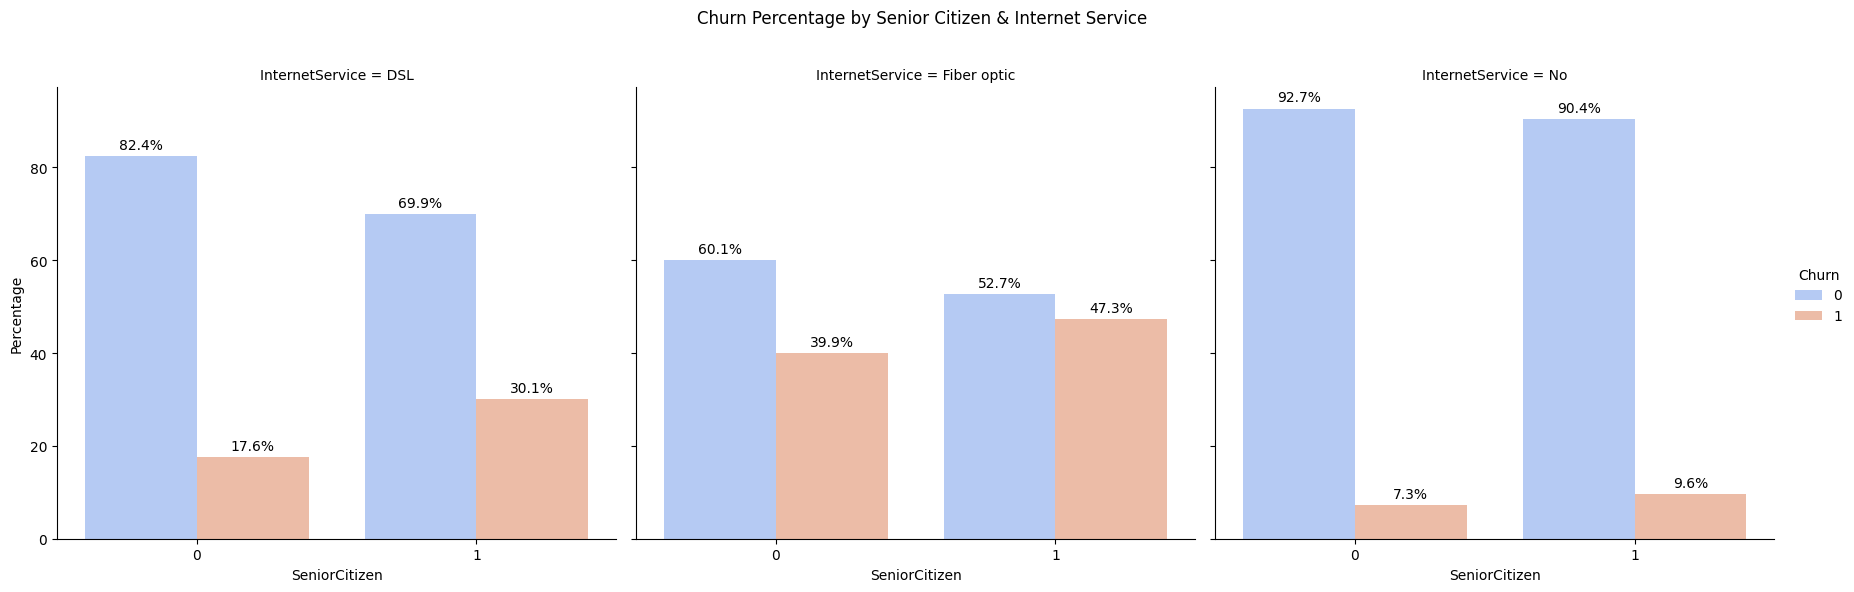

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['InternetService', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['InternetService', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="InternetService",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Senior Citizen & Internet Service")

plt.show()

### SeniorCitizen vs MultipleLines

<Figure size 800x600 with 0 Axes>

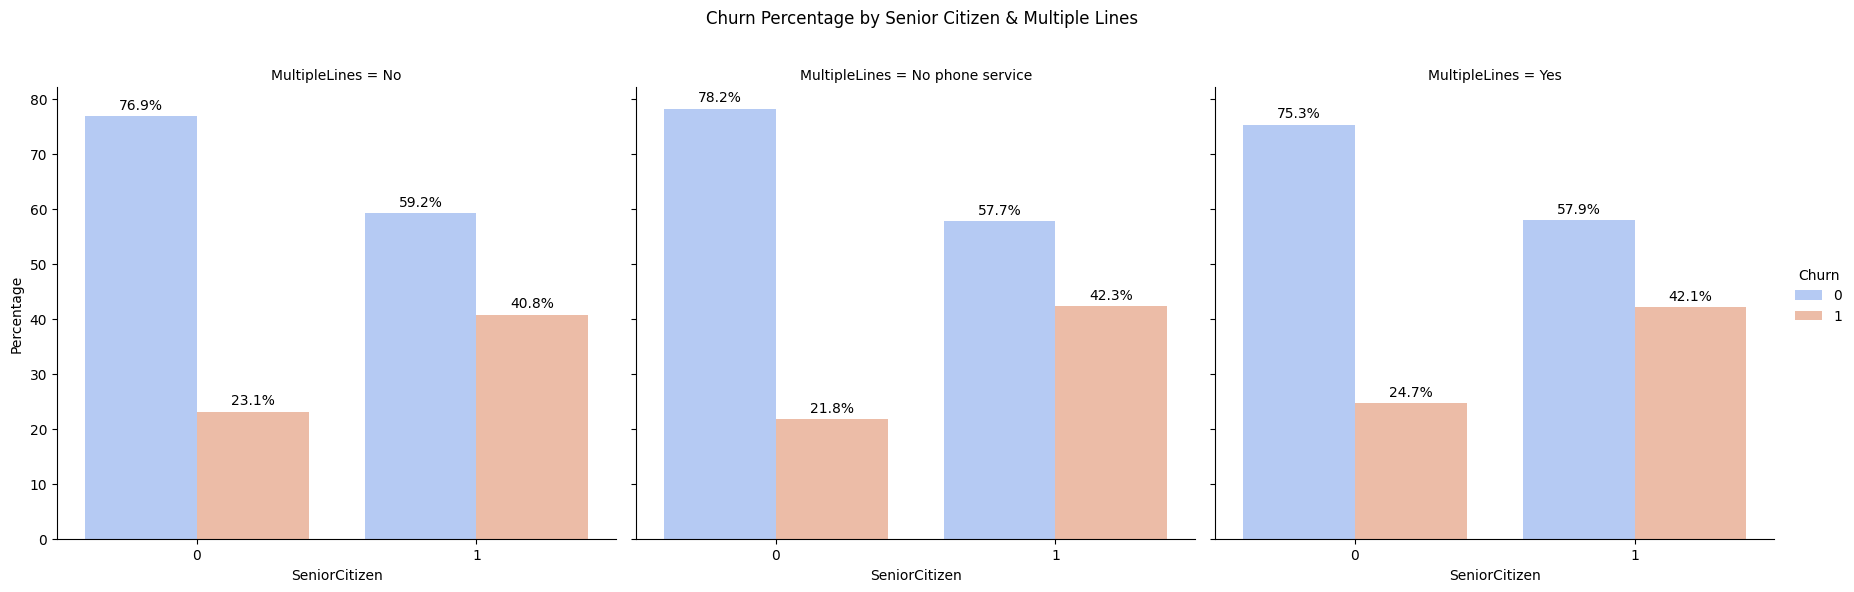

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['MultipleLines', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['MultipleLines', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="MultipleLines",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Senior Citizen & Multiple Lines")

plt.show()

### SeniorCitizen vs OnlineBackup

<Figure size 800x600 with 0 Axes>

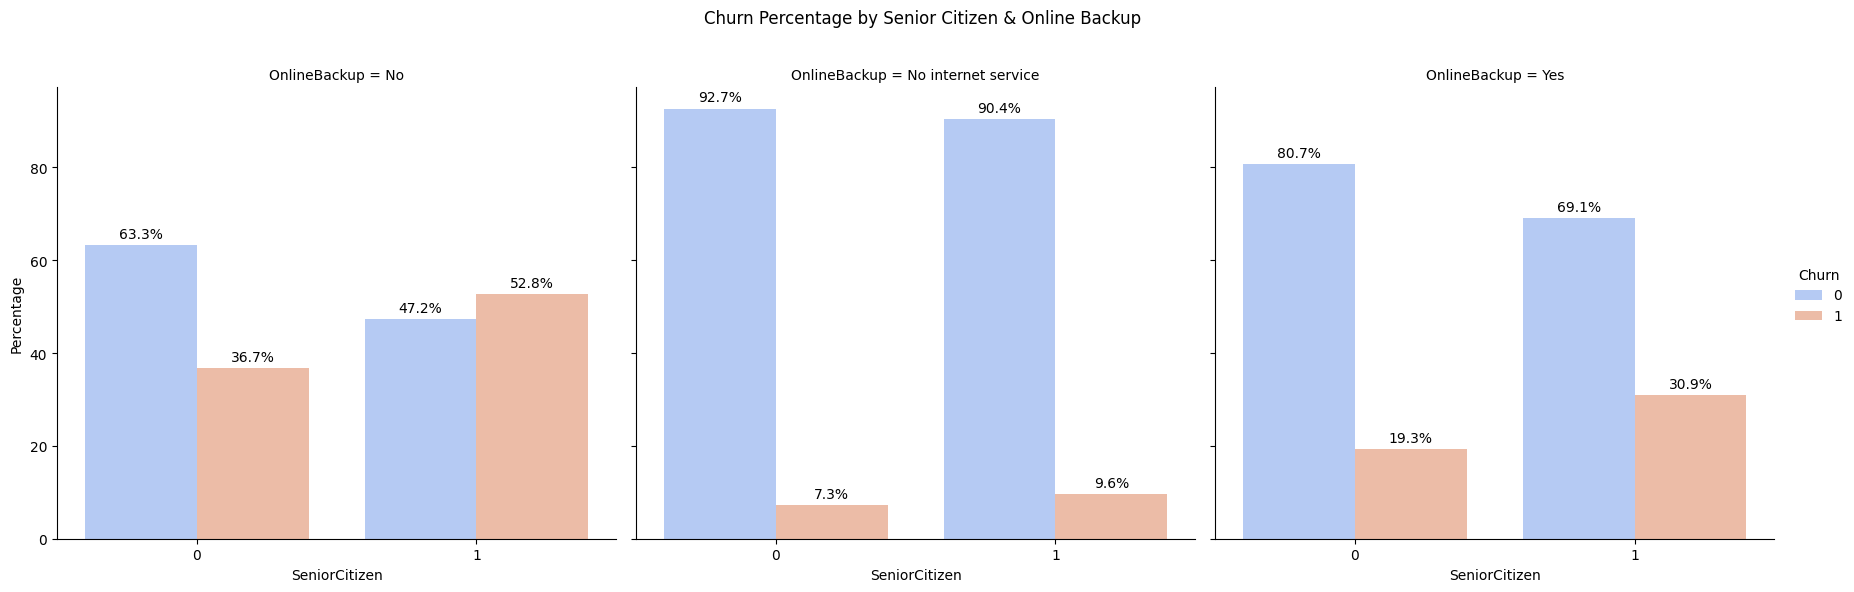

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['OnlineBackup', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['OnlineBackup', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="OnlineBackup",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Senior Citizen & Online Backup")

plt.show()

### SeniorCitizen vs DeviceProtection


<Figure size 800x600 with 0 Axes>

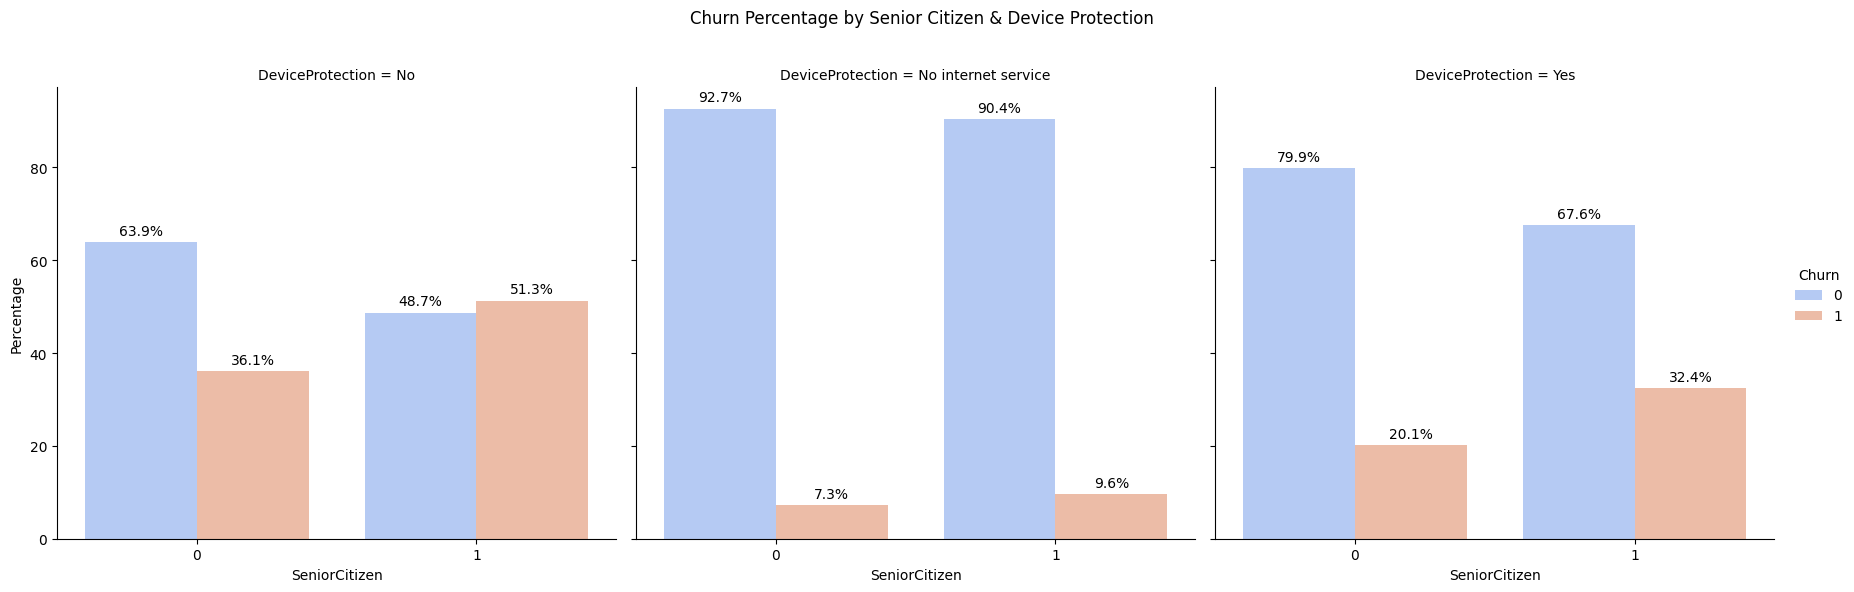

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['DeviceProtection', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['DeviceProtection', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="DeviceProtection",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Senior Citizen & Device Protection")

plt.show()

### SeniorCitizen vs OnlineSecurity

<Figure size 800x600 with 0 Axes>

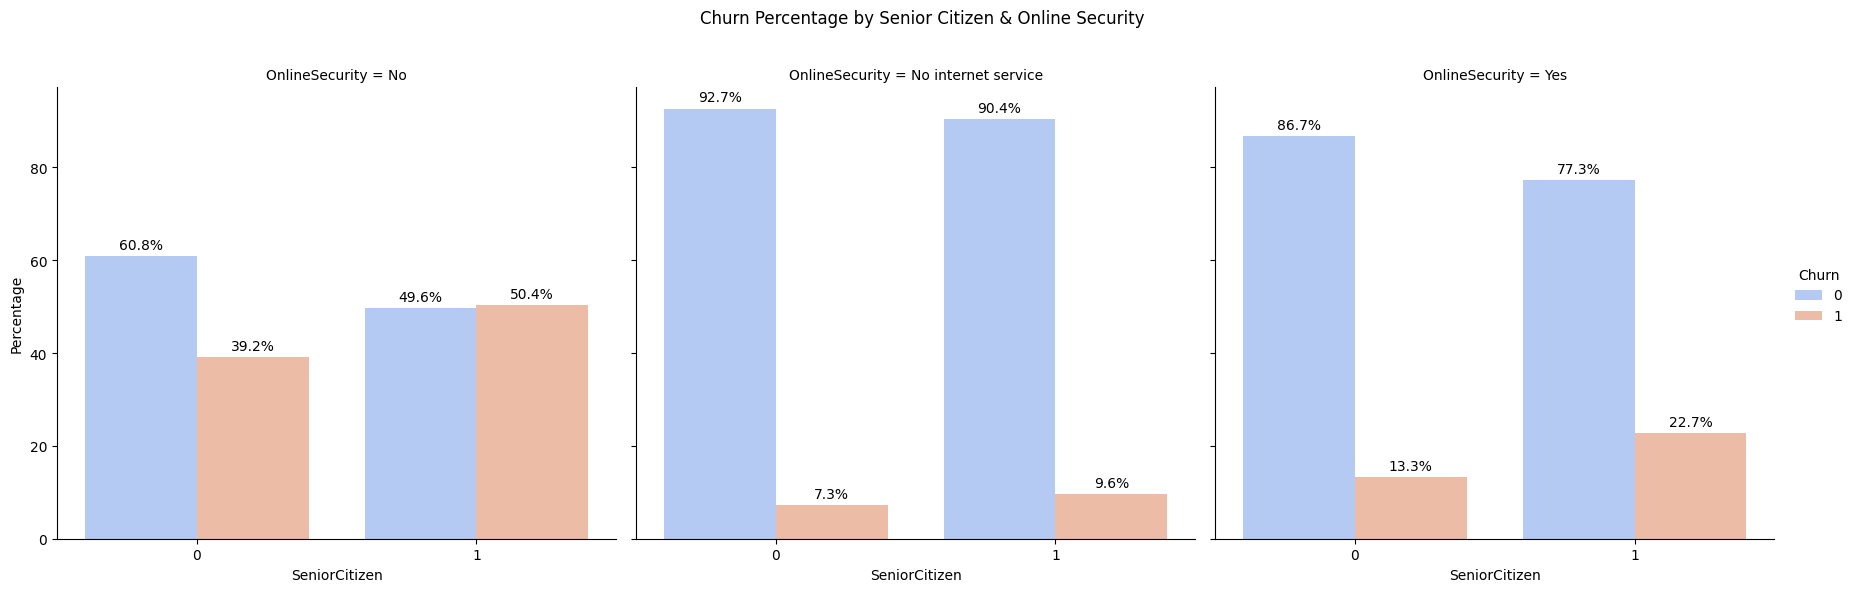

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['OnlineSecurity', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['OnlineSecurity', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="OnlineSecurity",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Senior Citizen & Online Security")

plt.show()

### SeniorCitizen vs TechSupport

<Figure size 800x600 with 0 Axes>

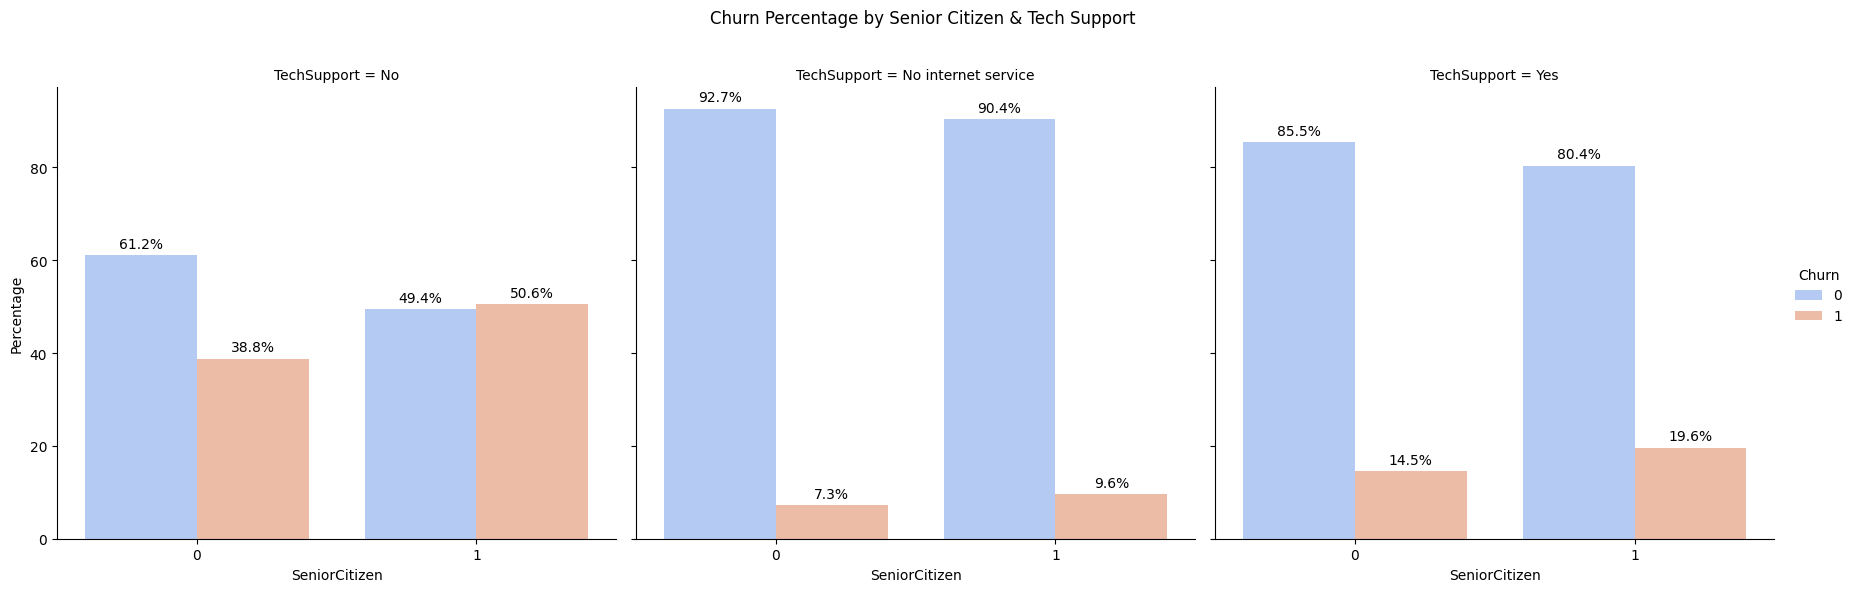

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['TechSupport', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['TechSupport', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="TechSupport",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Senior Citizen & Tech Support")

plt.show()

### SeniorCitizen vs StreamingTv

<Figure size 800x600 with 0 Axes>

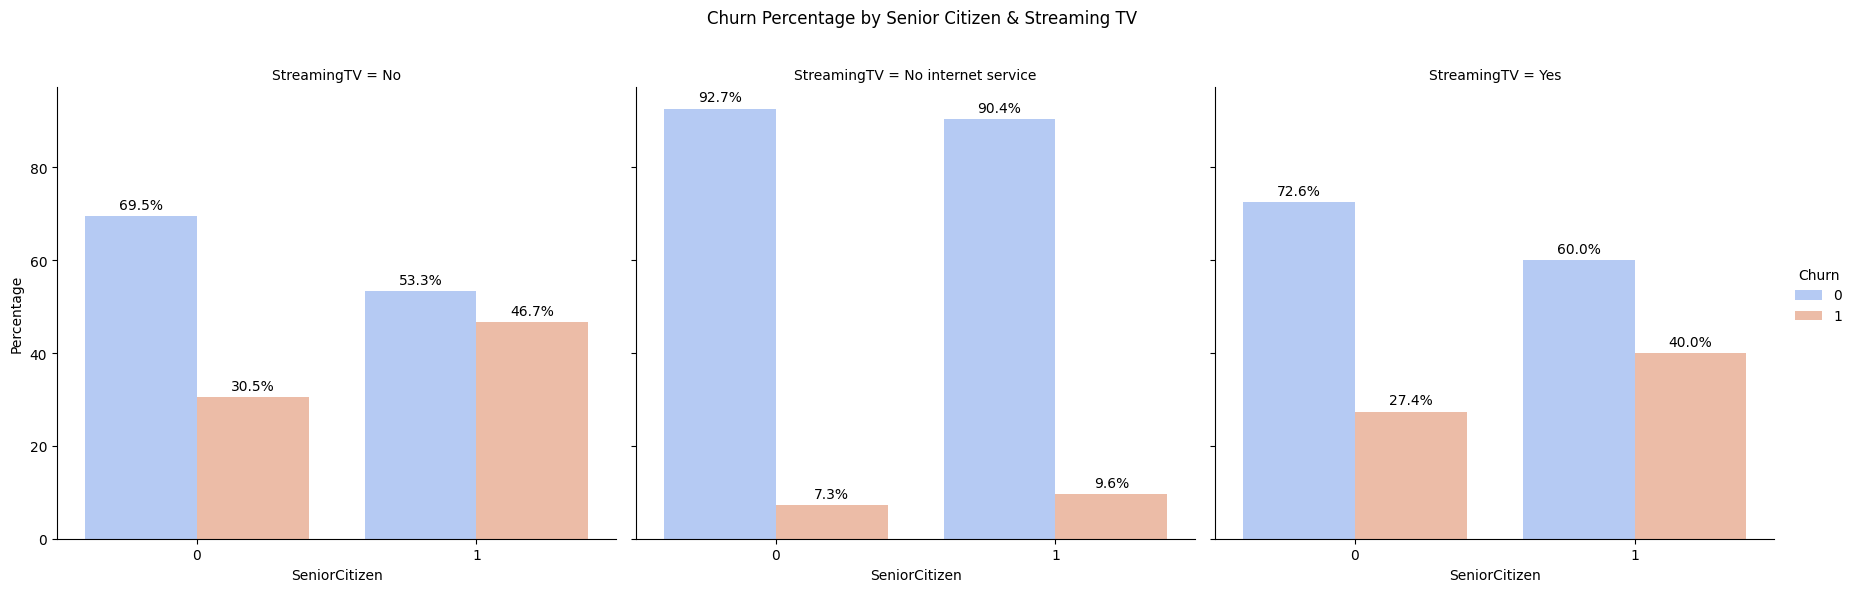

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['StreamingTV', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['StreamingTV', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="StreamingTV",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Senior Citizen & Streaming TV")

plt.show()

### SeniorCitizen vs StreamingMovies

<Figure size 800x600 with 0 Axes>

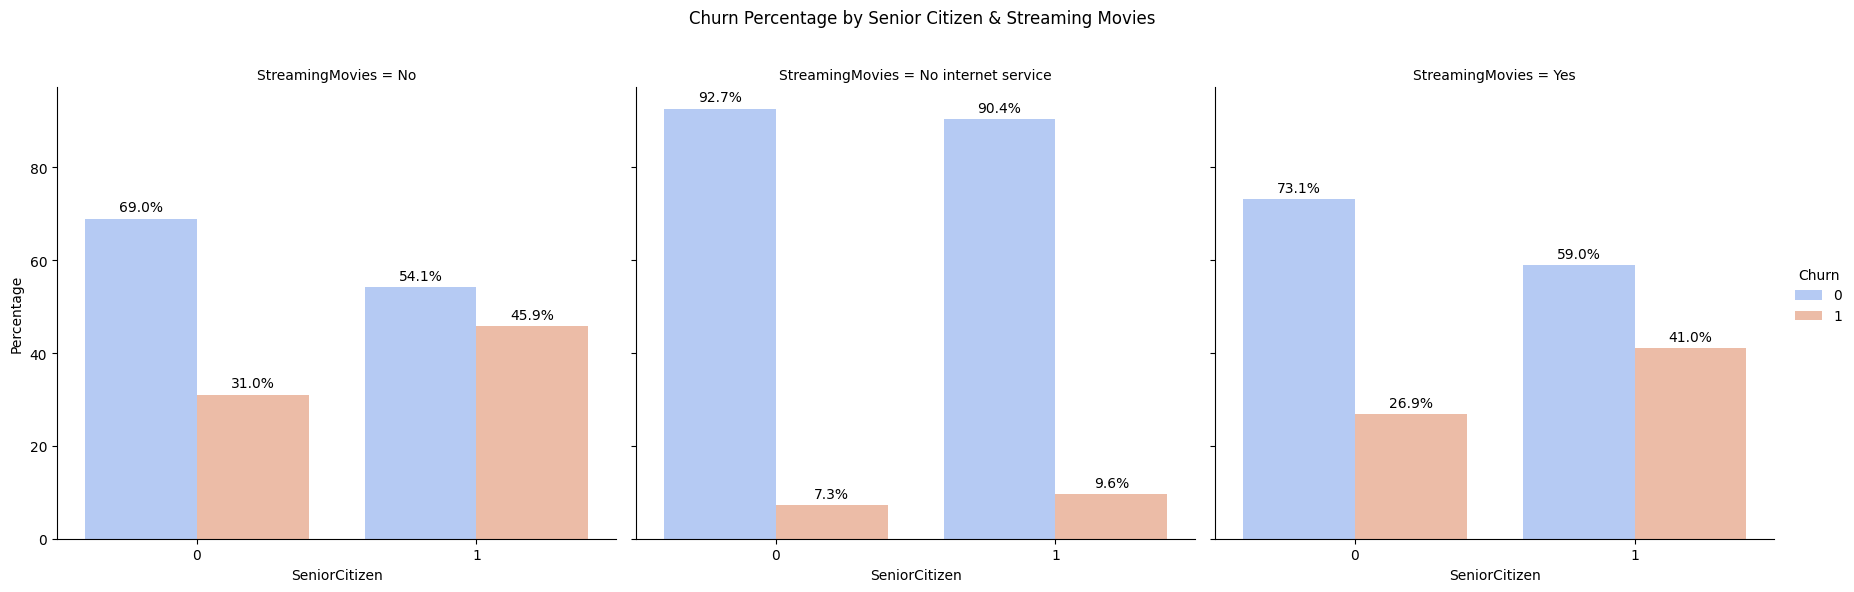

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['StreamingMovies', 'SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['StreamingMovies', 'SeniorCitizen'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="SeniorCitizen",
    y="Percentage",
    hue="Churn",
    col="StreamingMovies",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Senior Citizen & Streaming Movies")

plt.show()

#### Conclusion

- Customers who are SeniorCitizen tend to churn more than Customers who are not SeniorCitizen.
- Additionally, customers who are SeniorCitizen with these criterias are more likely to churn:
      - No phone Service
      - with fiber optic in internet service
      - not use multiple lines because no Phone Service
      - no online Backup
      - no Device Protection
      - No online Security
      - no Tech Support
      - no Streaming TV
      - no Streaming Movies

## Partner

### Partner vs Churn

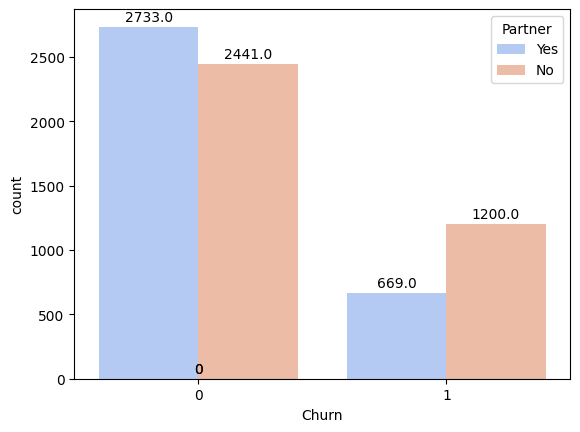

In [ ]:
ax = sns.countplot(x='Churn', hue='Partner', data=df_clean, palette="coolwarm")

# Add bar values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # The value to display
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the annotation
                ha='center', va='bottom',  # Align the text
                fontsize=10,
                xytext=(0, 2),  # Offset the text slightly above the bar
                textcoords='offset points')

plt.show()

### Partner vs PhoneService

<Figure size 800x600 with 0 Axes>

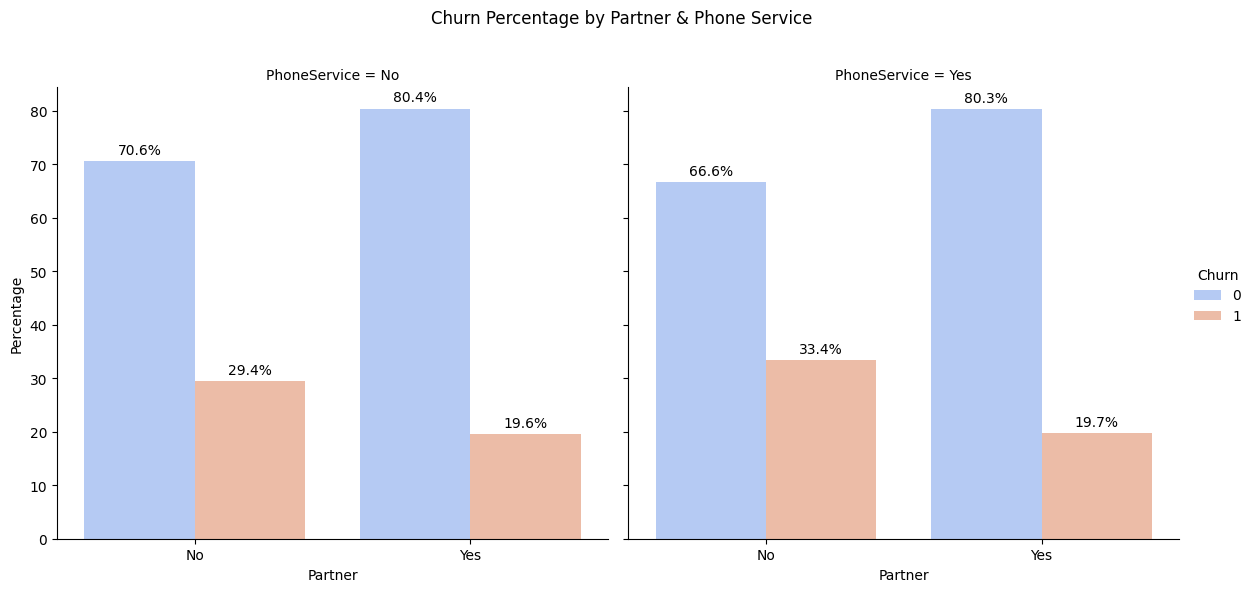

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['PhoneService', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['PhoneService', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="PhoneService",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & Phone Service")

plt.show()

The highest churn group are customers without a partner and with phone service

Customers without a partner may have different spending behaviors and be more flexible in switching providers. Meanwhile, high churn among phone service users could indicate dissatisfaction, pricing concerns, or competitive alternatives.

### Partner vs MultipleLines

<Figure size 800x600 with 0 Axes>

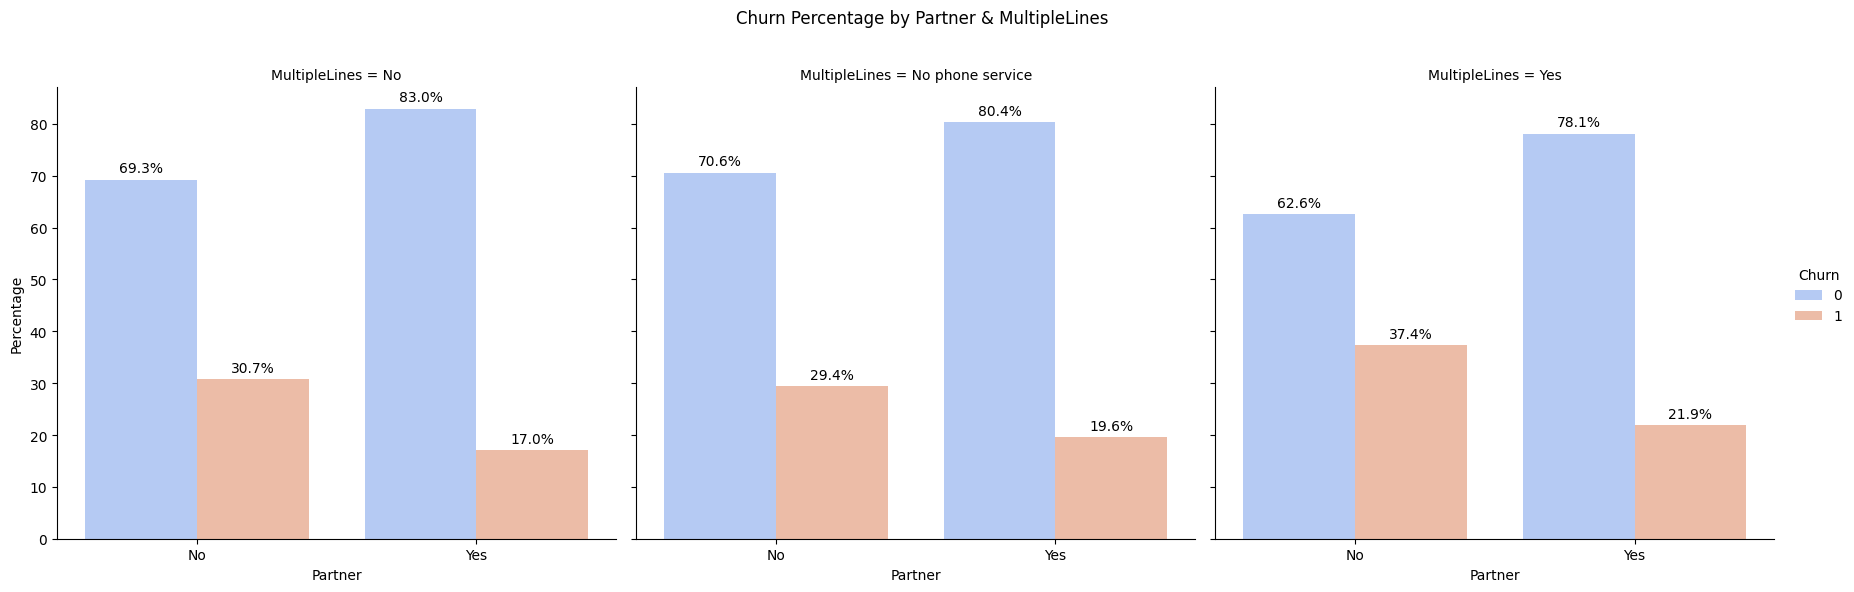

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['MultipleLines', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['MultipleLines', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="MultipleLines",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & MultipleLines")

plt.show()

The highest churn group are customers without a partner and with only 'one' phone lines

 Customers without a partner may have different spending behaviors and be more flexible in switching providers. Meanwhile, .Single-line users may find it easier to switch providers.

### Partner vs InternetService

<Figure size 800x600 with 0 Axes>

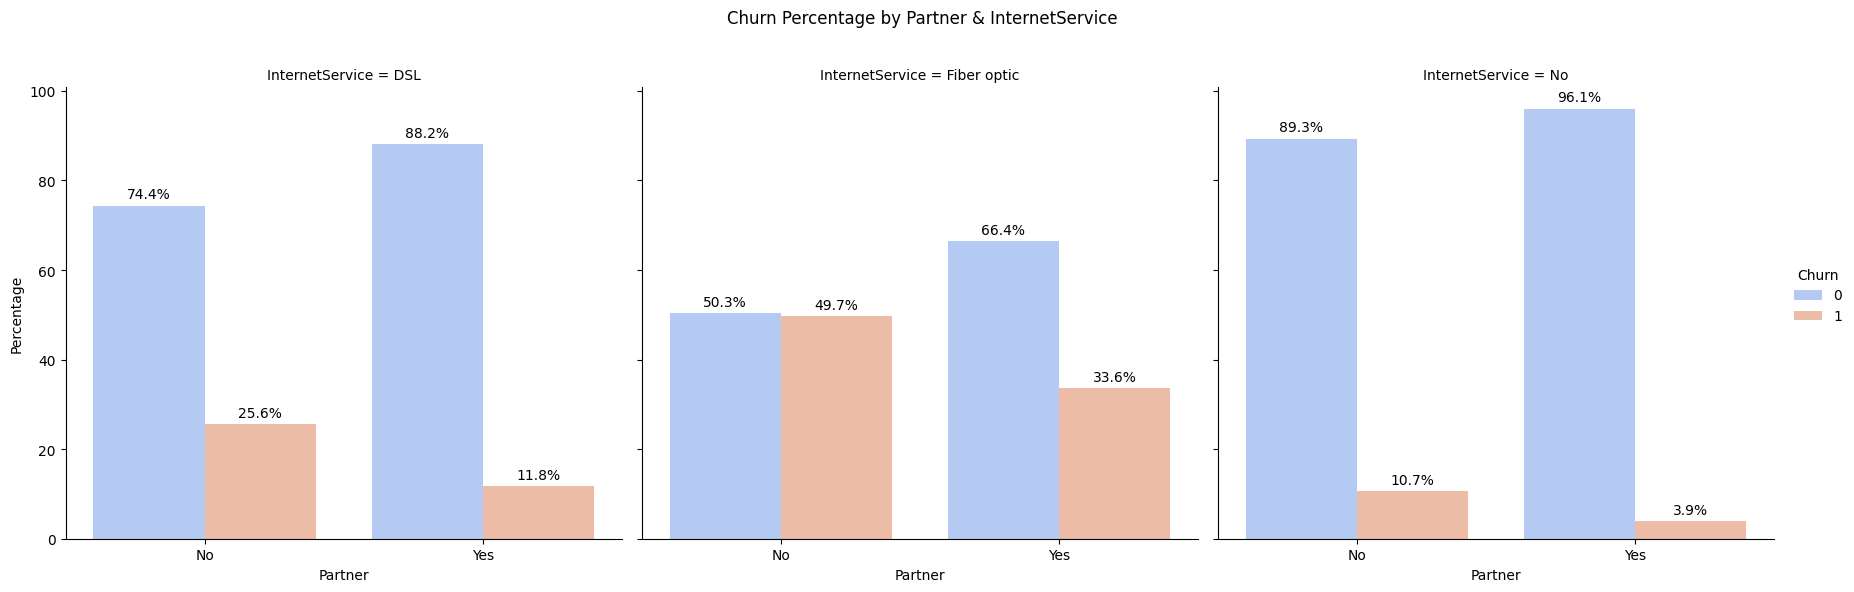

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['InternetService', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['InternetService', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="InternetService",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & InternetService")

plt.show()

the highest churn rate group are customers without partner who use 'FIber Optic' Internet Service. This might because of the service is not satisfying.

### Partner vs OnlineSecurity

<Figure size 800x600 with 0 Axes>

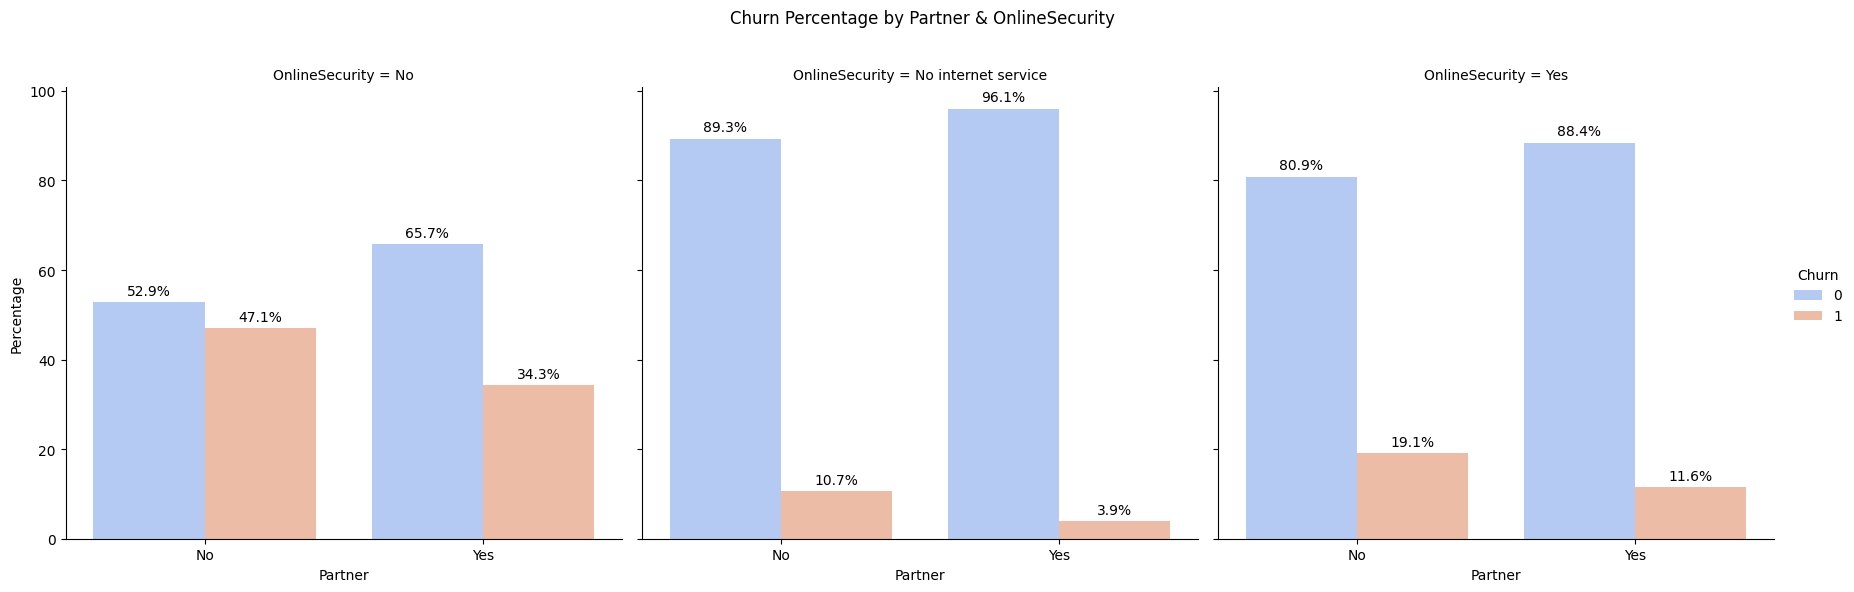

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['OnlineSecurity', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['OnlineSecurity', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="OnlineSecurity",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & OnlineSecurity")

plt.show()

the highest churn rate group are customers without partner and without using 'Online Security' Service.

Customers who don't use online security might find the internet provider risky. Considering offering an online security service might be one of the solutions.

### Partner vs OnlineBackup

<Figure size 800x600 with 0 Axes>

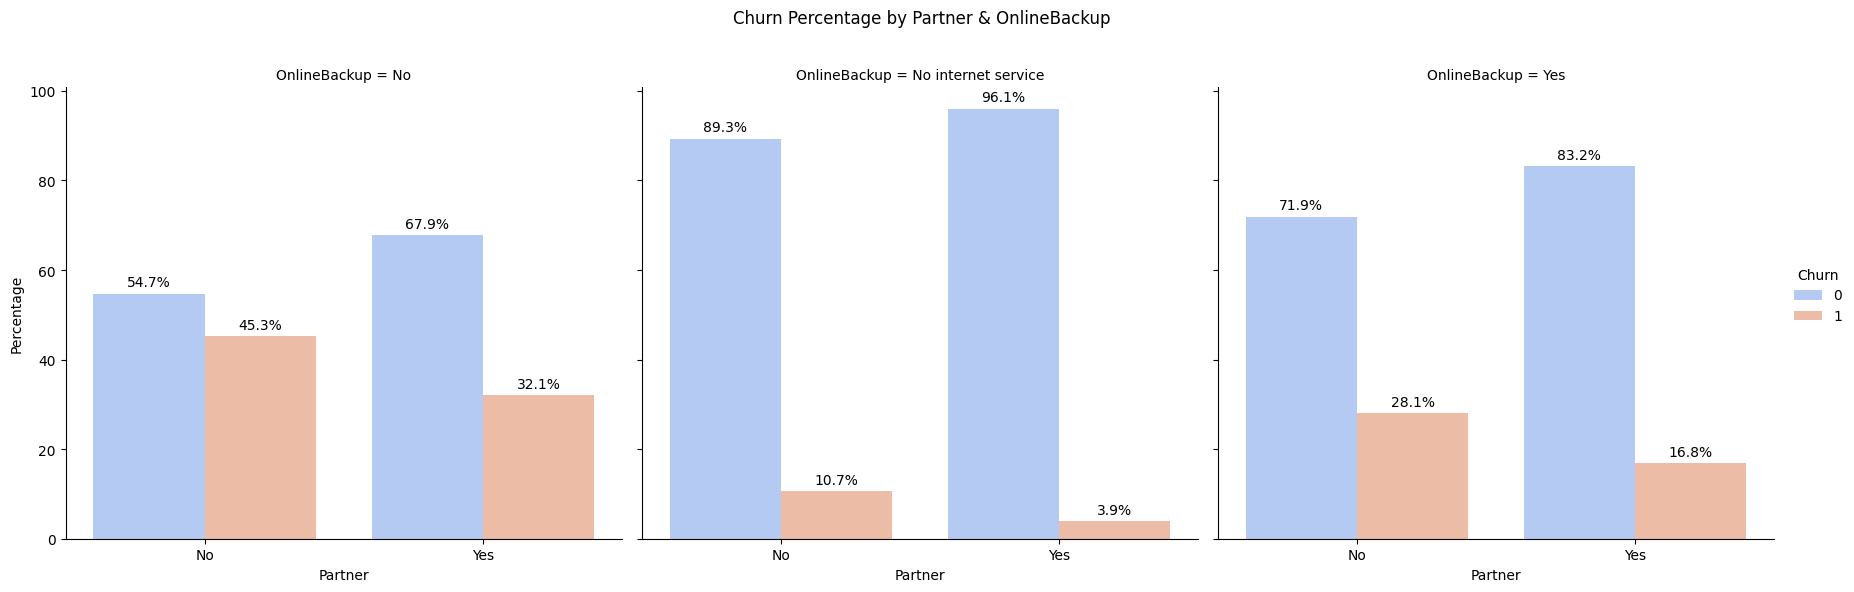

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['OnlineBackup', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['OnlineBackup', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="OnlineBackup",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & OnlineBackup")

plt.show()

the highest churn rate group are customers without partner and without using Online backup.

Customers who don’t use Online Backup might feel their data is at risk because they lack a secure way to store or recover important files. This could lead to concerns about data loss in case of technical issues, making them more likely to switch providers. Offering Online Backup as an added value or bundled service could help improve retention.

### Partner vs DeviceProtection

<Figure size 800x600 with 0 Axes>

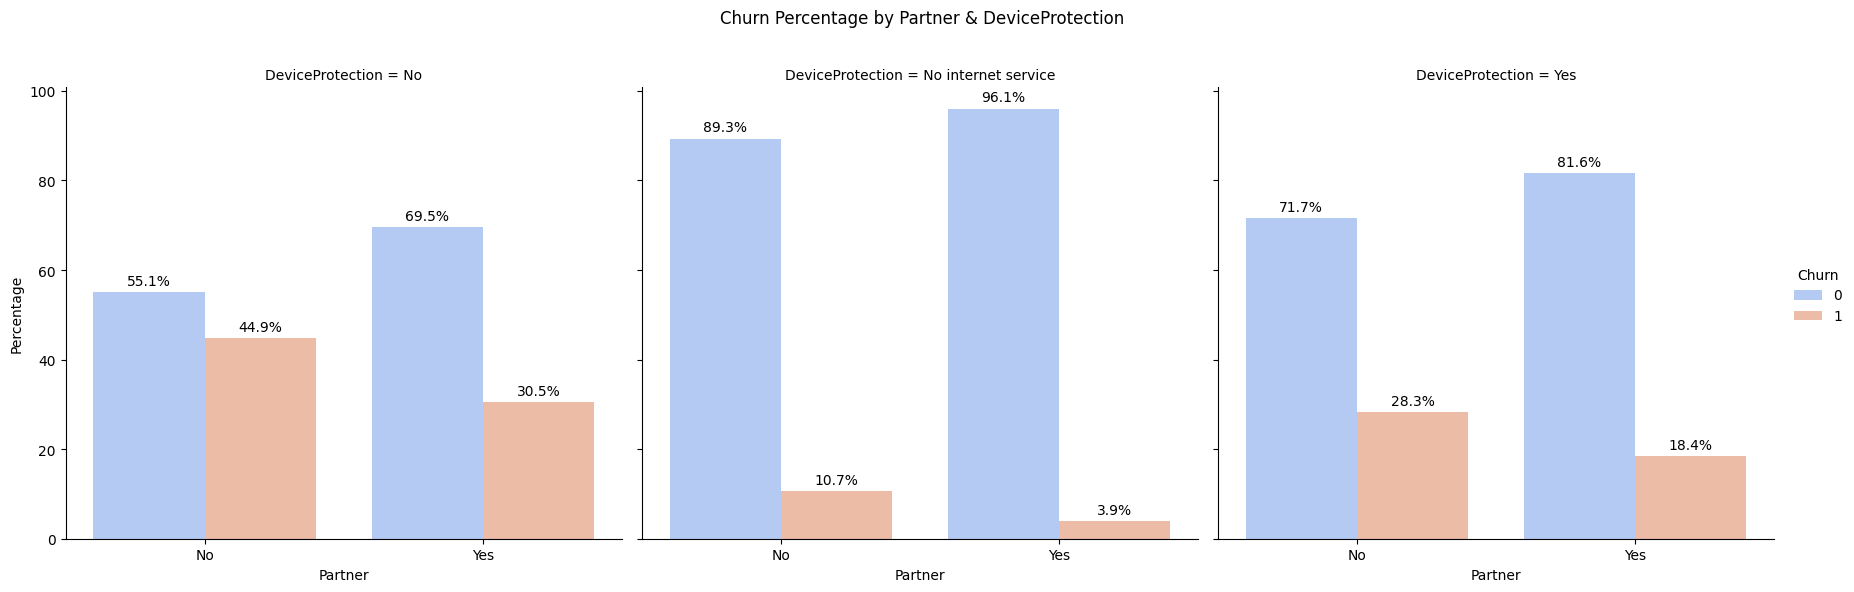

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['DeviceProtection', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['DeviceProtection', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="DeviceProtection",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & DeviceProtection")

plt.show()

the highest churn rate group are customers without partner and without using Device Protection.

Customers who don’t use Device Protection might feel vulnerable to technical issues or hardware damage. This lack of protection could make them more likely to switch providers. Offering Device Protection as an added value or bundled service might help improve retention.

### Partner vs TechSupport

<Figure size 800x600 with 0 Axes>

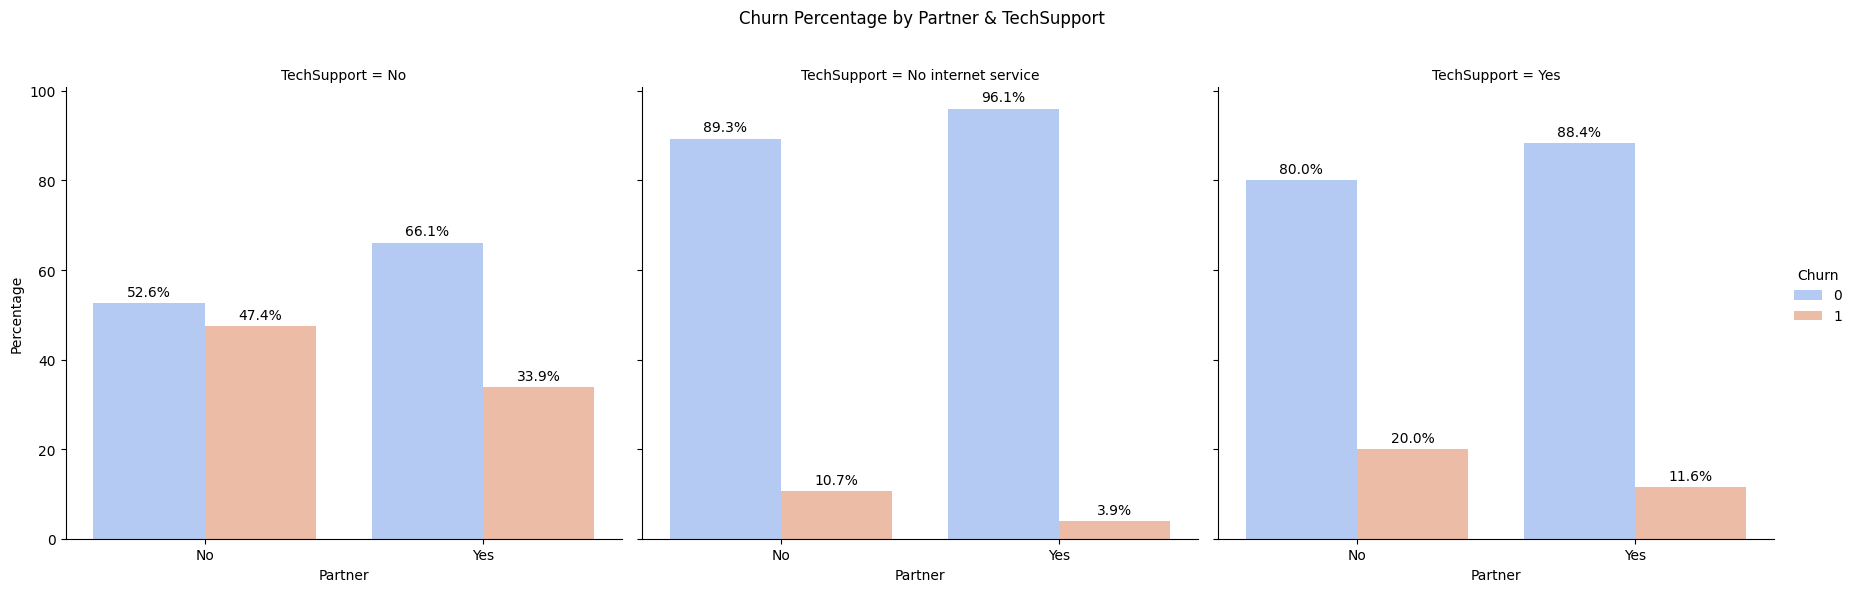

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['TechSupport', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['TechSupport', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="TechSupport",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & TechSupport")

plt.show()

The highest churn rate group are customers without partner and with No Tech Support.

Customers who don’t have Tech Support might struggle with technical issues and lack assistance when facing connectivity problems. This frustration could lead them to switch providers. Offering reliable and accessible Tech Support might help improve retention.

### Partner vs StreamingTV

<Figure size 800x600 with 0 Axes>

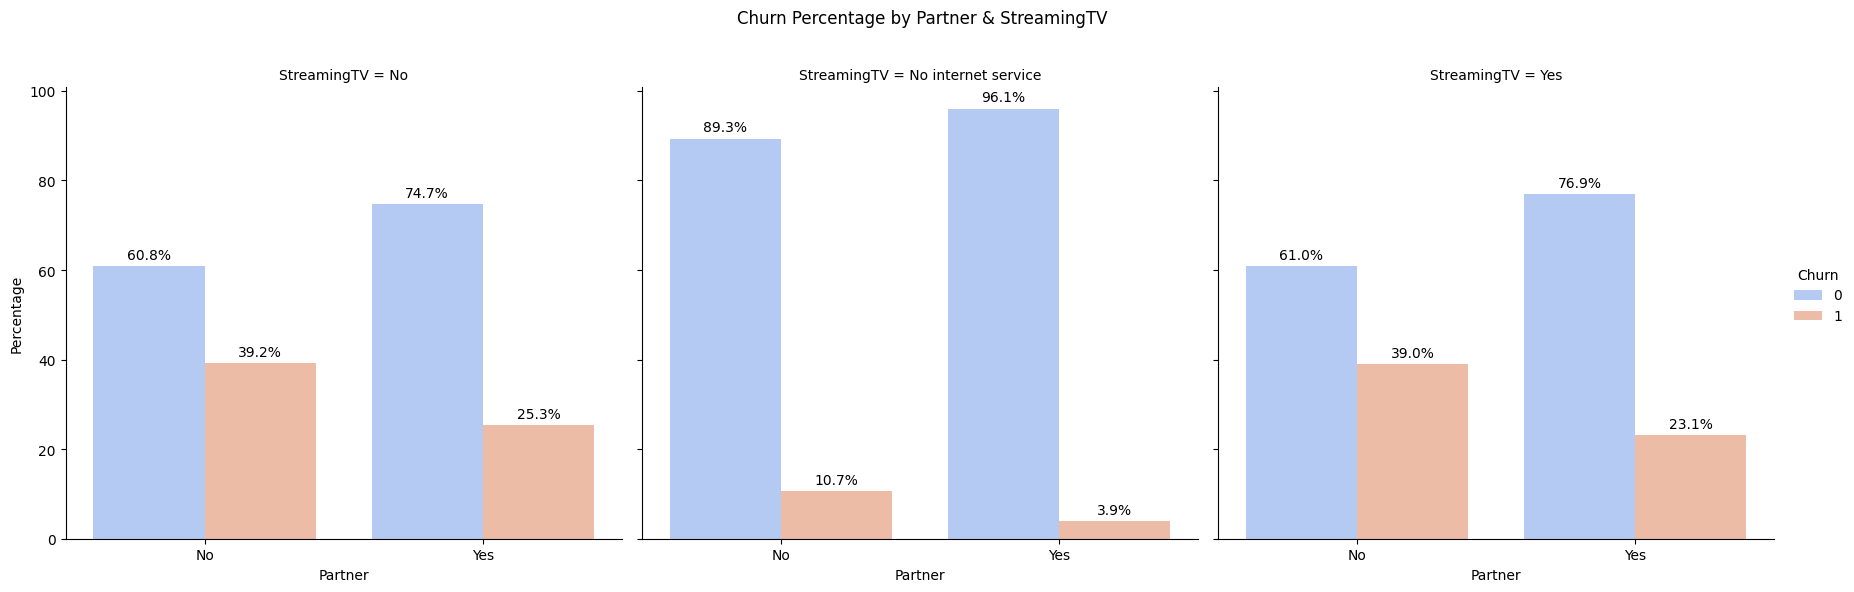

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['StreamingTV', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['StreamingTV', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="StreamingTV",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & StreamingTV")

plt.show()

The highest churn rate group are customers without partner and No Streaming TV.

Customers who don’t have Streaming TV might find the service less entertaining or lacking in value. This could make them more likely to switch to providers that offer better entertainment options. Bundling Streaming TV as an added benefit might help improve retention.

### Partner vs StreamingMovies

<Figure size 800x600 with 0 Axes>

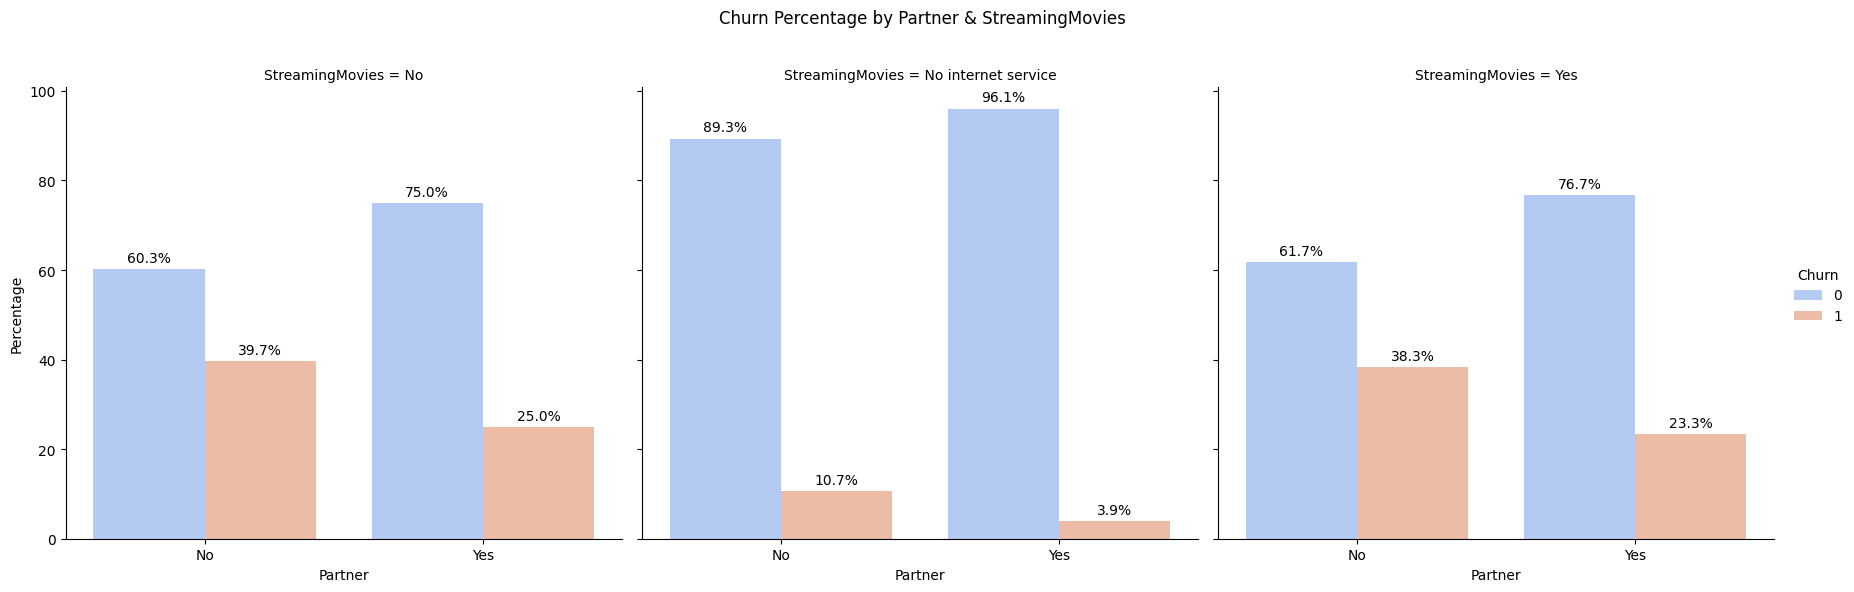

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['StreamingMovies', 'Partner', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['StreamingMovies', 'Partner'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Partner",
    y="Percentage",
    hue="Churn",
    col="StreamingMovies",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Partner & StreamingMovies")

plt.show()

The highest churn rate group are customers without partner and with No Streaming Movies.

Same as streaming TV case, customers who don’t have Streaming Movies might find the service less entertaining or lacking in value.

#### Conclusion for 'Partner' Behavior

- Customers without a partner tend to churn more compared to those with partner.
- Additionally, customers without a partner with these criterias are more likely to churn:
 - with phone service
 - with only 'one' phone line
 - use 'Fiber Optic' Internet Service
 - without using Online Security
 - without using Online backup
 - without using Device Protection
 - with No Tech Support
 - with No Streaming TV
 - with No Streaming Movies


## Dependents

### Dependents vs Churn


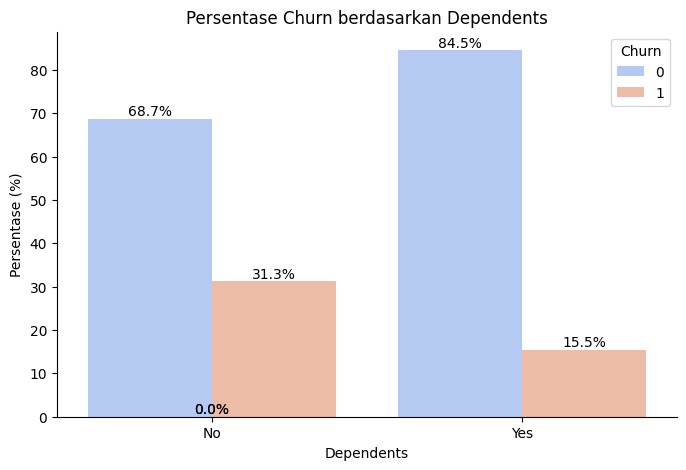

In [ ]:
df_grouped = df_clean.groupby(["Dependents", "Churn"]).size().reset_index(name="Count")

total_per_senior = df_grouped.groupby("Dependents")["Count"].sum().to_dict()

df_grouped["Percentage"] = df_grouped.apply(lambda row: (row["Count"] / total_per_senior[row["Dependents"]]) * 100, axis=1)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_grouped, x="Dependents", y="Percentage", hue="Churn",
                 palette="coolwarm", dodge=True, errorbar=None)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks([0,1], ["No","Yes"])
plt.legend(title="Churn", loc="upper right")
sns.despine(top=True, right=True)

plt.title("Persentase Churn berdasarkan Dependents")
plt.xlabel("Dependents")
plt.ylabel("Persentase (%)")

# Tampilkan plot
plt.show()

### Dependents vs PhoneService


<Figure size 800x600 with 0 Axes>

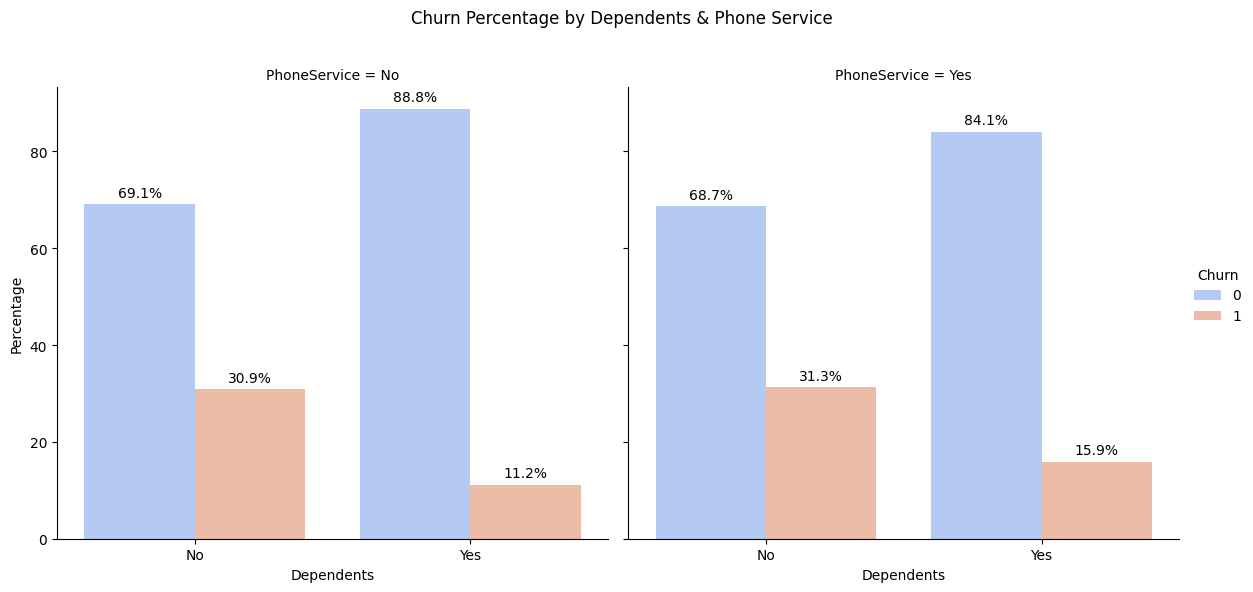

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['PhoneService', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['PhoneService', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="PhoneService",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & Phone Service")

plt.show()

The highest churn rate group are customers without family dependents and who use phone service.

Customers without family dependents may have fewer obligations tying them to a specific provider, making them more likely to switch. Since they use Phone Service, they might be seeking more flexible or cost-effective alternatives. Offering tailored plans or loyalty incentives could help improve retention.

### Dependents vs MultipleLines

<Figure size 800x600 with 0 Axes>

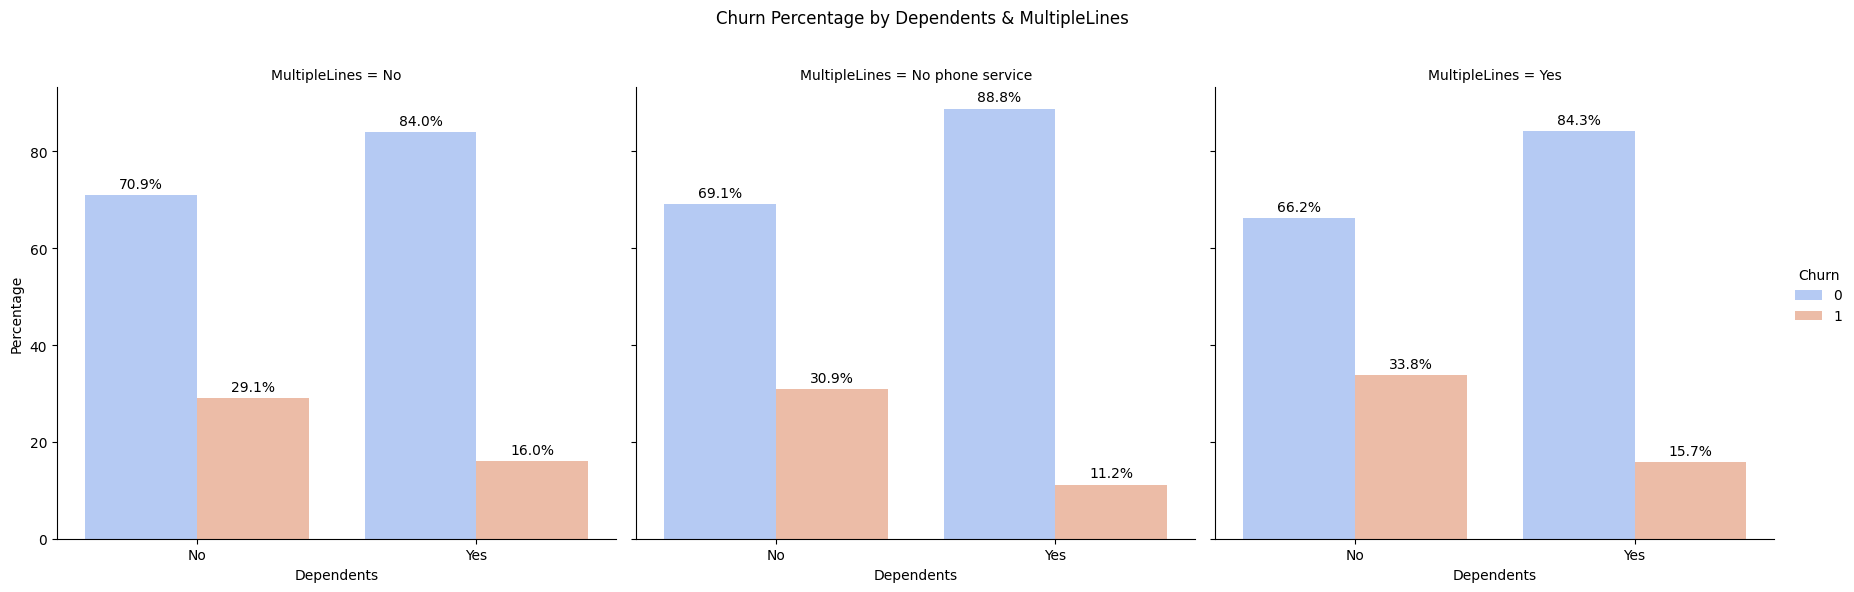

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['MultipleLines', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['MultipleLines', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="MultipleLines",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & MultipleLines")

plt.show()

The highest churn rate group are customers without family dependents and who use multiple phone lines.

Customers without family dependents might not have a strong need for multiple phone lines, making them more likely to reevaluate their expenses and switch providers. Offering flexible plans or discounts for multiple lines could help improve retention.

### Dependents vs InternetService


<Figure size 800x600 with 0 Axes>

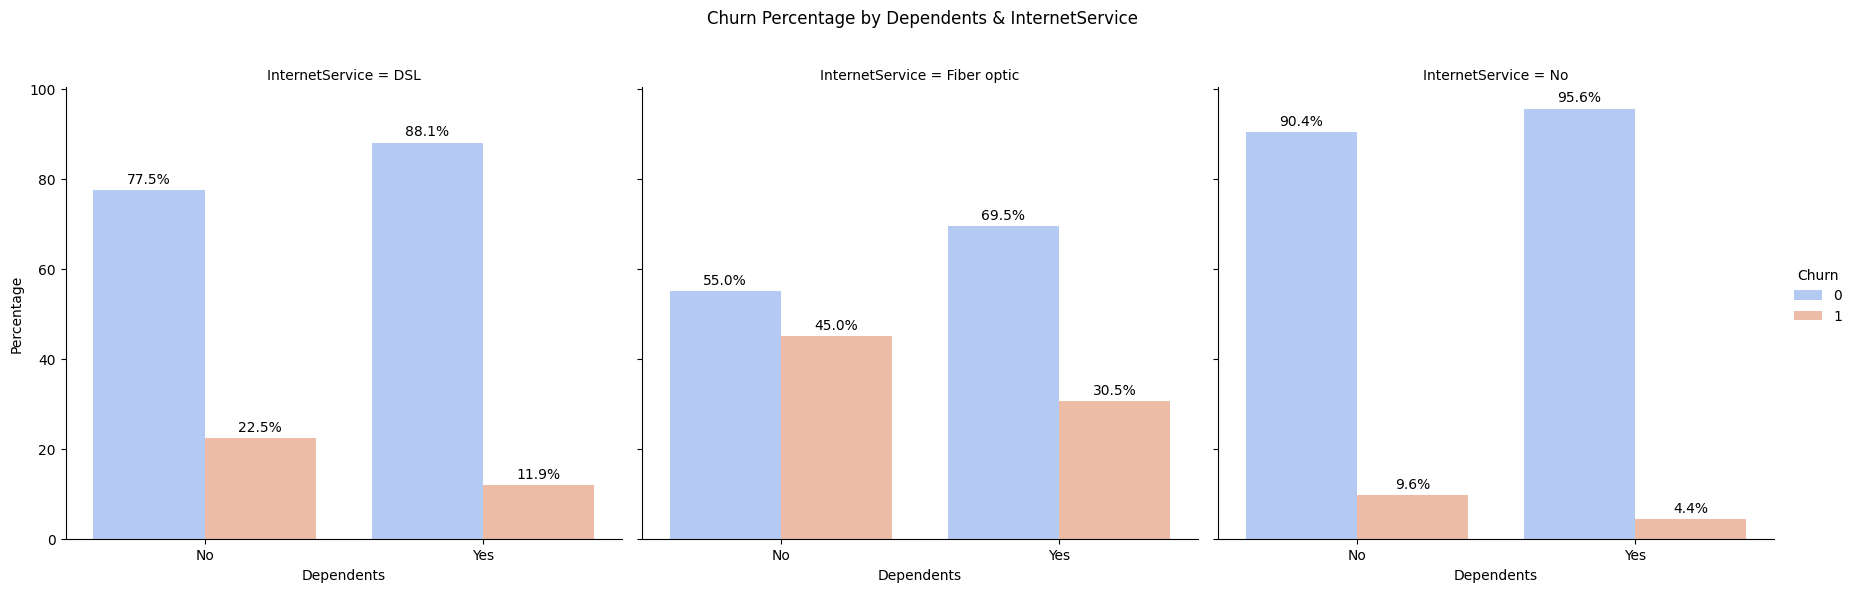

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['InternetService', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['InternetService', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="InternetService",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & InternetService")

plt.show()

The highest churn rate group are customers without family dependents and who use fiber optic internet Service.

Customers without family dependents might be more cost-sensitive and willing to switch providers if they find Fiber Optic service too expensive or unnecessary for their needs. Ensuring competitive pricing, better service quality, or bundling additional benefits could help improve retention.

### Dependents vs OnlineSecurity

<Figure size 800x600 with 0 Axes>

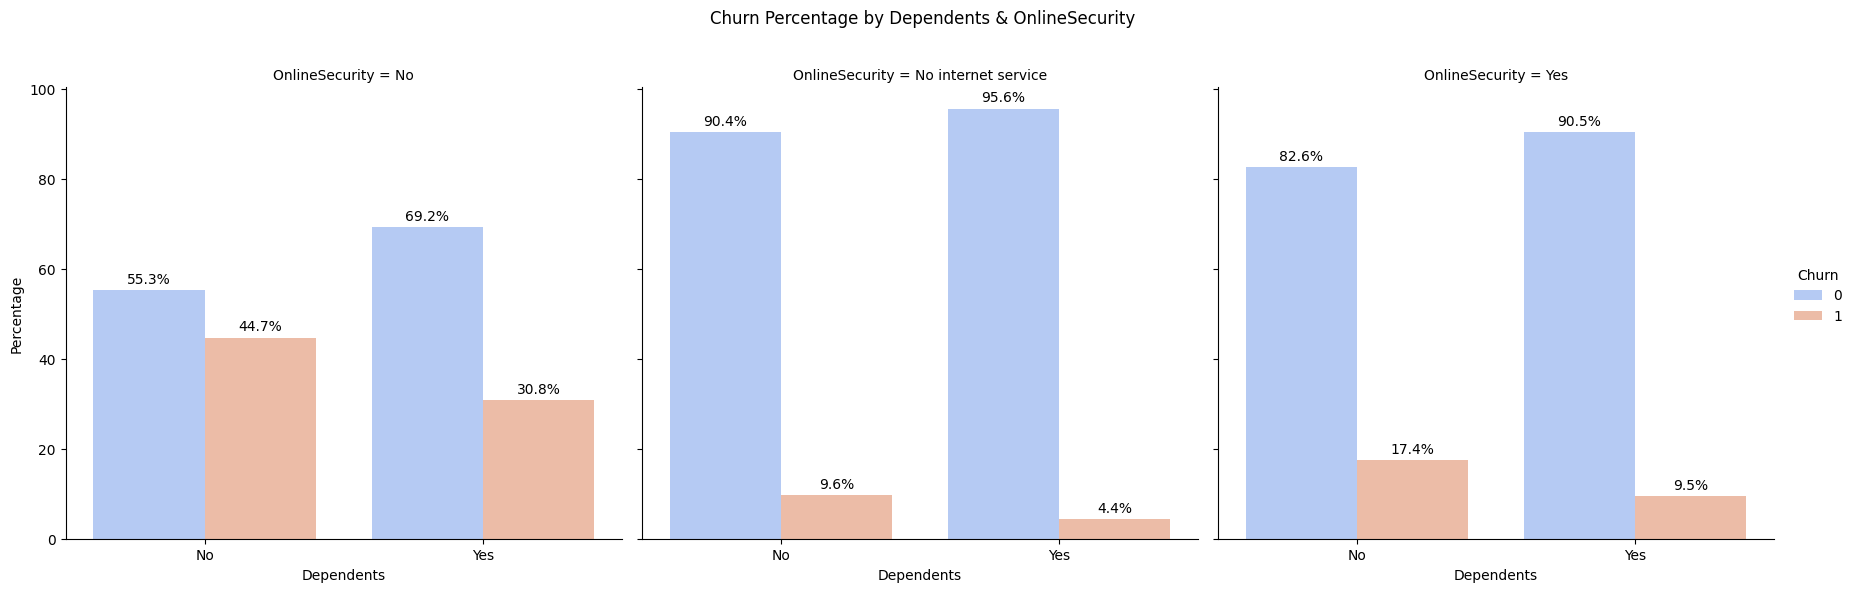

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['OnlineSecurity', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['OnlineSecurity', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="OnlineSecurity",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & OnlineSecurity")

plt.show()

The highest churn rate group are customers without family dependents and without using Online Security.

Customers without family dependents might not prioritize security services, but this could lead to concerns about data safety or internet risks. This lack of online protection could make them more likely to switch providers. Offering Online Security as part of the service could increase retention by addressing these concerns.

### Dependents vs OnlineBackup

<Figure size 800x600 with 0 Axes>

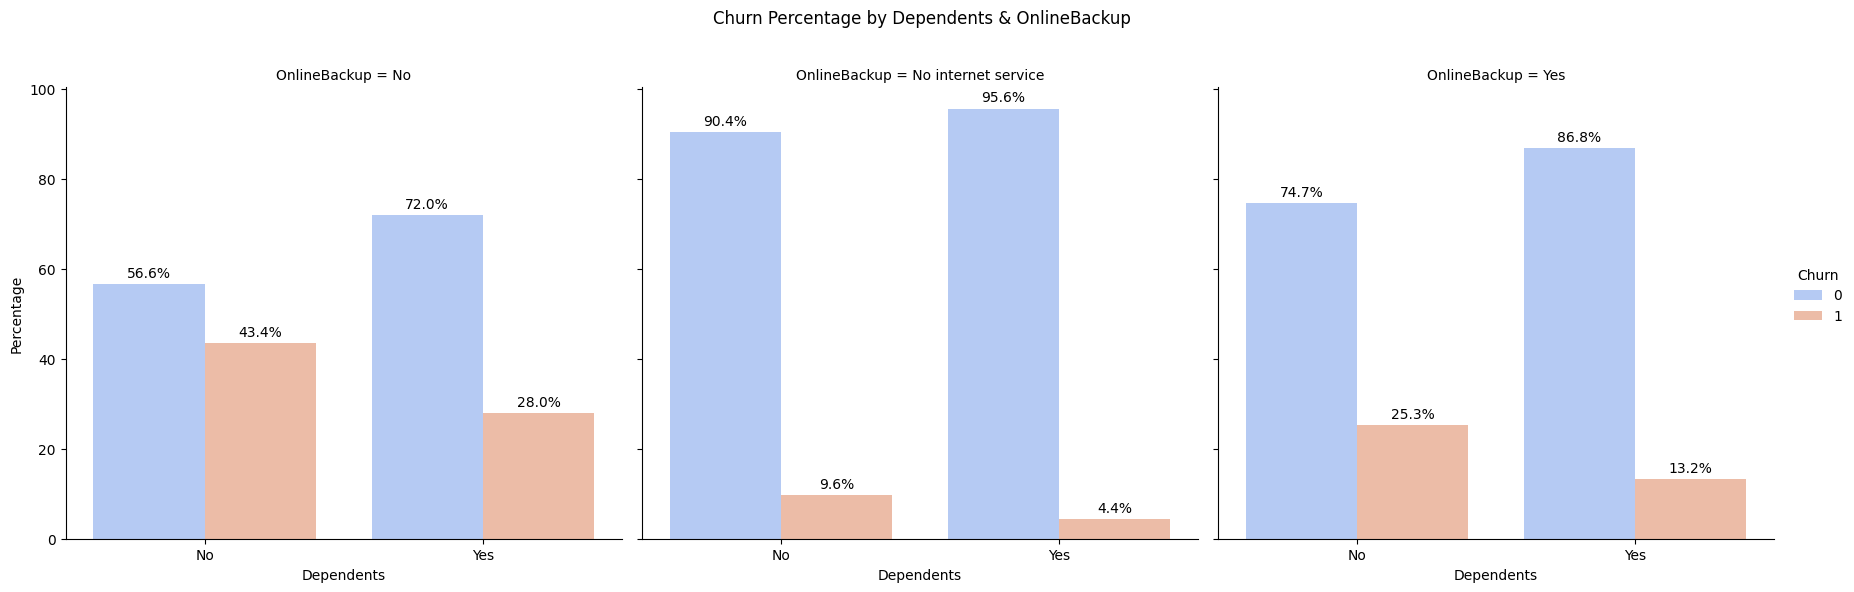

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['OnlineBackup', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['OnlineBackup', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="OnlineBackup",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & OnlineBackup")

plt.show()

The highest churn rate group are customers without family dependents and without using Online Backup.

Customers without family dependents might not see the immediate need for Online Backup, but the lack of data protection could make them feel vulnerable to potential data loss. This could lead them to switch providers in search of more secure options. Offering Online Backup as a bundled feature or an optional add-on could help improve retention.

### Dependents vs DeviceProtection

<Figure size 800x600 with 0 Axes>

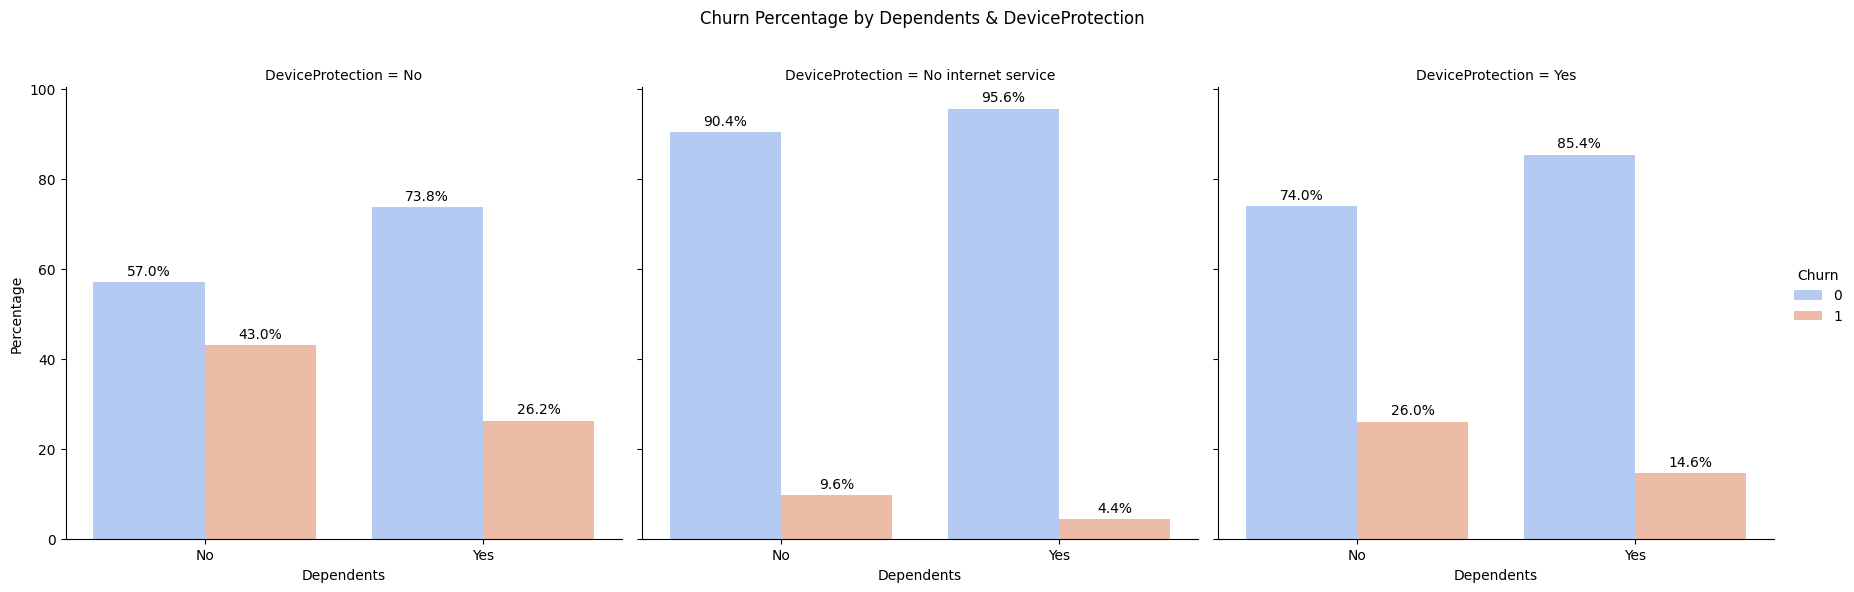

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['DeviceProtection', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['DeviceProtection', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="DeviceProtection",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & DeviceProtection")

plt.show()

The highest churn rate group are customers without family dependents and without using Device protection.

Customers without family dependents might not prioritize Device Protection, but the risk of device damage or technical issues could make them reconsider their provider. The absence of protection might lead them to switch to competitors offering better security. Providing Device Protection as a bundled feature or an optional add-on could help improve retention.

### Dependents vs TechSupport


<Figure size 800x600 with 0 Axes>

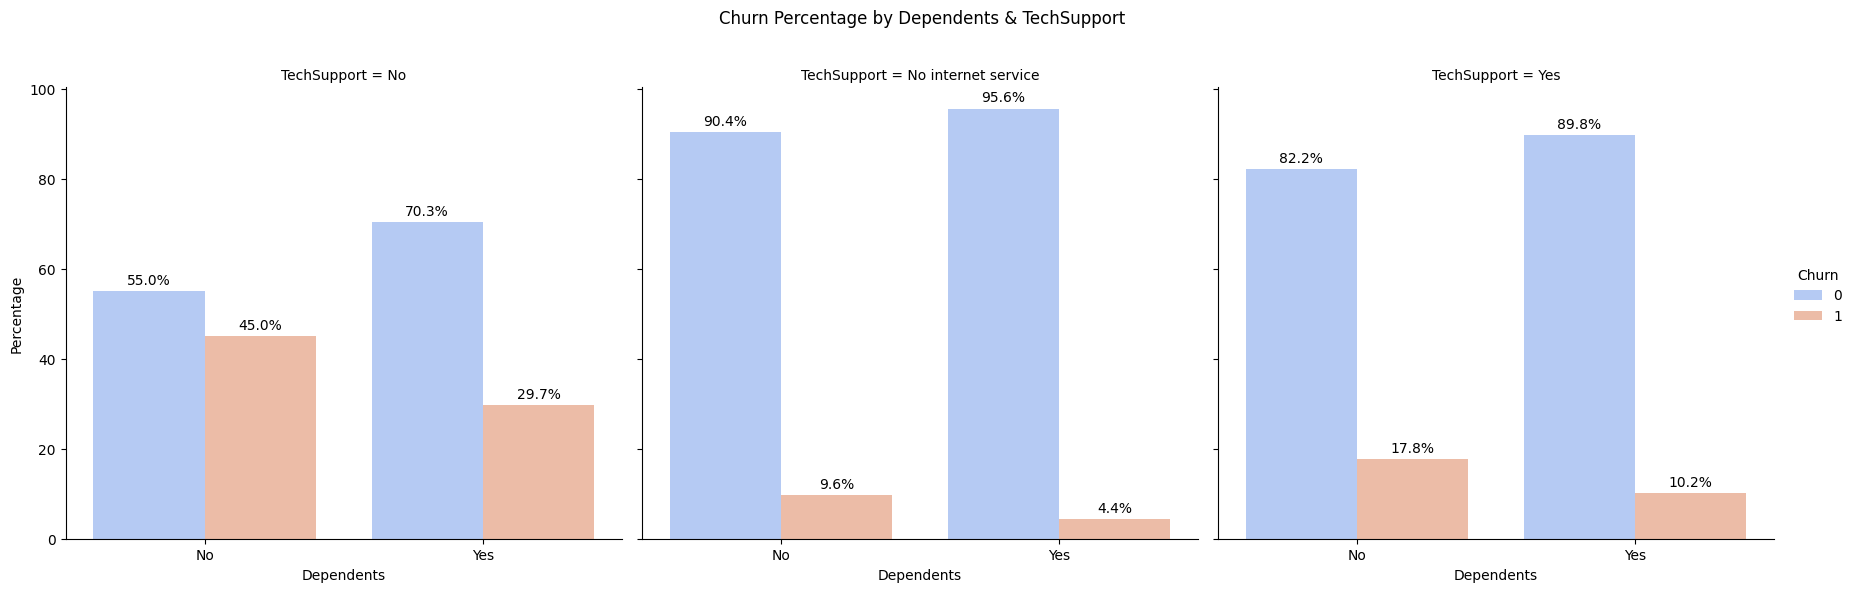

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['TechSupport', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['TechSupport', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="TechSupport",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & TechSupport")

plt.show()

The highest churn rate group are customers without family dependents and with No Tech Support.

Customers without family dependents might rely on self-service solutions, but the lack of Tech Support could leave them frustrated when facing technical issues. This could lead them to switch providers in search of better customer service. Offering accessible and responsive Tech Support could help improve retention.

### Dependents vs StreamingTV

<Figure size 800x600 with 0 Axes>

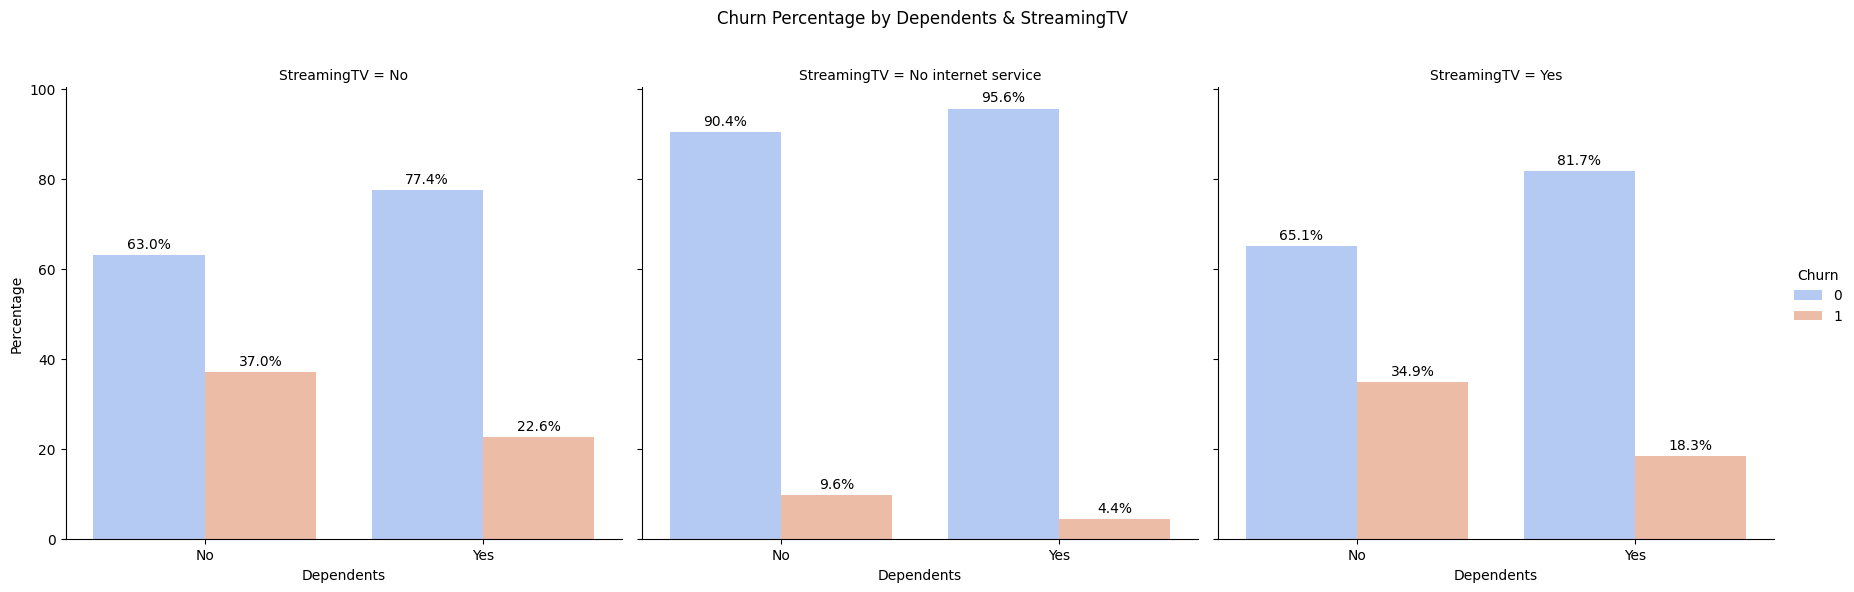

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['StreamingTV', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['StreamingTV', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="StreamingTV",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & StreamingTV")

plt.show()

The highest churn rate group are customers without family dependents and with No Streaming TV.

Customers without family dependents might have different entertainment preferences, but the lack of Streaming TV could make the service feel less valuable to them. This could lead them to switch providers for better entertainment options. Offering bundled Streaming TV services or personalized content recommendations could help improve retention.

### Dependents vs Streaming Movies



<Figure size 800x600 with 0 Axes>

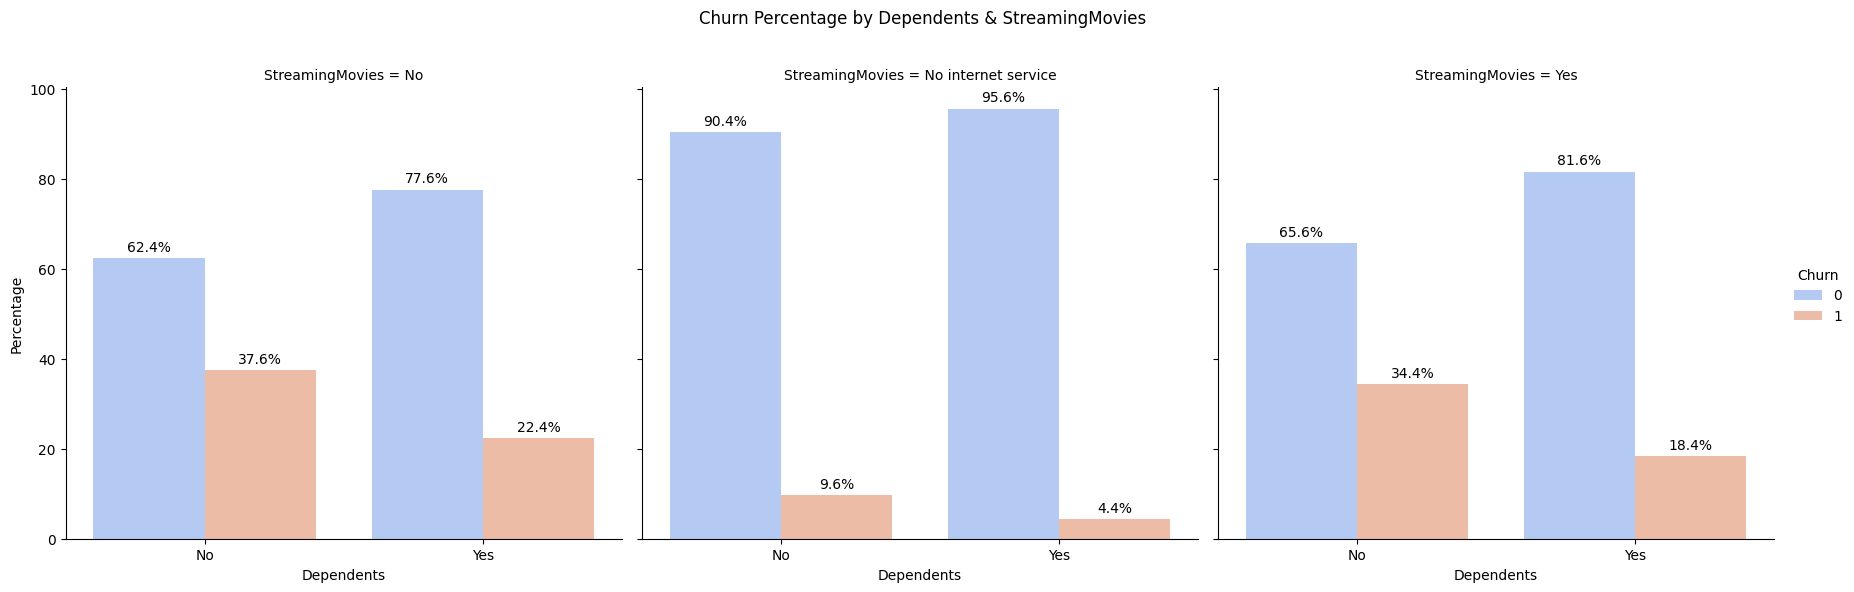

In [ ]:
df['Churn'] = df['Churn'].astype(str)

plt.figure(figsize=(8, 6))

# Create grouped bar chart
grouped = df.groupby(['StreamingMovies', 'Dependents', 'Churn']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['StreamingMovies', 'Dependents'])['Count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Dependents",
    y="Percentage",
    hue="Churn",
    col="StreamingMovies",
    palette="coolwarm",
    height=6,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

plt.subplots_adjust(top=0.85)
plt.suptitle("Churn Percentage by Dependents & StreamingMovies")

plt.show()

The highest churn rate group are customers without family dependents and with No Streaming TV.

Same as Streaming Movies, without this feature, customers will feel lack of entertainment that will lead to churn.

#### Conclusion for 'Dependents' Behavior

- Customers without family dependents tend to churn more compared to those with family dependents.
- Additionally, customers without family dependents with these criterias are more likely to churn:
 - with phone service
 - with multiple phone lines
 - use 'Fiber Optic' Internet Service
 - without using Online Security
 - without using Online backup
 - without using Device Protection
 - with No Tech Support
 - with No Streaming TV
 - with No Streaming Movies

# MACHINE LEARNING

## Splitting the Dataset

Train-Test Split is Machine Learning
Techniques for Splitting a Dataset into Two Parts:

1. `Training Set`: Used to train the model so it can recognize patterns in the data.
2. `Test Set`: Used to evaluate the model's performance after training, ensuring it performs well on new, unseen data.

we are using scikit-learn function to splitting the data and here are the explanation of Parameters:
- **test_size**: The percentage of data used for testing.
test_size=0.4 means 40% of the data is used for testing, and 60% is used for training.
- **Train-Test Split Proportions:**
    - 80:20 → Suitable for medium to large datasets.

    - 60:40 → Used for small datasets or when more test data is needed for better evaluation.

- **random_state:** Ensures the same data split each time the code is executed.

- **stratify=y,** Maintains the proportion of labels in both training and testing sets to ensure balanced data distribution.













In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=["Churn", "customerID"])
y = df_clean["Churn"]

#80% training & 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#60% training & 40% testing
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Check the shapes to confirm the splits
X_train_80.shape, X_test_20.shape, y_train_80.shape, y_test_20.shape
X_train_60.shape, X_test_40.shape, y_train_60.shape, y_test_40.shape

((4225, 19), (2818, 19), (4225,), (2818,))

## Data Preprocessing

Encoding

We will convert categorical features into numerical representations using certain techniques based on the data.

`Reason:`
It's because some Machine learning models (like Logistic Regression, Random Forest, or Neural Networks) can’t understand text (only work with numerical data).So, we need` convert categorical data into numerical form so the model can process it.

There are 2 types encoding will be used here:

Label Encoding: when the data is binary categorical data (for example Yes/No, 1/0)

- Gender
- Churn
- Partner
- Dependents  
- PhoneService
- PaperlessBilling

One Hot Encoding: when the categorical data has more than 2 unique values and no ordinal data (considered as nominal data)
- MultipleLines
- InternetService
- OnlineSecurity  
- OnlineBackup  
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaymentMethod


Feature Scaling

Feature scaling makes sure all numbers in the dataset are on a similar range, so the machine learning model works better. Without it, bigger numbers can overpower smaller ones, causing bias results.

`Note:`

Feature scaling is only applied to numerical features and some encoding categorical data. for example:
- ordinal encoding (e.g., Contract Type: 1=Month-to-Month, 2=One-Year, 3=Two-Year) --> this scaling may be needed if the numerical difference impacts the model.

There are 3 numerical column in our data that need to be scaled:
- MonthlyCharges
- TotalCharges
- Tenure.

We will use `MiNMaxScaling`Method because:
- we want to scale our data to fixed range, typically [0,1], without changing their original distribution.
-we want to avoid negative value and our numerical data are not normally distributed, so we can't use Standar Scaling


### Pipeline for preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder

In [ ]:
label_encoding_features = ["gender", "Partner","Dependents","PhoneService","PaperlessBilling"]

one_hot_features = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]

numerical_features = ["tenure","MonthlyCharges", "TotalCharges"]

#creating pipeling for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(drop='first'), one_hot_features),
        ('label',  OrdinalEncoder(), label_encoding_features)])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaymentMethod']),
                                ('label', OrdinalEncoder(),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'PaperlessBilling'])])

## Model Benchmarking

here are the models we select for benchmarking:
- Logistic Regression: A widely used baseline model that offers interpretable results and can handle imbalanced datasets effectively.

- Decision Tree: Captures non-linear relationships and provides clear insights into decision-making processes, aiding in understanding churn factors.

- Random Forest: An ensemble method that reduces overfitting and improves generalization by aggregating multiple decision trees, leading to more robust predictions.

- XGBoost: A high-performance gradient boosting algorithm known for its efficiency and accuracy in handling large datasets and complex patterns.

- LGBM: A gradient boosting framework that is optimized for speed and performance, especially with large datasets, while maintaining high accuracy.

- K-Nearest Neighbors: A non-parametric method that classifies based on the closest training examples, useful for capturing local patterns in the data.

the chosen model is benchmarked from 'Customer churn prediction model based on hybrid neural networks' scientific research (link: https://pmc.ncbi.nlm.nih.gov/articles/PMC11680688/)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [ ]:
logreg = LogisticRegression(random_state=2020)
dtc = DecisionTreeClassifier(random_state=2020)
rfc = RandomForestClassifier(random_state=2020)
xgb = XGBClassifier(random_state=2020)
lgbm = LGBMClassifier(random_state=2020)
knc = KNeighborsClassifier()

In [ ]:
models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "XGBoost": xgb,
    "LGBM": lgbm,
    "KNN": knc
}

### Simple Model Benchmarking

In [ ]:
# Fit and transform training data for 60-40 split
preprocessor.fit(X_train_60)
X_train_60_transformed = preprocessor.transform(X_train_60)
X_test_40_transformed = preprocessor.transform(X_test_40)

# Fit and transform training data for 80-20 split
preprocessor.fit(X_train_80)
X_train_80_transformed = preprocessor.transform(X_train_80)
X_test_20_transformed = preprocessor.transform(X_test_20)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

def evaluate_models(X_train, X_test, y_train, y_test, split_name):
    print(f"\n{'='*20} {split_name} Split {'='*20}\n")

    # Reset index for X_train and X_test
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    # Apply the preprocessor to the data
    X_train_transformed = preprocessor.transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    for name, model in models.items():
        # Stratified K-Fold Cross-Validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=skf, scoring='recall')

        # Fit the model on the transformed training data
        model.fit(X_train_transformed, y_train)

        # Predictions for both Train and Test sets
        y_train_pred = model.predict(X_train_transformed)
        y_test_pred = model.predict(X_test_transformed)

        print(f"\n{name} Performance on Training Set ({split_name} Split):")
        print(classification_report(y_train, y_train_pred))

        print(f"\n{name} Performance on Test Set ({split_name} Split):")
        print(classification_report(y_test, y_test_pred))

        # Print Cross-Validation Results
        print(f"\n{name} Stratified K-Fold Cross-Validation Recall Scores ({split_name} Split):")
        print(cv_scores)
        print(f"Mean Recall: {cv_scores.mean():.4f}")
        print("=" * 60)

# Evaluate models on 80-20 split
evaluate_models(X_train_80, X_test_20, y_train_80, y_test_20, "80-20")

# Evaluate models on 60-40 split
evaluate_models(X_train_60, X_test_40, y_train_60, y_test_40, "60-40")


==================== 80-20 Split ====================


Logistic Regression Performance on Training Set (80-20 Split):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.66      0.55      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.75      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634


Logistic Regression Performance on Test Set (80-20 Split):
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Logistic Regression Stratified K-Fold Cross-Validation Recall Scores (80-20 Split):
[0.53511706 0.5083612  0.54180602 0.61538462 0.51839465]
Mean Recall: 0.5438

Dec

### Oversampling method comparison

In [ ]:
#churn percentage
df.Churn.value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


Since our data are imbalanced, we need to use oversampling to ensure that the model learns effectively from both the majority and minority classes. Imbalanced datasets often lead to models that are biased toward the majority class, resulting in poor performance on the minority class (e.g., failing to identify churn customers). Oversampling addresses this issue by increasing the representation of the minority class in the training data, allowing the model to better capture patterns and relationships that are critical for accurate predictions.

In [ ]:
# Model Oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
import pandas as pd

ros = RandomOverSampler(random_state=17)
smote = SMOTE(random_state=17)
adasyn = ADASYN(random_state=17)
bsmote = BorderlineSMOTE(random_state=17)
kmeans_smote = KMeansSMOTE(random_state=17)
svm_smote = SVMSMOTE(random_state=17)

oversm = [ros, adasyn, smote, bsmote, kmeans_smote, svm_smote]
oversm_names = ['Random Over Sampler','SMOTE','ADASYN', 'BorderlineSMOTE', 'KMeansSMOTE', 'SVMSMOTE']

In [ ]:
# Fit and transform training data for 60-40 split
preprocessor.fit(X_train_60)
X_train_60_transformed = preprocessor.transform(X_train_60)
X_test_40_transformed = preprocessor.transform(X_test_40)

# Fit and transform training data for 80-20 split
preprocessor.fit(X_train_80)
X_train_80_transformed = preprocessor.transform(X_train_80)
X_test_20_transformed = preprocessor.transform(X_test_20)

In [ ]:
from sklearn.metrics import fbeta_score

# Function to evaluate models for a given split
def evaluate_split(X_train, y_train, X_test, y_test, split_name):
    recall_results = []
    f2_results = []

    # Loop through each oversampling method and model
    for oversampler, oversampler_name in zip(oversm, oversm_names):
        for model_name, model in models.items():
            try:
                # Create a pipeline for the model
                pipe = Pipeline([
                    ('Model', model)])

                # Perform oversampling
                X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
                pipe.fit(X_resampled, y_resampled)
                y_pred = pipe.predict(X_test)

                recall_score_value = round(recall_score(y_test, y_pred) * 100, 2)
                recall_results.append((model_name, oversampler_name, recall_score_value))

                f2_score_value = round(fbeta_score(y_test, y_pred, beta=2) * 100, 2)
                f2_results.append((model_name, oversampler_name, f2_score_value))

            except Exception as e:
                print(f"Error with {oversampler_name} for model {model_name}: {e}")
                recall_results.append((model_name, oversampler_name, None))
                f2_results.append((model_name, oversampler_name, None))

    # Create DataFrames to display results
    recall_results_df = pd.DataFrame(recall_results, columns=['Model', 'Oversampling Method', 'Recall'])
    f2_results_df = pd.DataFrame(f2_results, columns=['Model', 'Oversampling Method', 'F2 Score'])

    # Add split name for comparison
    recall_results_df['Split'] = split_name
    f2_results_df['Split'] = split_name

    return recall_results_df, f2_results_df


recall_results_80_20, f2_results_80_20 = evaluate_split(X_train_80_transformed, y_train_80, X_test_20_transformed, y_test_20, "80-20")
recall_results_60_40, f2_results_60_40 = evaluate_split(X_train_60_transformed, y_train_60, X_test_40_transformed, y_test_40, "60-40")

# Combine results for comparison
combined_recall_results = pd.concat([recall_results_80_20, recall_results_60_40], ignore_index=True)
combined_f2_results = pd.concat([f2_results_80_20, f2_results_60_40], ignore_index=True)  # Added for F2 score

combined_recall_results_sorted = combined_recall_results.sort_values(by='Recall', ascending=False)
combined_f2_results_sorted = combined_f2_results.sort_values(by='F2 Score', ascending=False)

print("Sorted by Recall:")
print(combined_recall_results_sorted)

print("\nSorted by F2 Score:")
print(combined_f2_results_sorted)

[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 4111, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3351
[LightGBM] [Info] Number of data points in the train set: 8250, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498303 -> initscore=-0.006788


Next, we will select the top 2 best-performing models for hyperparameter tuning. These models are:
1. Logistic Regression with BorderlineSMOTE (F2 score: 74.38, Split: 60-40)
2. Logistic Regression with SMOTE (Recall: 73.59 Split: 60-40)

### Hyperparameter tuning

We're using Grid search for trying all possible combinations of hyperparameters in a predefined grid. This will help us guarantees finding the best combination (within the grid).

In [ ]:
from sklearn.metrics import fbeta_score, classification_report, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

# Define oversampling methods and names
oversm_tunning = [SMOTE(), BorderlineSMOTE()]
oversm_names_tunning = ['SMOTE', 'BorderlineSMOTE']

# Models and their parameter grids
models_tunning = [
    ('Logistic Regression', LogisticRegression(random_state=2020, class_weight='balanced'), {
        'C': np.arange(1, 11, 1),
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
        'class_weight': ['balanced']
    }),
]

# Fit and transform training data for 60-40 split
preprocessor.fit(X_train_60)
X_train_60_transformed = preprocessor.transform(X_train_60)
X_test_40_transformed = preprocessor.transform(X_test_40)

recall_os_tunning = []

for i, name in zip(oversm_tunning, oversm_names_tunning):
    for model_name, model, param_grid in models_tunning:
        try:

            xtrain_processed = preprocessor.fit_transform(X_train_60)
            X_resampled, y_resampled = i.fit_resample(xtrain_processed, y_train_60)

            # Initialize GridSearchCV
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=5)
            grid_search.fit(X_resampled, y_resampled)

            # Best estimator and parameters from grid search
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_

            xtest_processed = preprocessor.transform(X_test_40)
            yPred = best_model.predict(xtest_processed)

            # Calculate metrics
            recall_train = round(recall_score(y_train_60, best_model.predict(xtrain_processed)) * 100, 2)
            recall_test = round(recall_score(y_test_40, yPred) * 100, 2)
            accuracy = round(accuracy_score(y_test_40, yPred) * 100, 2)
            report = classification_report(y_test_40, yPred, output_dict=True)
            f1 = round(report['weighted avg']['f1-score'] * 100, 2)
            precision = round(report['weighted avg']['precision'] * 100, 2)
            f_half = round(fbeta_score(y_test_40, yPred, beta=0.5) * 100, 2)
            f2 = round(fbeta_score(y_test_40, yPred, beta=2) * 100, 2)

            # Append results with individual parameters and metrics
            recall_os_tunning.append((
                model_name,
                name,
                recall_train,
                recall_test,
                accuracy,
                precision,
                f1,
                f_half,
                f2,
                best_params.get('C'),
                best_params.get('penalty'),
                best_params.get('solver'),
                best_params.get('class_weight')
            ))

        except RuntimeError as e:
            print(f"Error with {name} for model {model_name}: {e}")
            recall_os_tunning.append((model_name, name, None, None, None, None, None, None, None, None, None, None, None))

# Create DataFrame to display results
os_tunning_result = pd.DataFrame(recall_os_tunning, columns=[
    'Model',
    'Metode Oversampling',
    'Train Recall',
    'Test Recall',
    'Accuracy',
    'Precision',
    'F1 Score',
    'F1/2 Score',
    'F2 Score',
    'Best Parameter: C',
    'Best Parameter: Penalty',
    'Best Parameter: Solver',
    'Best Parameter: Class Weight'
]).sort_values('Test Recall', ascending=False)

In [ ]:
os_tunning_result

,Model,Metode Oversampling,Train Recall,Test Recall,Accuracy,Precision,F1 Score,F1/2 Score,F2 Score,Best Parameter: C,Best Parameter: Penalty,Best Parameter: Solver,Best Parameter: Class Weight
1,Logistic Regression,BorderlineSMOTE,85.64,86.76,70.62,80.91,72.33,51.84,74.26,5,l1,saga,balanced
0,Logistic Regression,SMOTE,79.66,80.75,74.49,80.60,75.86,55.27,72.40,3,l1,saga,balanced


For the final model, we will choose `Logistic Regression with Borderline SMOTE oversampling` and for the parameter we will input `best_params_` on pipeline so it can automatically choose the best parameters.

## Evaluation

#### Pipeline for Evaluation

Here's the final pipeline we created for preprocessing, handling class imbalance with BorderlineSMOTE, and training a Logistic Regression model using the best hyperparameters from grid search.

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, recall_score, accuracy_score, f1_score, fbeta_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

label_encoding_features = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
one_hot_features = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
numerical_features = ["tenure", "MonthlyCharges"]

# Iterative Imputer
numerical_pipeline = Pipeline([
    ('imputer', IterativeImputer(random_state=2020)),
    ('scaler', MinMaxScaler())
])

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_pipeline, numerical_features),
        ('onehot', OneHotEncoder(drop='first'), one_hot_features),
        ('label', OrdinalEncoder(), label_encoding_features)
    ])

# Save the best parameters for the final pipeline
best_params = grid_search.best_params_

# machine learning pipeline
logistic_regression_model = LogisticRegression(
    **best_params,
    random_state=2020
)

# Create the final pipeline
pipeline = make_pipeline(
    preprocessor,
    BorderlineSMOTE(random_state=2020),
    logistic_regression_model
)

We will try to evaluate using the final pipeline we've created

In [ ]:
pipeline.fit(X_train_60, y_train_60)
y_pred = pipeline.predict(X_test_40)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_40, y_pred))

print("\nRecall Score:", recall_score(y_test_40, y_pred))
print("Accuracy Score:", accuracy_score(y_test_40, y_pred))
print("F1 Score:", f1_score(y_test_40, y_pred))
print("F2 Score:", fbeta_score(y_test_40, y_pred, beta=2))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      2070
           1       0.48      0.84      0.61       748

    accuracy                           0.72      2818
   macro avg       0.70      0.76      0.69      2818
weighted avg       0.80      0.72      0.73      2818


Recall Score: 0.8422459893048129
Accuracy Score: 0.7164655784244145
F1 Score: 0.611947547353084
F2 Score: 0.7320474087845689


### Threshold Analysis

In [ ]:
from sklearn.metrics import precision_score

y_pred_proba = pipeline.predict_proba(X_test_40)[:, 1]

#range of thresholds
thresholds = np.arange(0.01, 1.0, 0.01)

results = []

#  Evaluate metrics for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)

    precision = precision_score(y_test_40, y_pred)
    recall = recall_score(y_test_40, y_pred)
    f2 = fbeta_score(y_test_40, y_pred, beta=2)

    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F2-Score': f2
    })

results_df = pd.DataFrame(results)

In [ ]:
# Find the threshold that maximizes F2-score
optimal_threshold = results_df.loc[results_df['F2-Score'].idxmax(), 'Threshold']
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 0.43


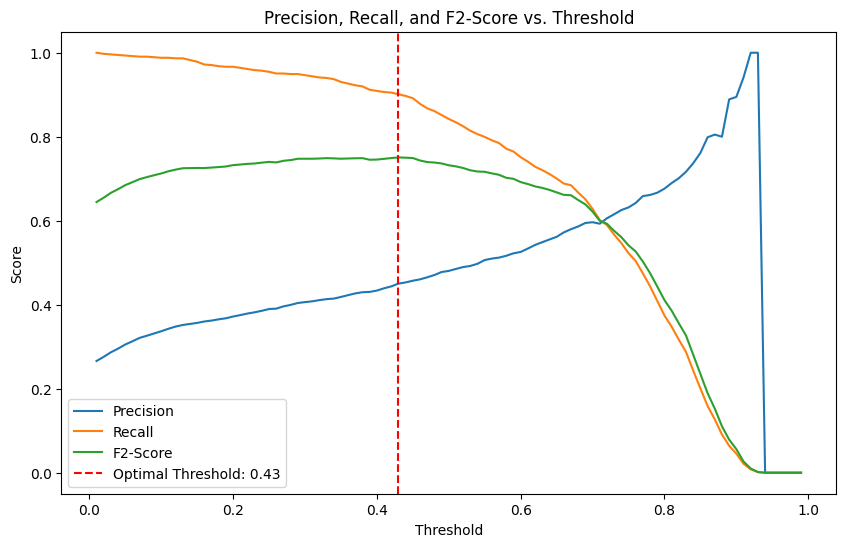

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall')
plt.plot(results_df['Threshold'], results_df['F2-Score'], label='F2-Score')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F2-Score vs. Threshold')
plt.legend()
plt.show()

###  Data Report Comparison using optimal threshold

In [ ]:
pipeline.fit(X_train_60, y_train_60)
y_pred = pipeline.predict(X_test_40)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_40, y_pred))

print("\nRecall Score:", recall_score(y_test_40, y_pred))
print("Accuracy Score:", accuracy_score(y_test_40, y_pred))
print("F2 Score:", fbeta_score(y_test_40, y_pred, beta=2))

# Optimal Threshold
y_pred_proba = pipeline.predict_proba(X_test_40)[:, 1]

optimal_threshold = optimal_threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# model evaluation Optimal threshold
print(f"\nClassification Report with Optimal Threshold ({optimal_threshold}):")
print(classification_report(y_test_40, y_pred_optimal))

print("\nRecall Score with Optimal Threshold:", recall_score(y_test_40, y_pred_optimal))
print("Accuracy Score with Optimal Threshold:", accuracy_score(y_test_40, y_pred_optimal))
print("F2 Score with Optimal Threshold:", fbeta_score(y_test_40, y_pred_optimal, beta=2))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      2070
           1       0.48      0.84      0.61       748

    accuracy                           0.72      2818
   macro avg       0.70      0.76      0.69      2818
weighted avg       0.80      0.72      0.73      2818


Recall Score: 0.8422459893048129
Accuracy Score: 0.7164655784244145
F2 Score: 0.7320474087845689

Classification Report with Optimal Threshold (0.43):
              precision    recall  f1-score   support

           0       0.94      0.60      0.74      2070
           1       0.45      0.90      0.60       748

    accuracy                           0.68      2818
   macro avg       0.70      0.75      0.67      2818
weighted avg       0.81      0.68      0.70      2818


Recall Score with Optimal Threshold: 0.9010695187165776
Accuracy Score with Optimal Threshold: 0.6816891412349184
F2 Score with Optimal Threshold: 0.7507239919803965


The optimal threshold achieves a higher F2 score of 0.75, surpassing the default threshold of 0.73. Therefore, we will adopt the optimal threshold in our pipeline.

We will add `Optimal Threshold`to our selected model in order to update our final pipeline

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

# Custom Logistic Regression with Threshold Adjustment
class LogisticRegressionWithThreshold(BaseEstimator, ClassifierMixin):
    def __init__(self, threshold=0.5, **kwargs):
        self.threshold = threshold
        self.model = LogisticRegression(**kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return (self.model.predict_proba(X)[:, 1] >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def decision_function(self, X):
        return self.model.decision_function(X)

# Update the logistic regression model to use the custom class
logistic_regression_model = LogisticRegressionWithThreshold(
    threshold=optimal_threshold,
    **best_params,
    random_state=2020
)

In [ ]:
pipeline = make_pipeline(
    preprocessor,
    BorderlineSMOTE(random_state=2020),
    logistic_regression_model
)

pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=2020)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('label', OrdinalEncoder(),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling'])])),
                ('borderlinesmote', BorderlineSMOTE(random_state=2020)),
                ('logisticregressionwiththreshold',
                 LogisticRegressionWithThreshold(threshold=0.43))])

now, we will try to get final classification report using our updated pipeline

In [ ]:
# Train the model
pipeline.fit(X_train_60, y_train_60)

# Predict on training and test data
y_train_pred = pipeline.predict(X_train_60)
y_test_pred = pipeline.predict(X_test_40)

# Evaluate the model on training data
print("Training Data Evaluation:")
print(classification_report(y_train_60, y_train_pred))
print("\nTrain Recall Score:", recall_score(y_train_60, y_train_pred))
print("Train Accuracy Score:", accuracy_score(y_train_60, y_train_pred))
print("Train F2 Score:", fbeta_score(y_train_60, y_train_pred, beta=2))

# Evaluate the model on test data
print("\nTest Data Evaluation:")
print(classification_report(y_test_40, y_test_pred))
print("\nTest Recall Score:", recall_score(y_test_40, y_test_pred))
print("Test Accuracy Score:", accuracy_score(y_test_40, y_test_pred))
print("Test F2 Score:", fbeta_score(y_test_40, y_test_pred, beta=2))


Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      3104
           1       0.46      0.89      0.60      1121

    accuracy                           0.69      4225
   macro avg       0.70      0.75      0.67      4225
weighted avg       0.81      0.69      0.71      4225


Train Recall Score: 0.8858162355040142
Train Accuracy Score: 0.6899408284023668
Train F2 Score: 0.7456074485658507

Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.60      0.74      2070
           1       0.45      0.90      0.60       748

    accuracy                           0.68      2818
   macro avg       0.70      0.75      0.67      2818
weighted avg       0.81      0.68      0.70      2818


Test Recall Score: 0.9010695187165776
Test Accuracy Score: 0.6816891412349184
Test F2 Score: 0.7507239919803965


#### Confusion Matrix

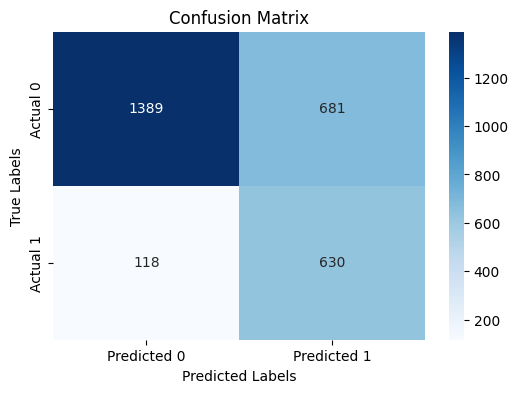

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_40, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The model can accurately predict customer classification for Churn/Not Churn.

From the 2,818 customers used as test data in model evaluation, the Logistic Regression model successfully classified:

- True Negative: 1244 customer --> customers who did not churn and were correctly predicted by the model as loyal.
- True Positive: 674 customers -->  customers who actually churned and were correctly predicted by the model as churn.
- False Negative: 74 customers --> customers who did not churn but were incorrectly predicted by the model as churn.
- False Positive: 826 customers --> customers who actually churned but were incorrectly predicted by the model as loyal.

#### ROC-AUC

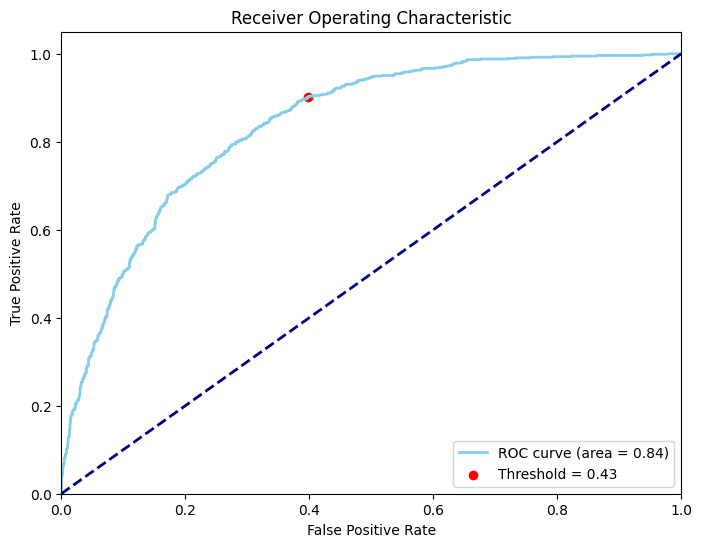

ROC AUC Score: 0.84


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities or decision function values
try:
    y_scores = pipeline.predict_proba(X_test_40)[:, 1]
except AttributeError:
    y_scores = pipeline.decision_function(X_test_40)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_40, y_scores)
roc_auc = roc_auc_score(y_test_40, y_scores)

# Find the point on the ROC curve closest to the threshold of 0.43
threshold_value = 0.43
threshold_idx = (thresholds <= threshold_value).argmax()
fpr_threshold = fpr[threshold_idx]
tpr_threshold = tpr[threshold_idx]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_threshold, tpr_threshold, color='red', label=f'Threshold = {threshold_value:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score: {roc_auc:.2f}")

The ROC AUC score of 0.84 indicates that the churn prediction model has strong discriminatory power in distinguishing between customers who will churn and those who will stay. This means the model is 84% accurate in ranking a randomly chosen churned customer higher than a randomly chosen loyal customer.

With a threshold of 0.43, the model classifies customers as churn if their predicted probability exceeds 43%. This threshold balances the trade-off between identifying at-risk customers (high recall) and minimizing false alarms (false positives).

#### Precision-Recall Curve

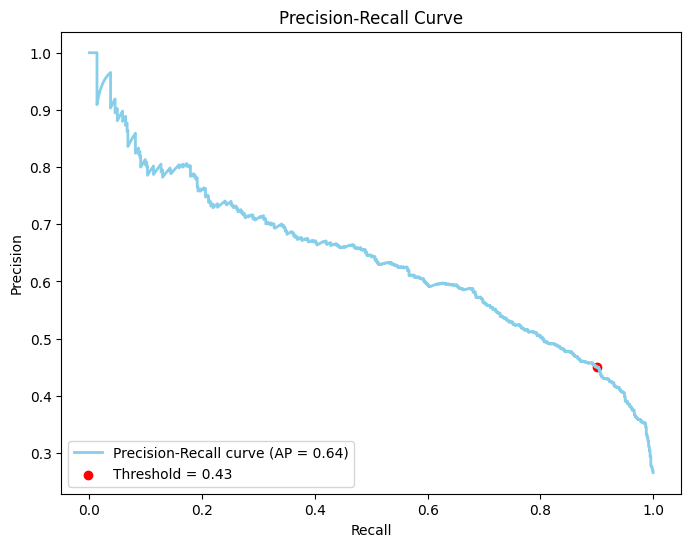

Average Precision Score: 0.64


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted probabilities
y_scores = pipeline.predict_proba(X_test_40)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_40, y_scores)
average_precision = average_precision_score(y_test_40, y_scores)

# Find the point on the PR curve closest to the threshold of 0.43
threshold_value = 0.43
threshold_idx = np.argmin(np.abs(thresholds - threshold_value))  # Find the index of the closest threshold
precision_threshold = precision[threshold_idx]
recall_threshold = recall[threshold_idx]

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='skyblue', lw=2,
         label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.scatter(recall_threshold, precision_threshold, color='red', label=f'Threshold = {threshold_value:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

print(f"Average Precision Score: {average_precision:.2f}")

The Precision-Recall (PR) curve with an Average Precision (AP) score of 0.64 indicates that the churn prediction model performs reasonably well in balancing precision and recall for identifying customers who are likely to churn. The AP score of 0.64 reflects the model's ability to maintain a good level of precision across various recall levels, which is particularly important in imbalanced datasets where churn cases are fewer than non-churn cases.

With a threshold of 0.43, the model classifies customers as churn if their predicted probability exceeds 43%. This threshold strikes a balance between identifying a significant portion of at-risk customers (high recall) and ensuring that the predicted churn cases are accurate (precision). A higher recall ensures that fewer churners are missed, while a reasonable precision minimizes the number of false alarms (non-churners incorrectly flagged as churn).

## Feature Importance & SHAP

In [ ]:
# Assuming 'numerical_features', 'one_hot_features', and 'label_encoding_features' are defined
import pandas as pd
import numpy as np

# Extract feature names after preprocessing (adjust if needed)
preprocessor = pipeline.named_steps['columntransformer']
one_hot_encoder = preprocessor.named_transformers_['onehot']
one_hot_feature_names = one_hot_encoder.get_feature_names_out(one_hot_features)

# Combine all feature names
all_feature_names = np.concatenate([
    numerical_features,
    one_hot_feature_names,
    label_encoding_features
])

# Extract coefficients from the LogisticRegressionWithThreshold model
logistic_regression = pipeline.named_steps['logisticregressionwiththreshold']
coefficients = logistic_regression.model.coef_[0]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': coefficients
})

# Sort by absolute value of importance (to rank features)
feature_importance_df['AbsoluteImportance'] = np.abs(feature_importance_df['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='AbsoluteImportance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                                  Feature  Importance  AbsoluteImportance
19                      Contract_Two year   -2.099880            2.099880
0                                  tenure   -1.783358            1.783358
1                          MonthlyCharges   -1.464569            1.464569
4             InternetService_Fiber optic    1.015790            1.015790
18                      Contract_One year   -0.828837            0.828837
17                    StreamingMovies_Yes    0.475126            0.475126
15                        StreamingTV_Yes    0.432121            0.432121
25                             Dependents   -0.382381            0.382381
27                       PaperlessBilling    0.367382            0.367382
13                        TechSupport_Yes   -0.321254            0.321254
21         PaymentMethod_Electronic check    0.302763            0.302763
7                      OnlineSecurity_Yes   -0.291536            0.291536
22             Pa

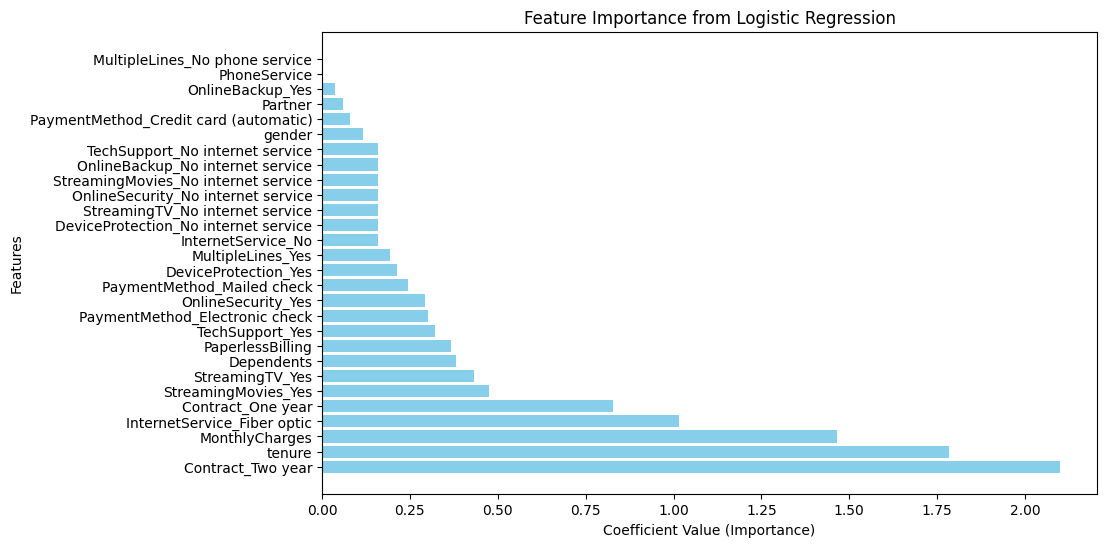

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['AbsoluteImportance'], color='skyblue')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression')
plt.show()

From the plot, we can observe that the `Monthly Charges`  feature is the most significant contributor to the model, followed by `Contract_Two Year`,`Tenure`, `Fiber Optic`, and so on.

`SHAP`

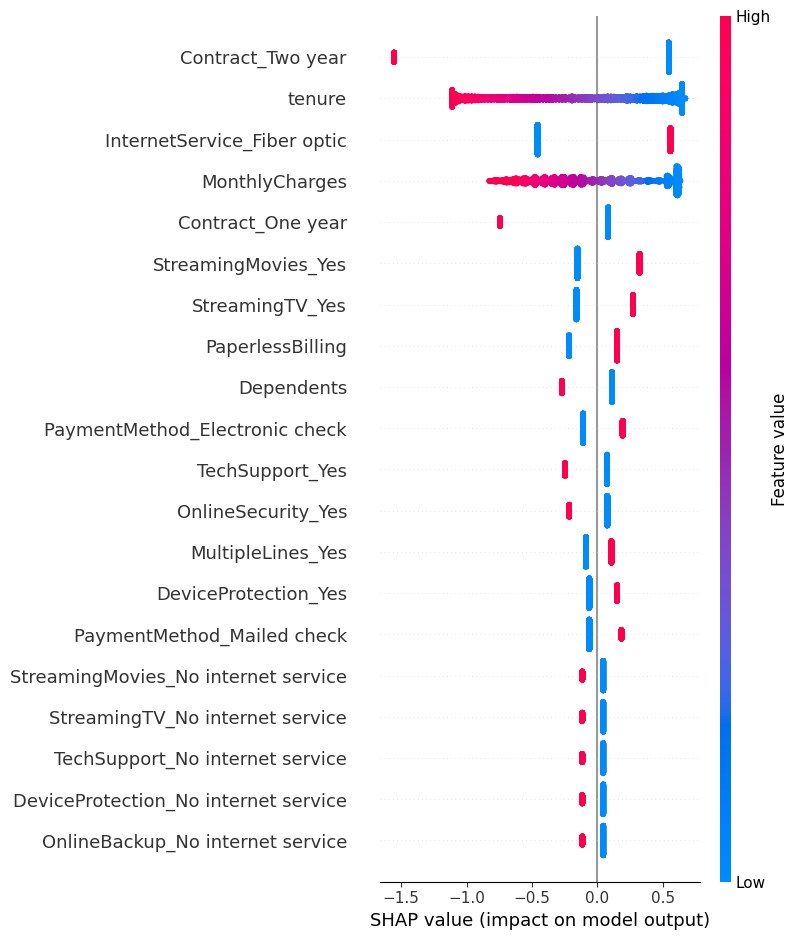

In [ ]:
import shap
import numpy as np

model = pipeline.named_steps['logisticregressionwiththreshold']
X_train_preprocessed = pipeline.named_steps['columntransformer'].transform(X_train_60)
explainer = shap.LinearExplainer(model.model, X_train_preprocessed, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train_preprocessed)

preprocessor = pipeline.named_steps['columntransformer']
one_hot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_features)
label_encoding_feature_names = label_encoding_features
numerical_feature_names = numerical_features

# Combine all feature names, ensuring the order matches the preprocessed data
all_feature_names = np.concatenate([
    numerical_feature_names,
    one_hot_feature_names,
    label_encoding_feature_names
])

shap.summary_plot(shap_values, X_train_preprocessed, feature_names=all_feature_names)

Based on SHAP analysis, the features that have the most impact on the likelihood of customer churn are:
- Contract: two-year contract are less likely to churn. the shorter contract (< 2 years) can lead to churn.
- Monthly Charges: low monthly charges (<$67.2) are more likely lead to churn.
- Tenure: Newer customers are at higher risk of churning.
- Internet Service: Fiber optic users tend to churn more, possibly due to price or service issues.
- paperless Billing: customers with paperless billing tend to churn

These results provide valuable insights for the company to focus its customer retention strategy on these features.

# CONCLUSION

## Conclusion for Business

1) How do customers churn profile in the telecommunications company based on available customer data?

From EDA, we identified key customer profiles related to churn:
- Gender: Churn rates show minimal differences across genders, ranging from 26-27%.
- Generation: Older customers have a higher churn rate (41.7%) compared to younger customers.
- Marital Status: Customers without a partner are more likely to churn  compared to those with a partner.
- Dependents: Customers without family dependents are more likely to churn (31.3%) than those with dependents.

we also try to break it down to assess further the relation between customer demographic and the service they use. Here are the results:
- customers—regardless of gender—who are more likely to churn tend to use phone service, have fiber optic internet, use multiple lines, and avoid subscribing to online security, online backup, device protection, and tech support. Additionally, they are less likely to use streaming TV or streaming movies.
- Senior citizens who are more likely to churn tend to have no phone service, use fiber optic internet, and not use multiple lines due to the absence of phone service. They also typically do not subscribe to online backup, device protection, online security, tech support, streaming TV, or streaming movies.
- Customers without a partner who are more likely to churn typically have phone service but only one phone line, use fiber optic internet, and do not subscribe to online security, online backup, device protection, tech support, streaming TV, or streaming movies.
- Customers without family dependents who are more likely to churn typically have phone service with multiple lines, use fiber optic internet, and do not subscribe to online security, online backup, device protection, tech support, streaming TV, or streaming movies.



---



2) What are the factors contribute to churn based on the given data?

Based on the analysis, here are several top factors that contribute to churn, which we are prioritizing for retention strategies:
- Contract: Shorter contracts are more likely to result in churn. Customer with 'Month-to-month' contract is more likely to churn (42.7%), compared to 'one year contract' (11.3%) and 'two year contract' (2.8%)
- Monthly Charges: low monthly charges are more likely lead to churn. customer who spend monthly charges less than $67.2 are at high churn risk.
- Tenure: Newer customers are at higher risk of churning. Customers with 1-5 month tenure contribute to 40% (744 out of 1866) of total tenure.
- Internet Service: Fiber optic users tend to churn more, contributing around 41.9% of customer churn compared to another internet service.
- paperless Billing: customers with paperless billing tend to churn (33.6 % churn rate)

## Conclusion for Model


**1) Define the suitable Machine Learning Model for Predicting customer churn**

The suitable model for predicting churn is Logistic Regression with Borderline SMOTE oversampling, using the following parameters:
- C: 10
- Penalty: I1
- Solver: saga
- Class weight: balanced
- Threshold: 0.43

This model achieves an F2 score of 0.75 and a recall score of 90%, meaning it can effectively predict 90% customers who are likely to churn.



---



**2) How can we optimize our model to reduce cost that we spend on potential churn customer?**

The model we got can correctly  predict around 90% customer who will churn (based on recall). we assume that we will have budget `$10 per customer for retention`, `%50 for churn prevention cost` and `$200 for customer acquisition` (acquisition cost 20x than retention). so, here's the calculation different:

`Without model`:
- total customers: 7043
- churn rate: 26.5%
 - total customer who will churn: 26.5% x 7043 = `1866 customers` --> `acquisition` because we consider that we don't take action in the past and we need to replace them
 - total customer who won't churn: 7043 - 1866 = `5177 customers` --> `retention`

- Total Acquisition cost: $200 x 1866 customers = $373200
- Total retention cost: $10 x 5177 customers =  $51770

- total cost: $373200 + $51770 = $424,970

> Out of 7,043 customers, 26.5% (1,866) are projected to churn, requiring acquisition efforts, while the remaining 5,177 customers fall under retention strategies. The total cost incurred without intervention is $424,970, consisting of $373,200 for acquisition and $51,770 for retention.



`With Model`:
- Recall: 90%
 - `True Positives (TP)`: 90% x 1866 = `1679 customers` (correctly identified churners) --> we will try to retain it --> `retention cost`
 - `False Negatives (FN)`: 10% x 1866 = `187 customers` (missed churners) --> `need acquisition` because we consider to replace them

- Retention
 - Total customers retained: 5177 (non-churners) customers
 - Retention cost: $10 x 5177 = $51,770

- Prevention
 - True Positives (TP): 1679 (customers who will churn but are identified by the model so we can try to prevent them)
 - prevention cost: $50 x 1679 = $83,950

- Acquisition
 - FN: 187 (customers who will churn and are missed by the model)
 - acquisition cost: $200 x 187 = $37,400

- Total cost with model: $51,770 + $68,560 + $83,950 + $37,400 = $173,120

> With a recall of 90%, the model correctly identifies 1,679 out of 1,866 churners that require targeted retention efforts, while 187 churners are missed and require acquisition. The total cost incurred with the model is $173,120, consisting of $51,770 for retaining non-churners, $83,950 for preventing churn among identified customers, and $37,400 for acquiring new customers to replace those missed by the model.

[Summary]

By implementing the model, the total cost was significantly reduced from $424,970 to $173,120. This resulted in savings of $251,850, demonstrating the model's effectiveness in optimizing costs.



---



**3) How can we determine when an ML model is trustworthy, and what's the limitation?**

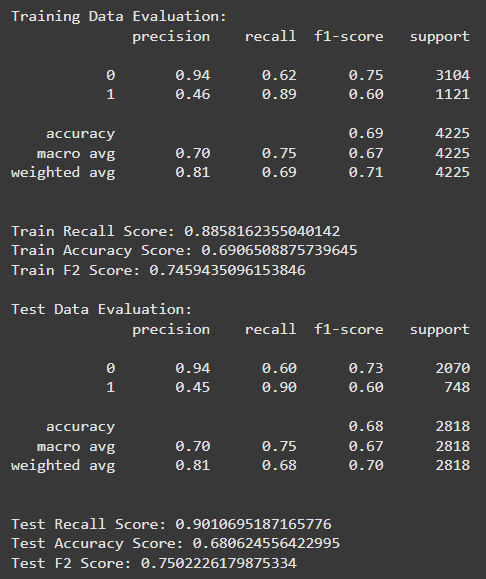

This model is trustworthy because it maintains a balance between recall and F2-score across training and test sets. Specifically, the recall for class 1 is 88.58% (train) vs. 90.10% (test), and the F2-score is 74.59% (train) vs. 75.02% (test). Since the differences are minimal (+1.52% recall and +0.43% F2-score on test data), there is no significant drop in performance. This consistency indicates good generalization, making the model reliable for real-world use.


[`Model Limitation`]
- `Data imbalance in the Churn group.`
Currently, data imbalance is addressed through data engineering. However, this approach still carries the risk of errors and is not as effective as having a naturally balanced dataset.

- `Features limitation`
The model predicts customer churn based on the following features: **gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges.** If new features are added to the dataset, the model will not be able to account for their impact on churn prediction, requiring retraining data.

- `Features range limitation.`
The churn prediction model is trained on the following value ranges for each feature:
  - gender = Male, Female
  - senior_citizen = No, Yes
  - partner = No, Yes
  - dependents = No, Yes
  - tenure = 0 - 72 months
  - phone_service = Yes, No
  - multiple_lines = No, Yes, No phone service
  - internet_service = Fiber optic, DSL, No
  - online_security = No, Yes, No internet service
  - online_backup = No, Yes, No internet service
  - device_protection = No, Yes, No internet service
  - tech_support = No, Yes, No internet service
  - streaming_tv = No, Yes, No internet service
  - streaming_movies = No, Yes, No internet service
  - contract = Month-to-month, One year, Two year
  - paperless_billing = Yes, No
  - payment_method = Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
  - monthly_charges = 19.85 - 114.70
  - total_charges = 19.65 - 6849.40

If new data contains values outside these ranges, the model may still make predictions, but their accuracy and reliability are uncertain. To ensure accurate predictions, the model should be retrained with updated data that includes the new value ranges



---


**4) When and how should the ML model be used to ensure effective decision-making?**

The ML model should be primary used by the marketing team to predict customer churn monthly, enabling proactive retention strategies. additionally, this model can also be used by sales, customer service, and product team since it also give insights related to product development and customer experience.



---



# RECOMMENDATION

## Recommendation for Business

Here are the prioritized strategies for business improvement to prevent customer churn:
- `Increase Contract Retention`: Offer a 10-15% discount or  free service upgrades for customers who switch from month-to-month to one- or two-year contracts
- `Bonus for high spender`: customers who spend than monthly charges average can get additional service bonus.
- `Improve New Customer Retention`: Implement a personalized onboarding program (emails, tutorials, or dedicated support calls) targeting customers within their first 5 months.
- `Enhance Fiber Optic Service Experience`: Offer a 20% discount on the first 5 months of online security, backup, or tech support for customers with fiber optic service. Conduct customer satisfaction surveys specifically for fiber optic users, identifying key issues related to performance, pricing, or support for improvements
- `Optimize Paperless Billing Experience`: Introduce payment reminders email or provide dedicated customer service to call for reminder.

Additionally, here are some supplementary strategies that could be implemented:
- Simplified Service Plans for senior citizen: Offer an easy-to-use, discounted fiber optic plan for senior citizens, including optional phone service.
- Customized Trial for single customer: Offer single-line users a tailored discount or a free three-month trial of an additional service (e.g., online security or tech support).
- Free trial for entertainment: Provide a limited-time free trial of streaming services (TV or movies) to increase engagement.
- Upsell Bundles: Provide a bundled package discount for customers subscribing to at least two additional services (e.g., online security + tech support).


## Recommendation for Model

- `Balance the dataset`: we can try to use other resampling techniques and collect more real-world data to balance the dataset. this is useful for improving model reliability and reducing bias.
- `Expand feature set`: If we add new feature, we can regularly analyze and add new features, ensuring the model captures all relevant factors influencing churn.
- `Update model for new data`: try to re-train the model periodically when we have new features or value ranges to maintain prediction accuracy.
- `Adjust parameter range`: currently we are using the maximum 10 for C parameters. we can try to broader the range in order to get the better result.
- `add more relevant features`: for example, currently we don't have 'age' features, so it's quite difficult to distinguish between senior citizen and no for future data. adding  



---



Additional
- Comparison of Churn columns between before and after using Model

In [ ]:
df_compare = df_clean.copy()
df_compare.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
X_train_cp = df_compare.drop(columns=['Churn'])
y_train_cp= df_compare['Churn']

pipeline.fit(X_train_cp, y_train_cp)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=2020)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('label', OrdinalEncoder(),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling'])])),
                ('borderlinesmote', BorderlineSMOTE(random_state=2020)),
                ('logisticregressionwiththreshold',
                 LogisticRegressionWithThreshold(threshold=0.43))])

In [ ]:
# Separate features (excluding 'Churn')
X_cp = df_compare.drop(columns=['Churn'])

# Predict Churn using the trained pipeline
df_compare['Churn_Predicted'] = pipeline.predict(X_cp)
# Rename the existing 'Churn' column to 'Churn_actual'
df_compare.rename(columns={'Churn': 'Churn_actual'}, inplace=True)

# Display the dataframe with actual and predicted Churn
df_compare.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_actual,Churn_Predicted
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


In [ ]:
# #download df_compare in csv and xlsx format
# df_compare.to_csv('df_compare.csv', index=False)
# df_compare.to_excel('df_compare.xlsx', index=False)

# #download
# from google.colab import files
# files.download('df_compare.csv')
# files.download('df_compare.xlsx')



---
# Download the data



Download clean data

In [ ]:
# #download df_clean
# df_clean.to_csv('df_clean.csv', index=False)

# #downlaod
# from google.colab import files
# files.download('df_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download Final Pipeline

In [ ]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=2020)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('label', OrdinalEncoder(),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling'])])),
                ('borderlinesmote', BorderlineSMOTE(random_state=2020)),
                ('logisticregressionwiththreshold',
                 LogisticRegressionWithThreshold(threshold=0.43))])

In [ ]:
# # save final pipeline to .sav format
# import pickle
# filename = 'final_pipeline.sav'
# pickle.dump(pipeline, open(filename, 'wb'))

# #downlaod
# from google.colab import files
# files.download('final_pipeline.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>